---
---

**CHARGEMENT DES LIBRAIRIES**

---

In [1]:
import sys

#-------------------------------
#Installation du package plotly
#-------------------------------
#!{sys.executable} -m pip install plotly
#!pip install "jupyterlab>=3" "ipywidgets>=7.6" 
#!pip install jupyter-dash 

import os
import glob
import pandas as pd
import numpy as np
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly as plotly
import plotly.express as px


#-----------------------------
#Actuallisation des packages
#-----------------------------
#!pip install --upgrade pip


<br>

---

**Vérification des numéros des versions des packages installés**



In [2]:
# Versions 
print('Version des librairies utilisées : \n')

print('Python        : ' + sys.version)
print('Pandas        : ' + pd.__version__)
print('NumPy         : ' + np.version.full_version)
print('Csv           : ' + csv.__version__)
print('Matplotlib    : ' + mpl.__version__)
print('Missingno     : ' + msno.__version__)
print('Seaborn       : ' + sns.__version__)
print('Plotly        : ' + plotly.__version__ + ' \n')

import datetime
now  = datetime.datetime.now().isoformat()
print('Lancé le      : ' + now)

Version des librairies utilisées : 

Python        : 3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
Pandas        : 1.2.4
NumPy         : 1.20.2
Csv           : 1.0
Matplotlib    : 3.3.4
Missingno     : 0.5.1
Seaborn       : 0.11.1
Plotly        : 5.11.0 

Lancé le      : 2022-12-01T22:12:20.464023


<br>


---
---

#  **FONCTIONS UTILISÉES DANS CE NOTEBOOK** 
---


In [3]:
#-----------------------------------------------------------------------------
# Informations complémentaires pour la description des fichiers de données 
#-----------------------------------------------------------------------------

## CRÉATION D'UN TABLEAU AVEC LES DESCRIPTIFS 

def compl_info (df):
    nb_row = df.index.size
    nb_col = df.columns.size
    tot = nb_row*nb_col    
    infor = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'}) 
    infor = infor.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))
    infor = infor.append(pd.DataFrame(100-100*(df.isna().sum())/nb_row).T.rename(index={0:'Percent count'}))
    return infor

In [4]:

#---------------------------------------------------------------------------------------
# Pourcentage remplissage minimal et maximal (on ne s'intéresse qu'aux colonnes 4 à fin)
#---------------------------------------------------------------------------------------

def minMAXremp (df,cols_ignore):
    Percentremp = df.iloc[:,:-1].T
    Percentremp = Percentremp.drop(Percentremp.loc[cols_ignore].index)
    minPercentremp = Percentremp["Percent count"].min()
    maxPercentremp = Percentremp["Percent count"].max()
    print("Pourcentage minimale remplissage " + str(minPercentremp) +"\n" + "Pourcentage maximale remplissage "+ str(maxPercentremp) +"\n")
    

In [5]:
#-----------------------------------------------------------------------------
# Informations complémentaires pour l'analyse des Statistiques descriptifs
#-----------------------------------------------------------------------------

## CRÉATION D'UN NOUVEAU DATAFRAME AVEC LES STATISTIQUES

def stat_des (df):
    nb_row = df.index.size
    nb_col = df.columns.size
    tot = nb_row*nb_col
    stat = pd.DataFrame(df.median()).T.rename(index={0:'Median'})
    stat = stat.append(pd.DataFrame(df.var(ddof=0)).T.rename(index={0:'Variance'}))
    stat = stat.append(pd.DataFrame(df.skew()).T.rename(index={0:'Skewness'}))
    stat = stat.append(pd.DataFrame(df.kurtosis()).T.rename(index={0:'Kurtosis'}))
    return stat

In [6]:
#------------------------------------------------
#Compléter données étudiants dans le secondaire
#-----------------------------------------------

def numberSecStu (region):
    
    #Réduction du tableau au pourcentage d'étudiants dans le secondaire dans la poupulation ayant l'age legal d'être dans le secondaire
    df_stuRev_region = df_stuRev_newcol_compl.loc[(df_stuRev_newcol_compl["Region"]== region)]
    if len(df_stuRev_region.loc[df_stuRev_region["Country Name"].isin(completeCountries2015)].index) == 0:
        pass
    else:
        df_stuRev_region=df_stuRev_region.drop(columns=["SE.SEC.ENRL","SE.TER.ENRL","SP.SEC.TOTL.IN", "Tertiary Students Ratio", "Region"])
        df_stuRev_region = df_stuRev_region.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
        df_stuRev_region["Year"] = df_stuRev_region["Year"].apply(pd.to_numeric)
    
    #Tableau pays à réviser en colonnes, pays de reference en lignes, indice correlation (value)
        df_stuRev_region_corr = df_stuRev_region.copy().droplevel(1, axis=1).drop(columns="Year")
        df_stuRev_region_corr = df_stuRev_region_corr.corr().reset_index()
        df_stuRev_region_corr = df_stuRev_region_corr.replace((1,-1), np.nan)
        df_stuRev_region_corr_countrRev =df_stuRev_region_corr.loc[df_stuRev_region_corr["Country Name"].isin(oldSecCountry)].T.reset_index()
        df_stuRev_region_corr_countrRev.columns = df_stuRev_region_corr_countrRev.iloc[0]
        df_stuRev_region_corr_countrOK = df_stuRev_region_corr_countrRev.loc[df_stuRev_region_corr_countrRev["Country Name"].isin(completeCountries2015)]#.reset_index()
        df_stuRev_region_corr_countrOK =df_stuRev_region_corr_countrOK.set_index("Country Name")
        df_stuRev_region_corr_countrOK=df_stuRev_region_corr_countrOK.drop(df_stuRev_region_corr_countrOK.index[0])
        df_stuRev_region_corr_countrOK=df_stuRev_region_corr_countrOK.dropna(axis=1, how='all')

    #Identification des pays avec des données recents présentant l'evolution la plus proche des pays avec des données anciennes
        countryRev_countryRef_region = pd.DataFrame(df_stuRev_region_corr_countrOK.max(), columns = ['Maximum Correlation'])
        countryRev_countryRef_region["Country Ref"] =df_stuRev_region_corr_countrOK.astype(float).idxmax().values
        countryRev_countryRef_region = countryRev_countryRef_region.reset_index()
        countryRev_countryRef_region = countryRev_countryRef_region.rename(columns={0:"Country Rev"})

    #Ignorer les cas où le coefficient de correlation est inférieur à 0.9
        countryRev_countryRef_region = countryRev_countryRef_region.loc[countryRev_countryRef_region["Maximum Correlation"]>=0.9]

    #Identification de la  "most recent data et date" dans les pays incomplets, 
        countriesTOrev_region =list(countryRev_countryRef_region["Country Rev"].values)
        
        revCountries = []
        newDatAs = [] 
        newDatEs = []     

        for i in range(len(countriesTOrev_region)):
        #Trouver information sur le pays à réviser
            countryRev = countriesTOrev_region[i]
            countryRev_datE = df_MostRecent_countries_Selec.loc[(df_MostRecent_countries_Selec["Country Name"] == countryRev) & (df_MostRecent_countries_Selec["Indicator Code"] == "SE.SEC.ENRL"), "Date of most recent data"].iloc[0]
            countryRev_datA = df_stuRev_region.loc[df_stuRev_region["Year"] == countryRev_datE, countryRev].max().item()
        
        #Trouver information sur le pays de reference
            countryRef = countryRev_countryRef_region.loc[countryRev_countryRef_region["Country Rev"] == countryRev, "Country Ref"].iloc[0]
            if countryRev_datE < 2010:
                tableau_countryRef = df_stuRev_region.loc[df_stuRev_region["Year"]>=countryRev_datE, countryRef].dropna()
                countryref_datE = df_MostRecent_countries_Selec.loc[(df_MostRecent_countries_Selec["Country Name"] == countryRef) & (df_MostRecent_countries_Selec["Indicator Code"] == "SE.SEC.ENRL"), "Date of most recent data"].iloc[0]
                coefficients, residuals, _, _, _ = np.polyfit(range(len(tableau_countryRef.index)),tableau_countryRef,1,full=True) #degint=1 Degree of the fitting polynomial
            else:
                tableau_countryRef = df_stuRev_region.loc[df_stuRev_region["Year"]>=2010, countryRef].dropna()
                countryref_datE = df_MostRecent_countries_Selec.loc[(df_MostRecent_countries_Selec["Country Name"] == countryRef) & (df_MostRecent_countries_Selec["Indicator Code"] == "SE.SEC.ENRL"), "Date of most recent data"].iloc[0]
                coefficients, residuals, _, _, _ = np.polyfit(range(len(tableau_countryRef.index)),tableau_countryRef,1,full=True) #degint=1 Degree of the fitting polynomial
      
        #calcule des nouvelles valeurs
            popLegal_SEC = df_stuRev_newcol_compl.loc[df_stuRev_newcol_compl["Secondary Students Ratio"] == countryRev_datA, "SP.SEC.TOTL.IN"].iloc[0]
            countryRev_newDatA = ((countryref_datE - countryRev_datE)*(coefficients[0].item())+countryRev_datA)*popLegal_SEC
            countryRev_newDatE = countryref_datE
            revCountries.append(countryRev)
            newDatAs.append(countryRev_newDatA)
            newDatEs.append(countryRev_newDatE)
        countryRev_newData = pd.DataFrame(revCountries, columns = ['Country Name'])
        countryRev_newData["Model data SEC"] =pd.Series(newDatAs)
        countryRev_newData["Model date SEC"] =pd.Series(newDatEs)
        return(countryRev_newData)


In [7]:
#------------------------------------------------
#Compléter données étudiants dans le tertiaire
#-----------------------------------------------

def numberTerStu (region):
    
    #Réduction du tableau au pourcentage d'étudiants dans le secondaire dans la poupulation ayant l'age legal d'être dans le secondaire
    df_stuRev_region = df_stuRev_newcol_compl.loc[(df_stuRev_newcol_compl["Region"]== region)]
    if len(df_stuRev_region.loc[df_stuRev_region["Country Name"].isin(completeCountries2015)].index) == 0:
        pass
    else:
        df_stuRev_region=df_stuRev_region.drop(columns=["SE.SEC.ENRL","SE.TER.ENRL","SP.TER.TOTL.IN", "Secondary Students Ratio", "Region"])
        df_stuRev_region = df_stuRev_region.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Tertiary Students Ratio").reset_index()
        df_stuRev_region["Year"] = df_stuRev_region["Year"].apply(pd.to_numeric)
    
    #Tableau pays à réviser en colonnes, pays de reference en lignes, indice correlation (value)
        df_stuRev_region_corr = df_stuRev_region.copy().droplevel(1, axis=1).drop(columns="Year")
        df_stuRev_region_corr = df_stuRev_region_corr.corr().reset_index()
        df_stuRev_region_corr = df_stuRev_region_corr.replace((1,-1), np.nan)
        df_stuRev_region_corr_countrRev =df_stuRev_region_corr.loc[df_stuRev_region_corr["Country Name"].isin(oldTerCountry)].T.reset_index()
        df_stuRev_region_corr_countrRev.columns = df_stuRev_region_corr_countrRev.iloc[0]
        df_stuRev_region_corr_countrOK = df_stuRev_region_corr_countrRev.loc[df_stuRev_region_corr_countrRev["Country Name"].isin(completeCountries2015)]#.reset_index()
        df_stuRev_region_corr_countrOK =df_stuRev_region_corr_countrOK.set_index("Country Name")
        df_stuRev_region_corr_countrOK=df_stuRev_region_corr_countrOK.drop(df_stuRev_region_corr_countrOK.index[0])
        df_stuRev_region_corr_countrOK=df_stuRev_region_corr_countrOK.dropna(axis=1, how='all')

    #Identification des pays avec des données recents présentant l'evolution la plus proche des pays avec des données anciennes
        countryRev_countryRef_region = pd.DataFrame(df_stuRev_region_corr_countrOK.max(), columns = ['Maximum Correlation'])
        countryRev_countryRef_region["Country Ref"] =df_stuRev_region_corr_countrOK.astype(float).idxmax().values
        countryRev_countryRef_region = countryRev_countryRef_region.reset_index()
        countryRev_countryRef_region = countryRev_countryRef_region.rename(columns={0:"Country Rev"})

    #Ignorer les cas où le coefficient de correlation est inférieur à 0.9
        countryRev_countryRef_region = countryRev_countryRef_region.loc[countryRev_countryRef_region["Maximum Correlation"]>=0.9]

    #Identification de la  "most recent data et date" dans les pays incomplets, 
        countriesTOrev_region =list(countryRev_countryRef_region["Country Rev"].values)
        
        revCountries = []
        newDatAs = [] 
        newDatEs = []     

        for i in range(len(countriesTOrev_region)):
        #Trouver information sur le pays à réviser
            countryRev = countriesTOrev_region[i]
            countryRev_datE = df_MostRecent_countries_Selec.loc[(df_MostRecent_countries_Selec["Country Name"] == countryRev) & (df_MostRecent_countries_Selec["Indicator Code"] == "SE.TER.ENRL"), "Date of most recent data"].iloc[0]
            countryRev_datA = df_stuRev_region.loc[df_stuRev_region["Year"] == countryRev_datE, countryRev].max().item()
        
        #Trouver information sur le pays de reference
            countryRef = countryRev_countryRef_region.loc[countryRev_countryRef_region["Country Rev"] == countryRev, "Country Ref"].iloc[0]
            if countryRev_datE < 2010:
                tableau_countryRef = df_stuRev_region.loc[df_stuRev_region["Year"]>=countryRev_datE, countryRef].dropna()
                countryref_datE = df_MostRecent_countries_Selec.loc[(df_MostRecent_countries_Selec["Country Name"] == countryRef) & (df_MostRecent_countries_Selec["Indicator Code"] == "SE.SEC.ENRL"), "Date of most recent data"].iloc[0]
                coefficients, residuals, _, _, _ = np.polyfit(range(len(tableau_countryRef.index)),tableau_countryRef,1,full=True) #degint=1 Degree of the fitting polynomial
            else:
                tableau_countryRef = df_stuRev_region.loc[df_stuRev_region["Year"]>=2010, countryRef].dropna()
                countryref_datE = df_MostRecent_countries_Selec.loc[(df_MostRecent_countries_Selec["Country Name"] == countryRef) & (df_MostRecent_countries_Selec["Indicator Code"] == "SE.SEC.ENRL"), "Date of most recent data"].iloc[0]
                coefficients, residuals, _, _, _ = np.polyfit(range(len(tableau_countryRef.index)),tableau_countryRef,1,full=True) #degint=1 Degree of the fitting polynomial
      
        #calcule des nouvelles valeurs
            popLegal_TER = df_stuRev_newcol_compl.loc[df_stuRev_newcol_compl["Tertiary Students Ratio"] == countryRev_datA, "SP.TER.TOTL.IN"].iloc[0]
            countryRev_newDatA = ((countryref_datE - countryRev_datE)*(coefficients[0].item())+countryRev_datA)*popLegal_TER
            countryRev_newDatE = countryref_datE
            revCountries.append(countryRev)
            newDatAs.append(countryRev_newDatA)
            newDatEs.append(countryRev_newDatE)
        countryRev_newData = pd.DataFrame(revCountries, columns = ['Country Name'])
        countryRev_newData["Model data TER"] =pd.Series(newDatAs)
        countryRev_newData["Model date TER"] =pd.Series(newDatEs)
        return(countryRev_newData)



<br>

---
---
---

#  <span style='background:#004c6d'><span style='color:white'> **Analyse des fichiers disponibles** </span></span>


Dans cette section on décrit les fichiers contenant les données de la Banque Mondiale.
Ces descriptions considerent:<br>

* Pour chaque fichier le **nombre de lignes et colonnes**.<br>
* Pour chaque colonne:
  * **nombre de données et de cellules vides**, nombre total et pourcentage
  * **type** de données
  * quantité de **données uniques**
  * les ordres de grandeurs des **indicateurs statistiques classiques**(moyenne/médiane/écart-type)
  * les valeurs **min**imale et **max**imale, ainsi que les **quartiles**<br>
 
* Pour chaque fichier on analyse les **valeurs manquantes** et le **taux de remplissage** des colonnes.<br>

* On analyse les **doublons**.<br>

* Verification de la **correspondance des entrées uniques des colonnes apparentées** de differents fichiers.<br>


<br>
<br>

[Description du fichier EdStatsData](#Description_du_fichier_EdStatsData)

[Description du fichier EdStatsCountry](#Description_du_fichier_EdStatsCountry)

[Description du fichier EdStatsSeries](#Description_du_fichier_EdStatsSeries)

[Description du fichier EdStatsCountrySeries](#Description_du_fichier_EdStatsCountrySeries)

[Description du fichier EdStatsFootNote](#Description_du_fichier_EdStatsFootNote)

   

In [8]:
# Définir le dossier qui contient les fichiers avec les données du projet

dataFolder = '/home/raquelsp/Documents/DataScientist-OpenClassroom/Docs formation/Projet2-education/Projet2-originalData'
os.chdir(dataFolder)

# Nombre et nom des fichiers csv
allFilesCsv = glob.glob('*.csv')   

print("Les données disponibles sont contenus dans: "+str(len(allFilesCsv))+ " fichiers.\n")
print("Les fichiers contenant les données sont: "+str(allFilesCsv))

Les données disponibles sont contenus dans: 5 fichiers.

Les fichiers contenant les données sont: ['EdStatsData.csv', 'EdStatsCountrySeries.csv', 'EdStatsFootNote.csv', 'EdStatsCountry.csv', 'EdStatsSeries.csv']


<a id='Description_du_fichier_EdStatsData'></a>

---
---

<span style='background:#c9e6ff'>**Description du fichier EdStatsData**</span>

---

In [9]:

df_EdStatsData = pd.read_csv('EdStatsData.csv')

# EdStatsData aperçu
df_EdStatsData.head(3)


Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name  Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   NaN   

   1971  1972  1973  1974  1975  ...  2060  2065  2070  2075  2080  2085  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN          NaN  

[3 rows x 70 columns]

In [10]:

# EdStatsData description
description_EdStatsData = compl_info(df_EdStatsData).append(df_EdStatsData.describe(include='all'))
description_EdStatsData


Country Name Country Code  \
Type                  object       object   
null                       0            0   
Percent count          100.0        100.0   
count                 886930       886930   
unique                   242          242   
top            Venezuela, RB          CAF   
freq                    3665         3665   
mean                     NaN          NaN   
std                      NaN          NaN   
min                      NaN          NaN   
25%                      NaN          NaN   
50%                      NaN          NaN   
75%                      NaN          NaN   
max                      NaN          NaN   

                                                  Indicator Name  \
Type                                                      object   
null                                                           0   
Percent count                                              100.0   
count                                                     886930   
unique                                                      3665   
top            Government expenditure per upper secondary stu...   
freq                                                         242   
mean                                                         NaN   
std                                                          NaN   
min                                                          NaN   
25%                                                          NaN   
50%                                                          NaN   
75%                                                          NaN   
max                                                          NaN   

              Indicator Code                   1970                   1971  \
Type                  object                float64                float64   
null                       0                 814642                 851393   
Percent count          100.0               8.150361               4.006742   
count                 886930                72288.0                35537.0   
unique                  3665                    NaN                    NaN   
top                UIS.SLE.0                    NaN                    NaN   
freq                     242                    NaN                    NaN   
mean                     NaN      1974772449.585505       4253638470.18787   
std                      NaN    121168685352.022415     180481446225.21524   
min                      NaN              -1.435564              -1.594625   
25%                      NaN                   0.89                8.85321   
50%                      NaN               6.317724              63.162399   
75%                      NaN                62.5125                56552.0   
max                      NaN  19039286948196.101562  19864566419298.101562   

                                1972                   1973  \
Type                         float64                float64   
null                          851311                 851385   
Percent count               4.015988               4.007644   
count                        35619.0                35545.0   
unique                           NaN                    NaN   
top                              NaN                    NaN   
freq                             NaN                    NaN   
mean                4592364905.25697      5105005610.888861   
std              191408271479.830597    205917043980.677643   
min                        -3.056522              -4.032582   
25%                          9.24092                 9.5952   
50%                        66.551392              69.695953   
75%                          58636.5                62029.0   
max            21009161433401.398438  22383671023495.398438   

                                1974                   1975  ...  \
Type                         float64                float64  ...   
null                          851200                 799624  ...  

* Le fichier **EdStatsData** est composée de 886930 lignes et 70 colonnes. 
* Les lignes correspondent à des combinaisons des entrées des informations "Pays" et "Indicateur". 
  * Il y a un total de **242 noms de pays** differents.
  * Il y a un total de **3665 indicateurs** differents.
* Les 4 premières colonnes informent du nom et code des pays et des indicateurs. Les colonnes suivantes détaillent les valeurs pour chaque année, des valeurs réels de 1970 à 2017 (48 colonnes), puis des projections tous les 5 ans des années 2020 à 2100 (17 colonnes) <br>


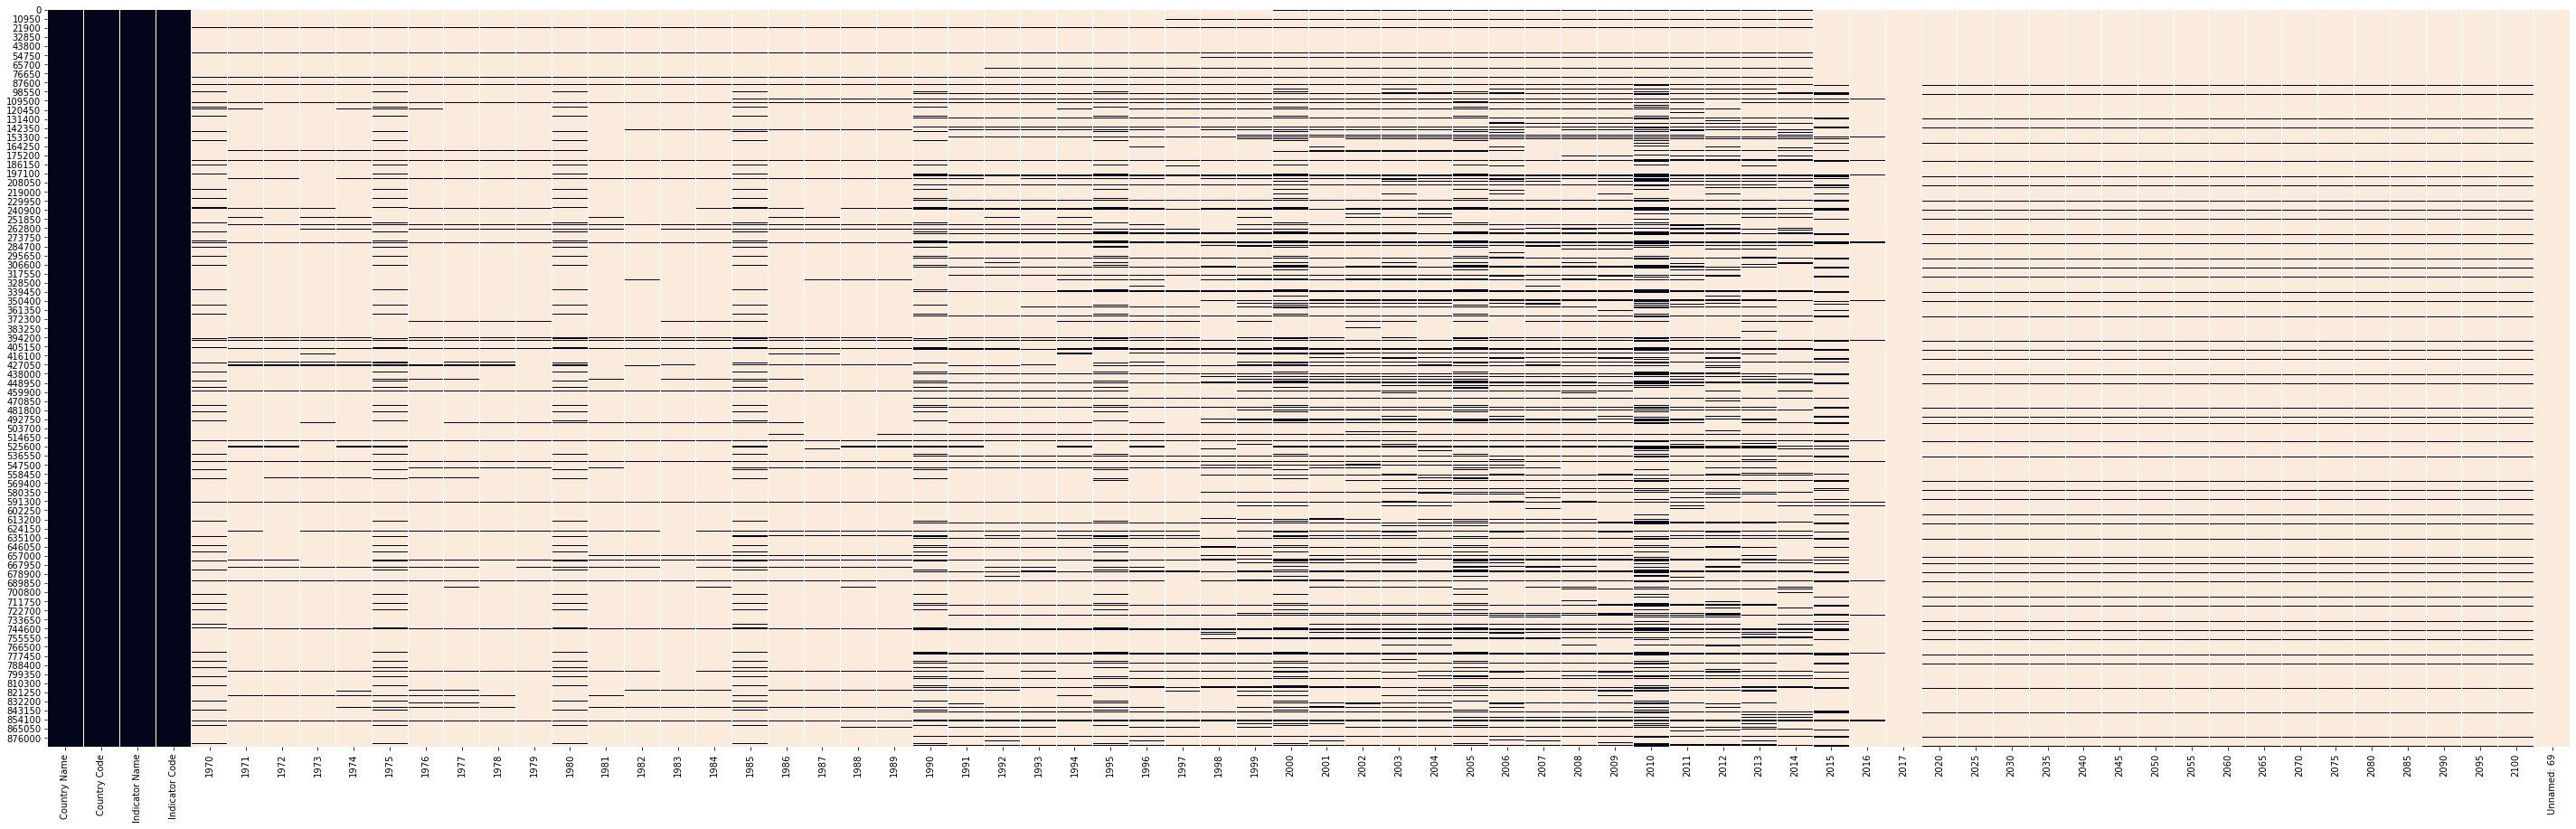

In [11]:
# Valeurs manquantes en EdStatsData
plt.figure(figsize=(50,15))
sns.heatmap(df_EdStatsData.isnull(), cbar=False, cmap="rocket")
#plt.savefig('EdStatsDataheatmap.pdf', bbox_inches='tight')
plt.show()

---

Les valeurs manquantes sont représentées par des cellules beige.
La **couleur sombre** represente la **presence de données**.

---


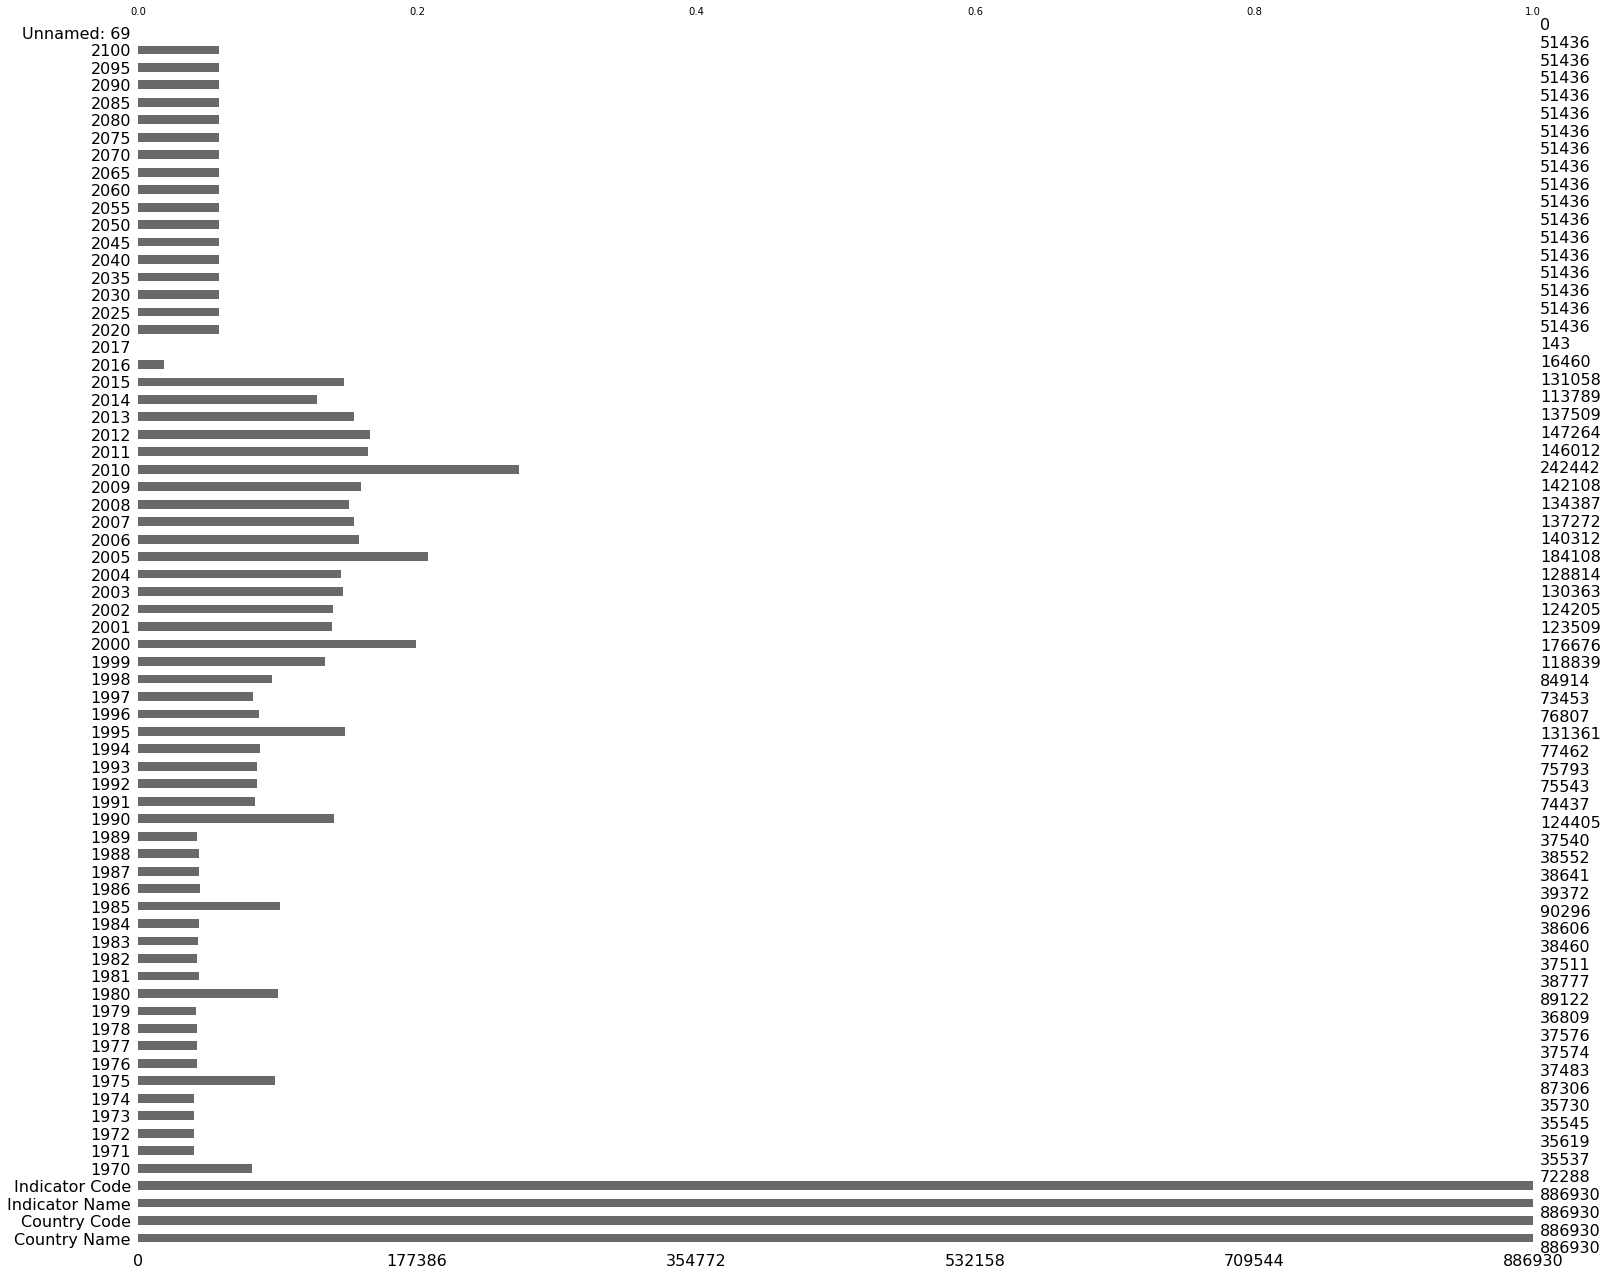

In [12]:

# Visualiser le nombre de données par colonne
plt.figure(figsize=(15,15))
msno.bar(df_EdStatsData)
plt.show()


In [13]:

minMAXremp(description_EdStatsData, ["Country Name", "Country Code", "Indicator Name", "Indicator Code"])


Pourcentage minimale remplissage 0.01612303112985103
Pourcentage maximale remplissage 27.334964427857898



In [14]:

#---------------------------------
# Pourcentage min et max dans des intervalles de temps specifiques
Percentremp = description_EdStatsData.iloc[:,:-1].T

Percentremp1970 = Percentremp.loc["1970":"2020"]
Percentremp2020 = Percentremp.loc["2020":"2100"]

minPercentremp70 = Percentremp1970["Percent count"].min()
maxPercentremp70 = Percentremp1970["Percent count"].max()
print("1970-2017: Pourcentage minimale remplissage " + str(minPercentremp70) +"\n" + "Pourcentage maximale remplissage "+ str(maxPercentremp70) +"\n")

minPercentremp2020 = Percentremp2020["Percent count"].min()
maxPercentremp2020 = Percentremp2020["Percent count"].max()
print("2020-2100: Pourcentage minimale remplissage " + str(minPercentremp2020) +"\n" + "Pourcentage maximale remplissage "+ str(maxPercentremp2020) +"\n")


1970-2017: Pourcentage minimale remplissage 0.01612303112985103
Pourcentage maximale remplissage 27.334964427857898

2020-2100: Pourcentage minimale remplissage 5.799330274091531
Pourcentage maximale remplissage 5.799330274091531



In [15]:

#Il y a des donnnées associées à tous les indicateurs?

df_EdStatsData_IndRemp = df_EdStatsData.copy()
df_EdStatsData_IndRemp = df_EdStatsData_IndRemp.replace(0, np.nan)

df_EdStatsData_IndRemp = df_EdStatsData_IndRemp.groupby("Indicator Name").count().reset_index()

df_EdStatsData_IndRemp["Count1970_2017"] = df_EdStatsData_IndRemp.loc[:,"1970":"2017"].sum(axis=1)
df_EdStatsData_IndRemp["Count2020_2100"] = df_EdStatsData_IndRemp.loc[:,"2020":"2100"].sum(axis=1)
df_EdStatsData_IndRemp

indSANS1970_2017 = df_EdStatsData_IndRemp.loc[(df_EdStatsData_IndRemp["Count1970_2017"]==0)]
indSANS1970_2017List= indSANS1970_2017["Indicator Name"].tolist()
len(indSANS1970_2017List)

indAVEC1970_2017 = df_EdStatsData_IndRemp.loc[df_EdStatsData_IndRemp["Count1970_2017"]!=0]
indAVEC1970_2017List= indAVEC1970_2017["Indicator Name"].tolist()
len(indAVEC1970_2017List)


indSANS2020_2100 = df_EdStatsData_IndRemp.loc[df_EdStatsData_IndRemp["Count2020_2100"]==0]
indSANS2020_2100List = indSANS2020_2100["Indicator Name"].tolist()
len(indSANS2020_2100List)

indAVEC2020_2100 = df_EdStatsData_IndRemp.loc[df_EdStatsData_IndRemp["Count2020_2100"]!=0]
indAVEC2020_2100List = indAVEC2020_2100["Indicator Name"].tolist()
len(indAVEC2020_2100List)
AVEC2020_2100_AUSSI1970_2017 = indAVEC1970_2017.loc[indAVEC1970_2017["Indicator Name"].isin(indAVEC2020_2100List)]
SANS1970_2017_SANS2020_2100 = indSANS2020_2100.loc[indSANS2020_2100["Indicator Name"].isin(indSANS1970_2017List)]
SANS1970_2017_SANS2020_2100List = SANS1970_2017_SANS2020_2100["Indicator Name"].tolist()

print("Il y a "+str(len(indAVEC1970_2017List))+" avec information pour l'intervalle 1970-2017.\n")
print("Il y a "+str(len(indSANS1970_2017List))+" sans information pour l'intervalle 1970-2017.  Sur ceux, "+str(len(SANS1970_2017_SANS2020_2100.index)) +" indicateurs ne sont pas renseignées 2020-2100.\n Ces indicateurs sont :" + str(SANS1970_2017_SANS2020_2100List) + "\n")
print("Il y a "+str(len(indAVEC2020_2100List))+" avec information pour l'intervalle 2020-2100. Sur ceux, "+str(len(AVEC2020_2100_AUSSI1970_2017.index)) +" indicateurs sont aussi renseignées 1970-2107. \n")
print("Il y a "+str(len(indSANS2020_2100List))+" sans information pour l'intervalle 2020-2100.\n")



Il y a 3661 avec information pour l'intervalle 1970-2017.

Il y a 4 sans information pour l'intervalle 1970-2017.  Sur ceux, 4 indicateurs ne sont pas renseignées 2020-2100.
 Ces indicateurs sont :['EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Bamanankan. 2nd Grade', 'EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Dagaare. 2nd Grade', 'EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). English. 6th Grade', 'EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Hararigna. 2nd Grade']

Il y a 308 avec information pour l'intervalle 2020-2100. Sur ceux, 308 indicateurs sont aussi renseignées 1970-2107. 

Il y a 3357 sans information pour l'intervalle 2020-2100.



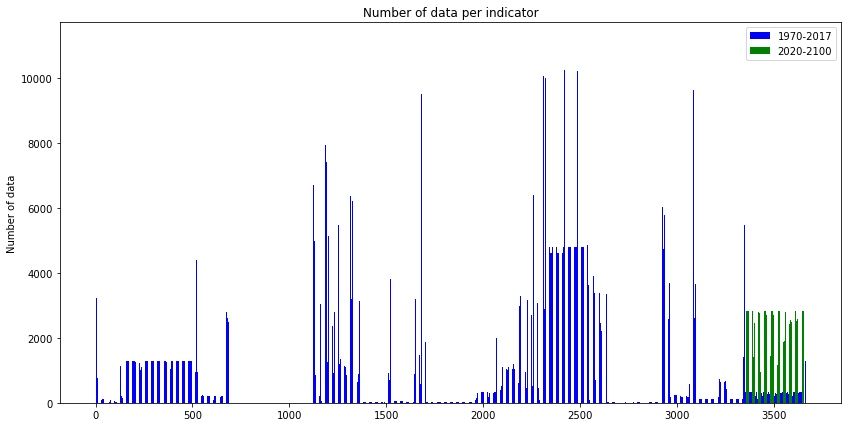

In [16]:

#-----------------------------------
#Données disponibles par indicateur
#-----------------------------------

figNumDataIndicator, ax = plt.subplots(sharex = True, figsize=(14,7))

#Indiquer oú sont les données à representer
numDataInd1970_2017 = df_EdStatsData_IndRemp["Count1970_2017"].values.tolist() 
numDataInd2020_2100 = df_EdStatsData_IndRemp["Count2020_2100"].values.tolist() 


xtick = np.arange(len(list(df_EdStatsData_IndRemp["Indicator Name"].values))) # position des étiquetes axe X
width = 0.5  # largeur des barres

#indiquer où et comment seront les barres du diagramme
numData1970_2017 = ax.bar(x = (xtick + width*2), height = numDataInd1970_2017, width=width, label = '1970-2017', color = 'b')
numData2020_2100 = ax.bar(x = (xtick + width), height = numDataInd2020_2100, width=width, label = '2020-2100', color = 'g')


ax.set_ylabel('Number of data')              
              
ax.set_title('Number of data per indicator')
ax.legend()



plt.show()



* La distribution de l'information entre 1970/2017 est heterogène. 3661 indicateurs sont renseignés.
  * Dans l'intervalle 1970-1989 on retrouve le taux de remplissage le plus faible: le volume de données disponibles est assez constant, mais les pairs pays/indicateur renseignés par année varient visiblement.
  * Le volume de données augmente entre 1989/1998
  * L'intervalle le mieux renseingé correspond à 1999/2015
  * Il y a des apports importants d'information tous les 5 années
  * Il y a un pic d'information en 2010
  * Il y a peu d'information associée à 2016
  * La colonne 2017 est vide<br>
  
* Le volume de données entre 2020 et 2100 est constant. La repartition des données est homogène. 308 indicateurs sont renseignés.<br>

* Le pourcentage de remplissage minimale des colonnes 1970 à 2100 est de 0.016% et le pourcentage maximale est de 27.33%<br>

* Les indicateurs renseisnés dans l'intervalle 2020-2100 sont également resneignés dans l'intervalle 1970-2017.

* La dernière colonne **Unnamed: 69** ne contient pas de données, elle devra être supprimée.

In [17]:
# Vérifier des doublons; lignes avec le même nom de pays et indicateur

df_EdStatsData[df_EdStatsData.duplicated(['Country Name', 'Indicator Name'])]


Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, Unnamed: 69]
Index: []

[0 rows x 70 columns]

In [18]:

#Chaque ligne contiens les valeurs d'un indicateur pour un pays, vérifier si on a des informations dans toutes les lignes

#replace all zeros with NaN values
df_EdStatsData = df_EdStatsData.replace(0, np.nan)

df_EdStatsData['Count Data'] = df_EdStatsData.loc[:, "1970":"2100"].notna().sum(axis=1).astype(float) # 'Count Data' = nombre de données par ligne

#Dans quelles lignes n'a pas de données?
noData = df_EdStatsData.loc[(df_EdStatsData['Count Data'] == 0)]

print("Dans le fichier "+ "\033[1m"+ "EdStatsData" +"\033[0m"+ " il y a "+\
      "\033[1m"+ str(noData.shape[0]) +" lignes sans aucune valeur dans les colonnes 1970 à 2100."+"\033[0m")

#noData

Dans le fichier EdStatsData il y a 533785 lignes sans aucune valeur dans les colonnes 1970 à 2100.



* Pas de doublons des pairs pays/indicateur
* Beaucoup de pairs pays/indicateur ne sont jamais renseingnés.


<a id='Description_du_fichier_EdStatsCountry'></a>

---
---

<span style='background:#c9e6ff'>**Description du fichier EdStatsCountry**</span>

---

In [19]:

df_EdStatsCountry = pd.read_csv('EdStatsCountry.csv')

# EdStatsCountry aperçu
df_EdStatsCountry.head(3)


Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   

            IMF data dissemination standard  Latest population census  \
0                                       NaN                      2010   
1  General Data Dissemination System (GDDS)                      1979   
2  General Data Dissemination System (GDDS)                      1970   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1           Integrated household survey (IHS), 2008   
2           Integrated household survey (IHS), 2008   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  

[3 rows x 32 columns]

In [20]:

# EdStatsCountry description
description_EdStatsCountry = compl_info(df_EdStatsCountry).append(df_EdStatsCountry.describe(include='all'))
description_EdStatsCountry


Country Code Short Name Table Name  \
Type                object     object     object   
null                     0          0          0   
Percent count        100.0      100.0      100.0   
count                  241        241        241   
unique                 241        241        241   
top                    DMA   Honduras   Honduras   
freq                     1          1          1   
mean                   NaN        NaN        NaN   
std                    NaN        NaN        NaN   
min                    NaN        NaN        NaN   
25%                    NaN        NaN        NaN   
50%                    NaN        NaN        NaN   
75%                    NaN        NaN        NaN   
max                    NaN        NaN        NaN   

                                                       Long Name 2-alpha code  \
Type                                                      object       object   
null                                                           0            3   
Percent count                                              100.0    98.755187   
count                                                        241          238   
unique                                                       241          238   
top            Hong Kong Special Administrative Region of the...           FM   
freq                                                           1            1   
mean                                                         NaN          NaN   
std                                                          NaN          NaN   
min                                                          NaN          NaN   
25%                                                          NaN          NaN   
50%                                                          NaN          NaN   
75%                                                          NaN          NaN   
max                                                          NaN          NaN   

              Currency Unit  \
Type                 object   
null                     26   
Percent count     89.211618   
count                   215   
unique                  152   
top                    Euro   
freq                     23   
mean                    NaN   
std                     NaN   
min                     NaN   
25%                     NaN   
50%                     NaN   
75%                     NaN   
max                     NaN   

                                                   Special Notes  \
Type                                                      object   
null                                                          96   
Percent count                                          60.165975   
count                                                        145   
unique                                                       131   
top            April 2012 database update: Based on official ...   
freq                                                           6   
mean                                                         NaN   
std                                                          NaN   
min                                                          NaN   
25%                                                          NaN   
50%                                                          NaN   
75%                                                          NaN   
max                                                          NaN   

                              Region         Income Group  WB-2 code  ...  \
Type                          object               object     object  ...   
null                              27                   27          1  ...   
Percent count               88.79668             88.79668  99.585062  ...   
count                            214                  214        240  ...   
unique                             7                    5        240  ...   
top            Europe & Central Asia  Upper middle income         FM

 * Le fichier **EdStatsCountry** est composée de 241 lignes et 31 colonnes. 
 * Les lignes correspondent aux pays sur lesquels portent les données.
   * Il y a un total de **241 codes de pays** differents.
 * Les colonnes renseignent des informations géographiques, économiques et des dates de référence. <br>


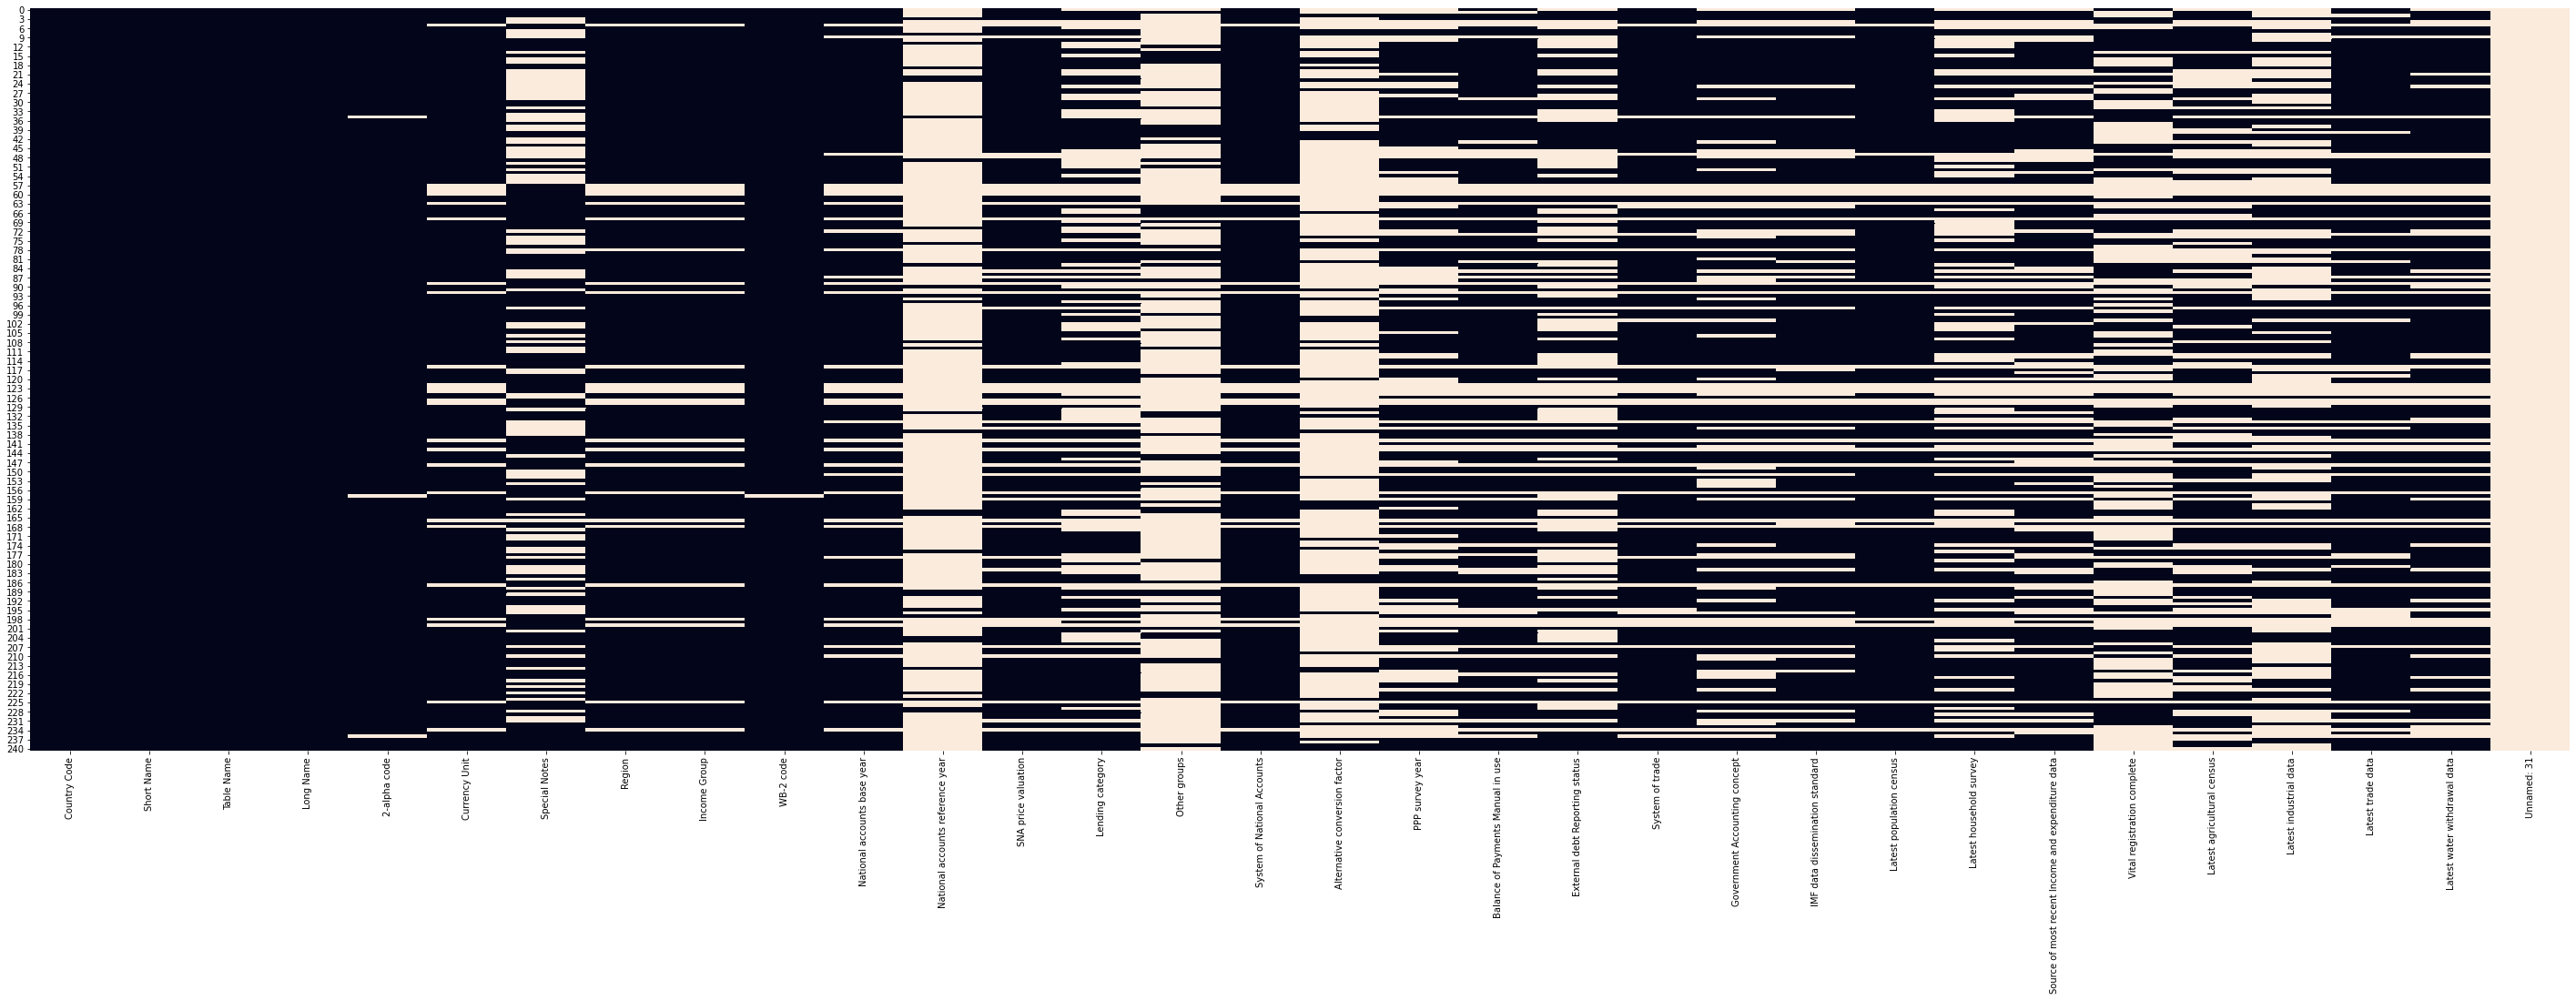

In [21]:
# Valeurs manquantes en EdStatsData
plt.figure(figsize=(50,15))
sns.heatmap(df_EdStatsCountry.isnull(), cbar=False, cmap="rocket")
plt.show()

---

Les valeurs manquantes sont représentées par des cellules beige.
La **couleur sombre** represente la **presence de données**.

---


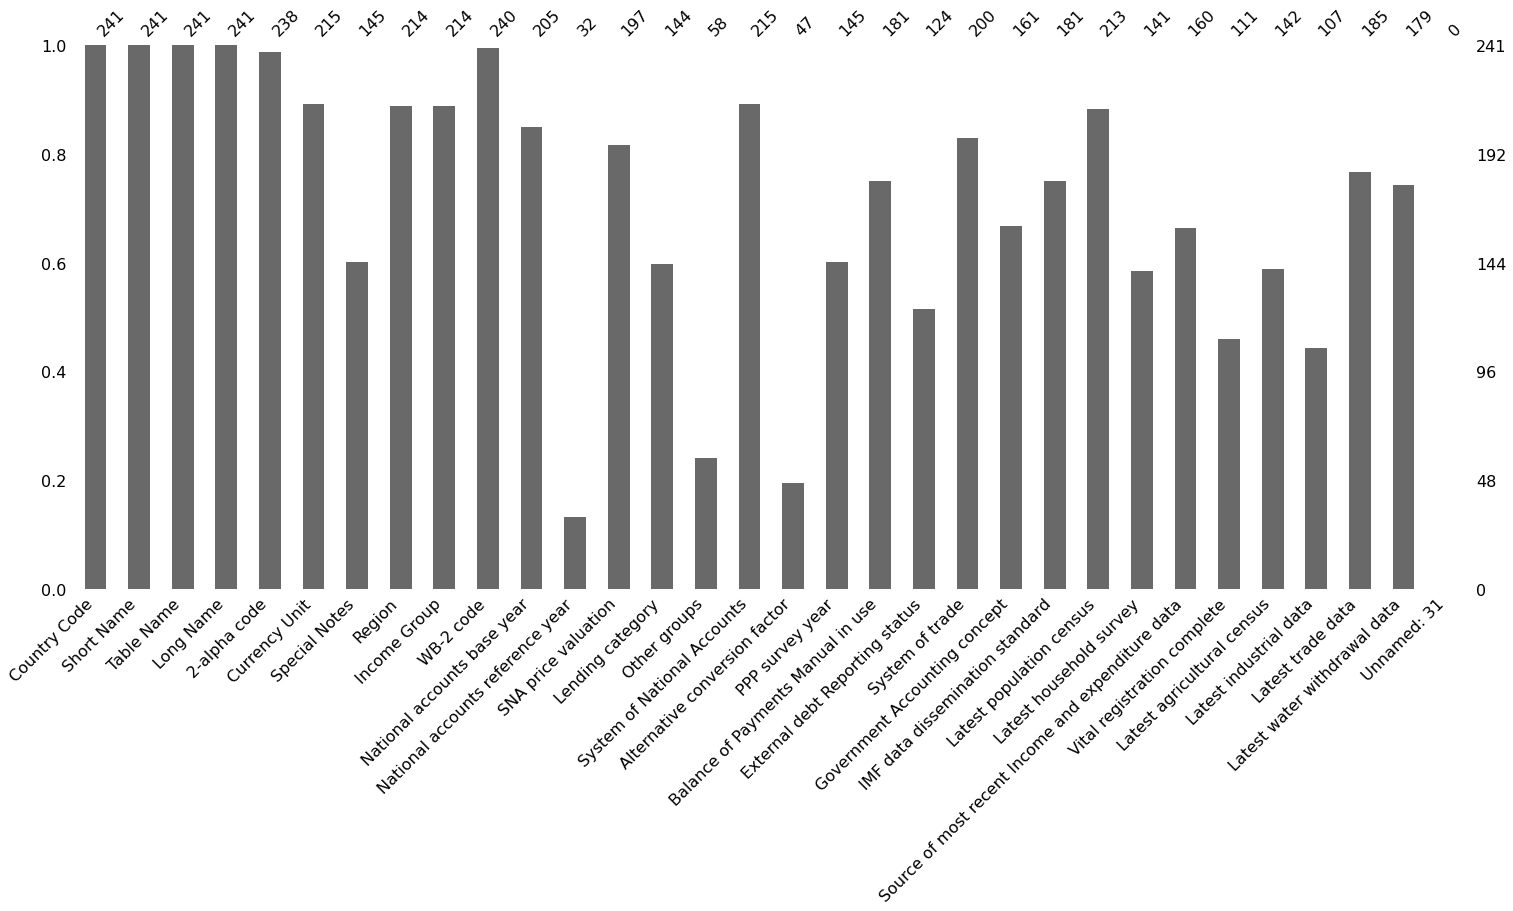

In [22]:

# Visualiser le nombre de données par colonne
plt.figure(figsize=(15,15))
msno.bar(df_EdStatsCountry)
plt.show()


In [23]:
minMAXremp(description_EdStatsCountry, ["Country Code", "Short Name", "Table Name", "Long Name"])

Pourcentage minimale remplissage 13.278008298755182
Pourcentage maximale remplissage 99.5850622406639




* Les 4 premières colonnes sont remplies au 100%, elles sont associées au nom et code du pays.
* Le taux de remplissage des autres colonnes est variable.
  * Le pourcentage de remplissage minimale des colonnes s'interessant à autre chose que le nom est de 13,27% et le pourcentage maximale est de 99,58%<br>
* La dernière colonne **Unnamed: 31** ne contient pas de données, elle devra être supprimée.


In [24]:
# Vérifier des doublons; lignes avec le même nom de pays et indicateur

df_EdStatsCountry[df_EdStatsCountry.duplicated(['Country Code', 'Table Name'])]


Empty DataFrame
Columns: [Country Code, Short Name, Table Name, Long Name, 2-alpha code, Currency Unit, Special Notes, Region, Income Group, WB-2 code, National accounts base year, National accounts reference year, SNA price valuation, Lending category, Other groups, System of National Accounts, Alternative conversion factor, PPP survey year, Balance of Payments Manual in use, External debt Reporting status, System of trade, Government Accounting concept, IMF data dissemination standard, Latest population census, Latest household survey, Source of most recent Income and expenditure data, Vital registration complete, Latest agricultural census, Latest industrial data, Latest trade data, Latest water withdrawal data, Unnamed: 31]
Index: []

[0 rows x 32 columns]

In [25]:

# Verification de la correspondance des entrées uniques des colonnes apparentées

# Pays dans le fichier EdStatsData absentes dans le fichier EdStatsCountry
CountCode_inData_noCountry = list(set(list(df_EdStatsData["Country Code"].unique()))\
                                  .difference(list(df_EdStatsCountry["Country Code"].unique())))
print("\n"+"Code des pays spécifiques à 'EdStatsData' : "+ str(CountCode_inData_noCountry))

# Pays dans le fichier EdStatsCountry absentes dans le fichier EdStatsData
CountCode_noData_inCountry = list(set(list(df_EdStatsCountry["Country Code"].unique()))\
                                  .difference(list(df_EdStatsData["Country Code"].unique())))
print( "Code des pays spécifiques à 'EdStatsCountry' : "+ str(CountCode_noData_inCountry)+"\n")


Code des pays spécifiques à 'EdStatsData' : ['VGB']
Code des pays spécifiques à 'EdStatsCountry' : []



In [26]:
# Comme indiqué par le nombre d'elements uniques dans les 4 premières colonnes. Le fichier EdStatsCountry ne renseigne pas sur un pays.

# Obtenir le nom du pays à partir du fichier df_EdStatsData

df_EdStatsData.loc[df_EdStatsData["Country Code"]=='VGB', "Country Name"].unique()


array(['British Virgin Islands'], dtype=object)

In [27]:
# Pour plus de clarté, on renomme les colonnes contenant des entrées apparentées :

df_EdStatsCountry.rename(columns={'Table Name':'Country Name'}, inplace=True)



* Pas de doublons des pairs Code / Name des pays

* Un code de pays présent dans le fichier EdStatsData est absent dans le fichier EdStatsCountry, il s'agit de "VGB" correspondant à "British Virgin Islands".<br>

<span style='background:#e2e2e2'>*Note*</span>
* Une des colonnes contient des entrées apparantées à celles du fichier EdStatsData, mais le nom de la colonne es different. Pour plus de clarté cette colonne a été renommée.
* Si on travaille avec ce fichier il faudra considérer l'integration de "VGB" / "British Virgin Islands".



<a id='Description_du_fichier_EdStatsSeries'></a>

---
---

<span style='background:#c9e6ff'>**Description du fichier EdStatsSeries**</span>

---

In [28]:

# EdStatsSeries aperçu
df_EdStatsSeries = pd.read_csv('EdStatsSeries.csv')
df_EdStatsSeries.head(3)


Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  

[3 rows x 21 columns]

In [29]:

# EdStatsSeries description
description_df_EdStatsSeries = compl_info(df_EdStatsSeries).append(df_EdStatsSeries.describe(include='all'))
description_df_EdStatsSeries


Series Code              Topic  \
Type                         object             object   
null                              0                  0   
Percent count                 100.0              100.0   
count                          3665               3665   
unique                         3665                 37   
top            SABER.SCH.ATNM.GOAL4  Learning Outcomes   
freq                              1               1046   
mean                            NaN                NaN   
std                             NaN                NaN   
min                             NaN                NaN   
25%                             NaN                NaN   
50%                             NaN                NaN   
75%                             NaN                NaN   
max                             NaN                NaN   

                                                  Indicator Name  \
Type                                                      object   
null                                                           0   
Percent count                                              100.0   
count                                                       3665   
unique                                                      3665   
top            Gross enrolment ratio, post-secondary non-tert...   
freq                                                           1   
mean                                                         NaN   
std                                                          NaN   
min                                                          NaN   
25%                                                          NaN   
50%                                                          NaN   
75%                                                          NaN   
max                                                          NaN   

                                                Short definition  \
Type                                                      object   
null                                                        1509   
Percent count                                          58.826739   
count                                                       2156   
unique                                                      1169   
top            Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
freq                                                         215   
mean                                                         NaN   
std                                                          NaN   
min                                                          NaN   
25%                                                          NaN   
50%                                                          NaN   
75%                                                          NaN   
max                                                          NaN   

                                                 Long definition  \
Type                                                      object   
null                                                           0   
Percent count                                              100.0   
count                                                       3665   
unique                                                      2060   
top            Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
freq                                                         215   
mean                                                         NaN   
std                                                          NaN   
min                                                          NaN   
25%                                                          NaN   
50%                                                          NaN   
75%                                                          NaN   
max                                                          NaN   

              Unit of measure Periodicity                 Base Period  \
Type             

In [30]:
df_EdStatsSeries["Topic"].nunique()

37

In [31]:
minMAXremp(description_df_EdStatsSeries, ["Series Code", "Topic", "Indicator Name", "Long definition"])

Pourcentage minimale remplissage 0.0
Pourcentage maximale remplissage 100.0



  
  * Le fichier *EdStatsSeries* est composée de 3665 lignes et 20 colonnes. 
  * Chaque ligne corresponds à un indicateur statistique. Les colonnes renseignent différents aspects des indicateurs.
  * Les indicateurs appartient à 37 domaines differents.<br>
  

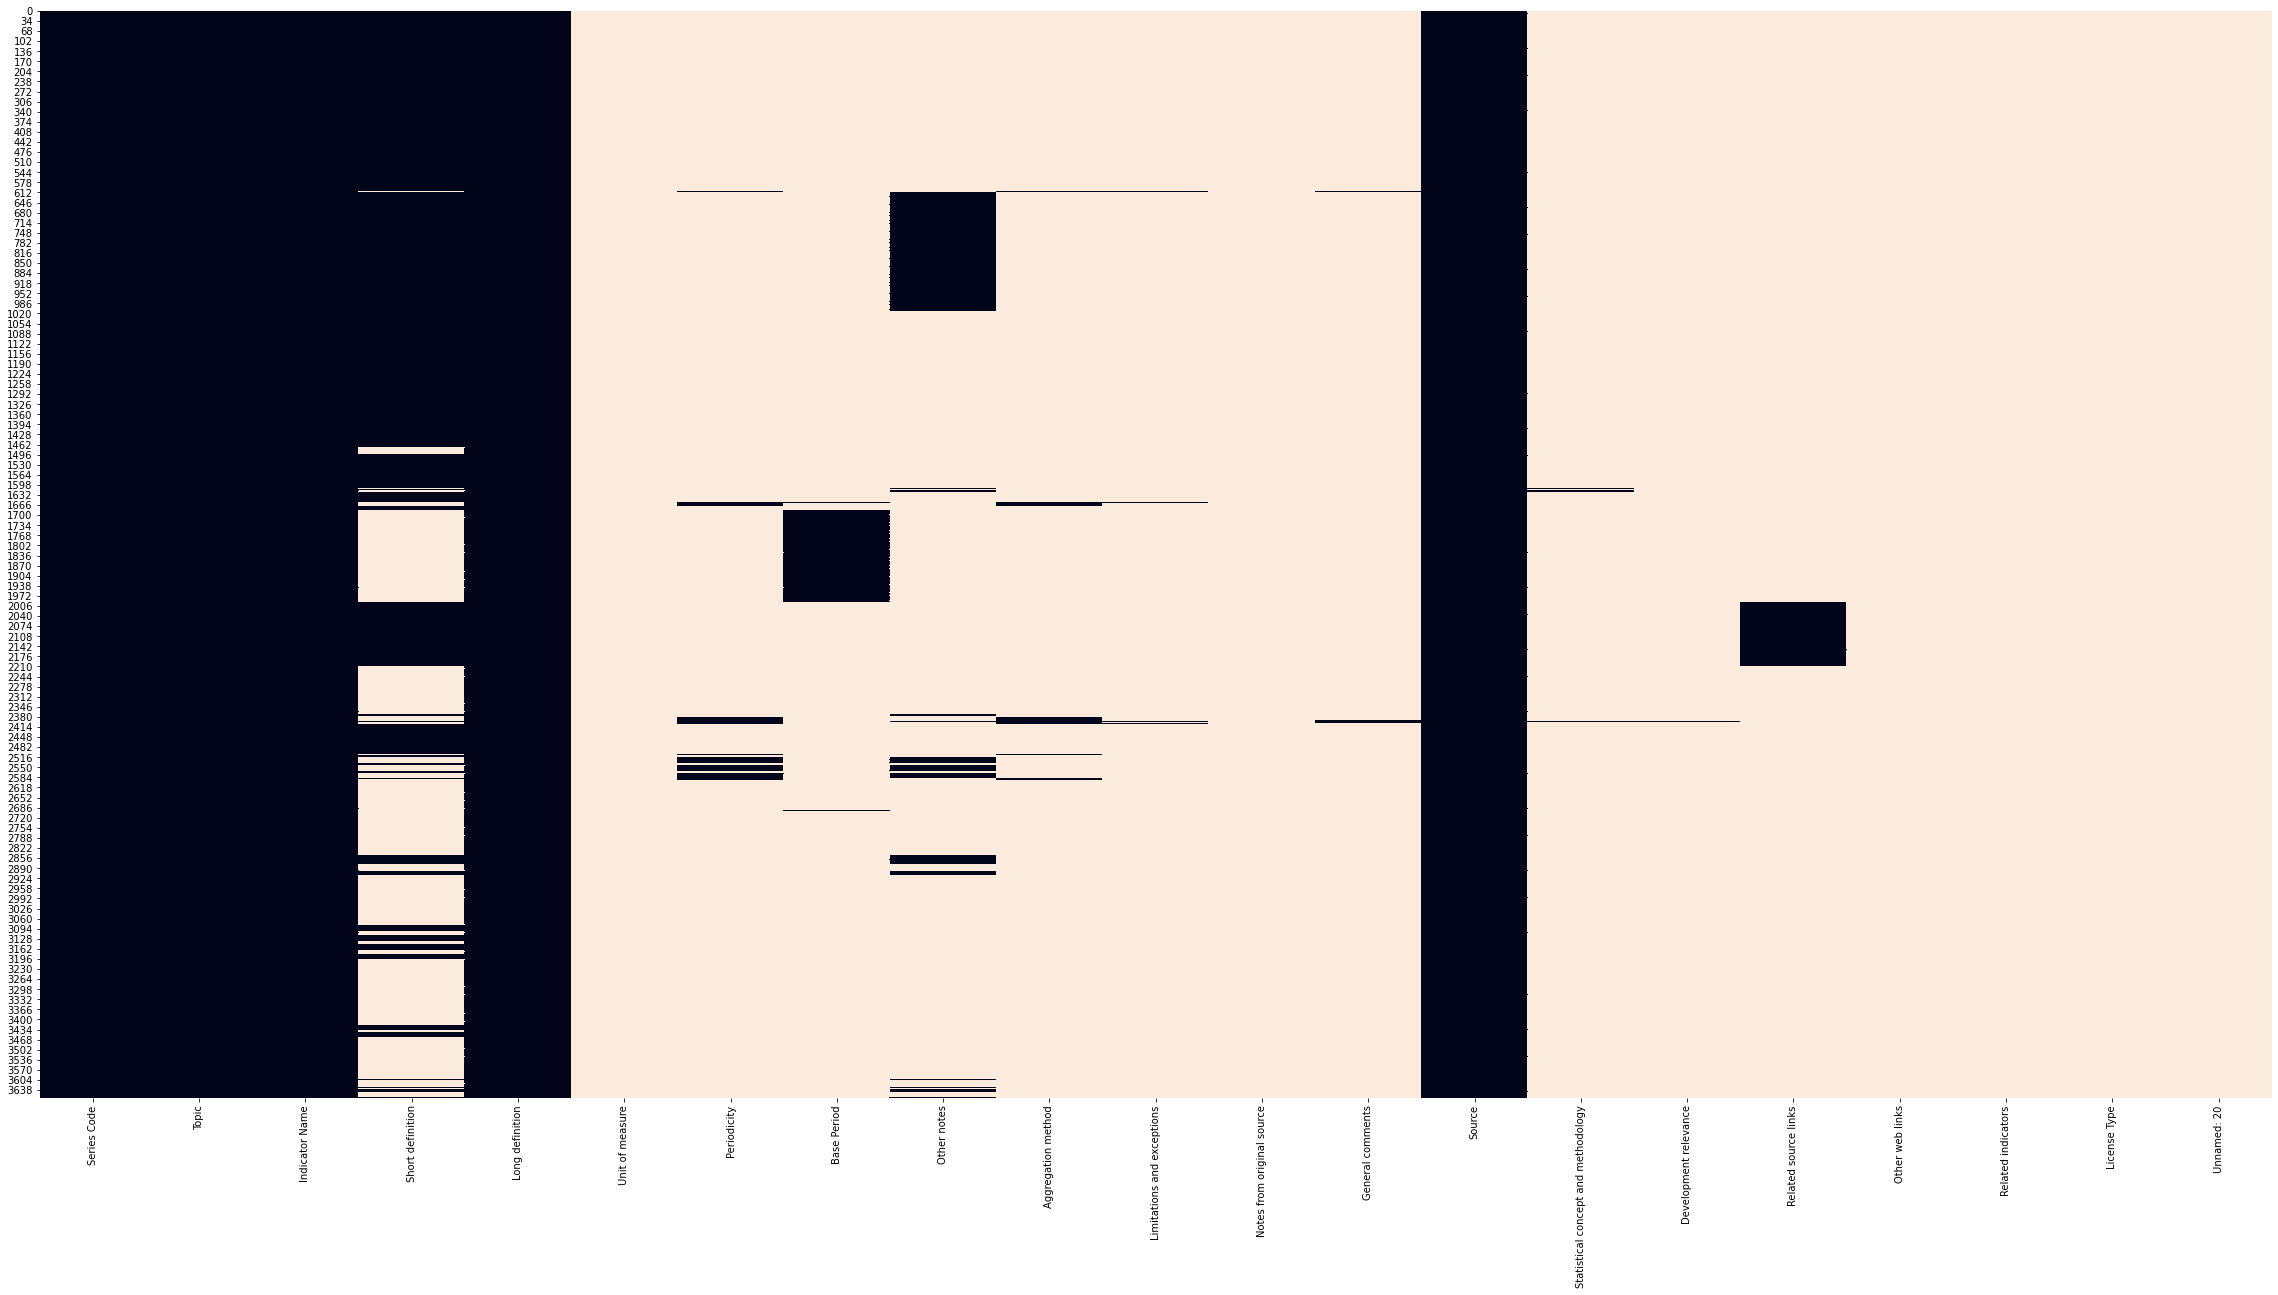

In [32]:
# Valeurs manquantes en EdStatsSeries
plt.figure(figsize=(40,20))
sns.heatmap(df_EdStatsSeries.isnull(), cbar=False, cmap="rocket")
plt.show()

---

Les valeurs manquantes sont représentées par des cellules beige.
La **couleur sombre** represente la **presence de données**.

---


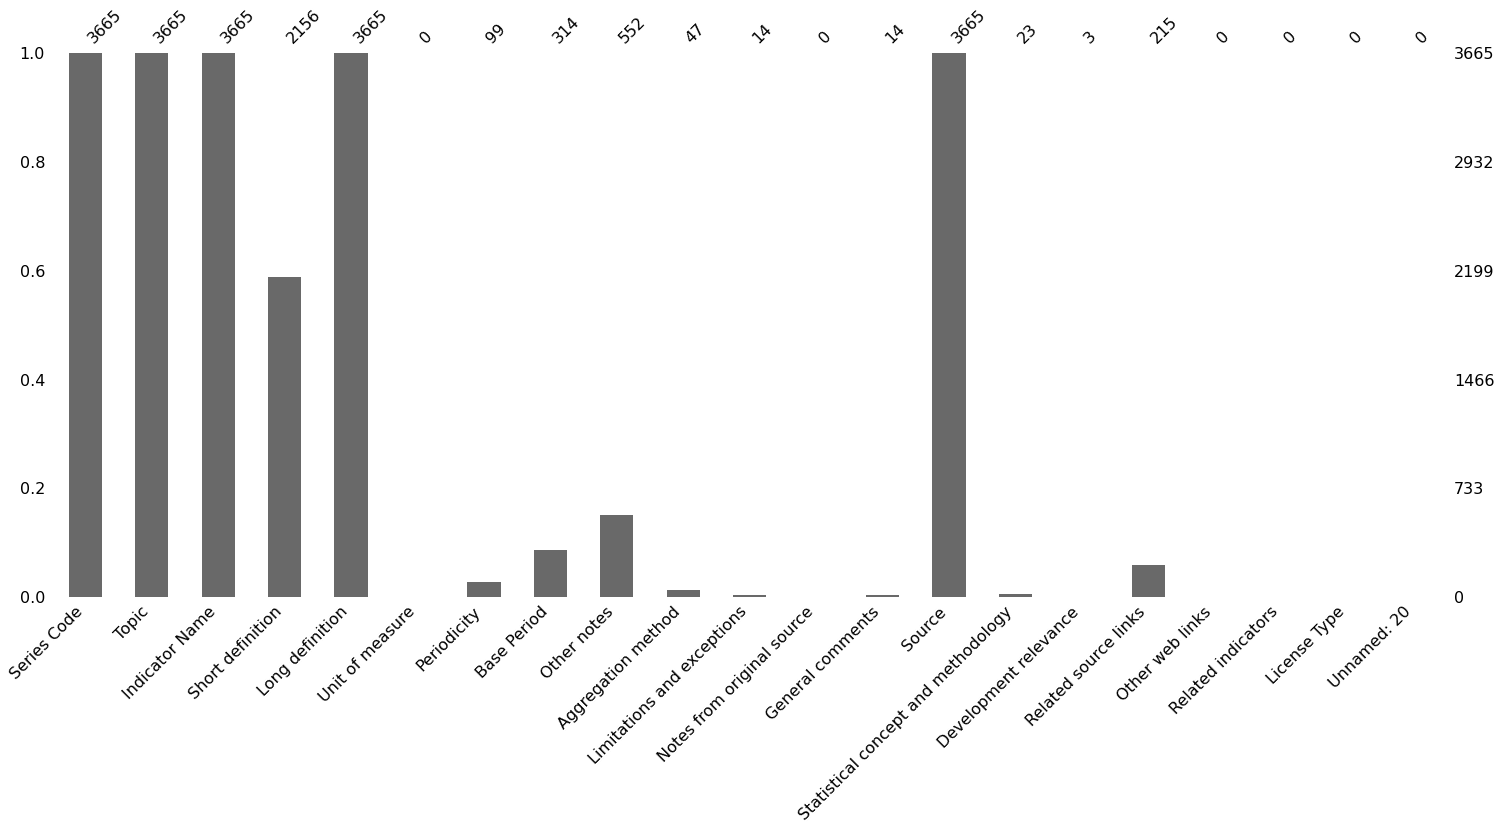

In [33]:

# Visualiser le nombre de données par colonne
plt.figure(figsize=(15,15))
msno.bar(df_EdStatsSeries)
plt.show()



* Il y a 7 colonnes completement deporvues de données.Entre 1971 et 1989 le volume de données disponibles est assez constant, mais les pairs pays/indicateur renseignés par année varient visiblement.
* Il y a 8 colonnes avec des volumes de données variables;
* Les colonnes toujours renseignes correspondent à
    * Code de l'indicateur
    * Domaine ("Topic", sujet général auquel il est associé)
    * Nom de l'indicateur
    * Définition longe
    * Source

* La dernière colonne **Unnamed: 20** ne contient pas de données, elle devra être supprimée.


In [34]:

# Vérifier des doublons; lignes avec le même code et nom indicateur
df_EdStatsSeries[df_EdStatsSeries.duplicated(['Indicator Name', 'Series Code'])]


Empty DataFrame
Columns: [Series Code, Topic, Indicator Name, Short definition, Long definition, Unit of measure, Periodicity, Base Period, Other notes, Aggregation method, Limitations and exceptions, Notes from original source, General comments, Source, Statistical concept and methodology, Development relevance, Related source links, Other web links, Related indicators, License Type, Unnamed: 20]
Index: []

[0 rows x 21 columns]

In [35]:

# Pour plus de clarté, on renomme les colonnes contenant des entrées apparentées :

df_EdStatsSeries.rename(columns={'Series Code':'Indicator Code'}, inplace=True)


In [36]:

# Codes d'indicateurs dans le fichier df_EdStatsSeries absentes dans le fichier EdStatsData
IndCode_noData_inStatSeries = list(set(list(df_EdStatsSeries["Indicator Code"].unique()))\
                                  .difference(list(df_EdStatsData["Indicator Code"].unique())))
print("Code des pays spécifiques à 'df_EdStatsSeries' : "+ str(len(IndCode_noData_inStatSeries))+"\n")


Code des pays spécifiques à 'df_EdStatsSeries' : 53



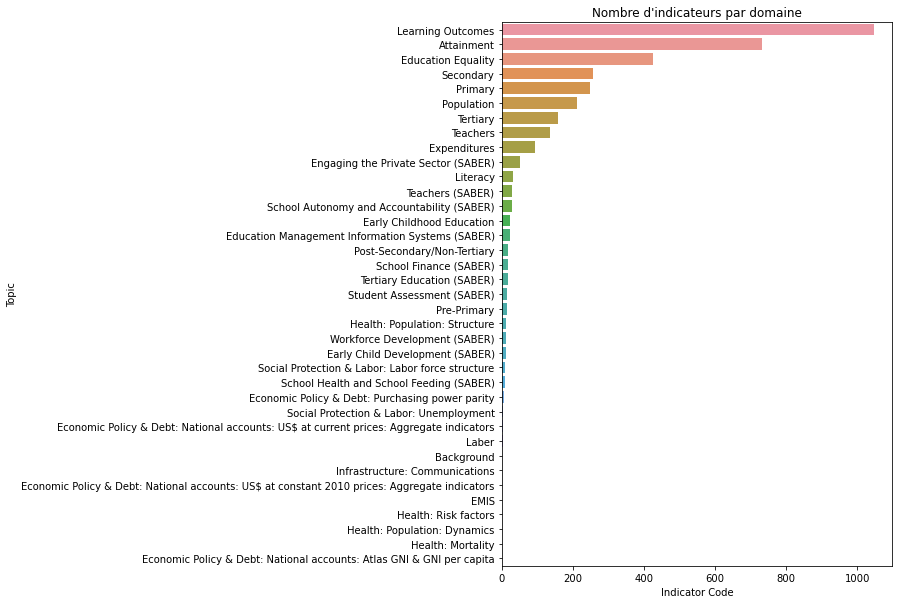

In [37]:

graph_distribInfo_Topic = plt.subplots(figsize=(7,10))
plt.title("Nombre d'indicateurs par domaine")

# Data
indicateurs_par_topic = df_EdStatsSeries.groupby('Topic')['Indicator Code'].nunique().reset_index().sort_values(by=["Indicator Code"], ascending=False)# .nunique() count unique values


#Graph
Num_ind_par_topic = sns.barplot(data=indicateurs_par_topic, x="Indicator Code", y="Topic")

plt.show()




* Pas de doublons des pairs Name / Code des indicateurs
* Il y a 53 codes d'indicateurs présents dans ce fichier qui ne sont pas informés dans le fichier EdStatsData
<br>

<span style='background:#e2e2e2'>*Note*</span>
La colonne avec le code des indicateurs contient des entrées apparantées à celles du fichier EdStatsData, mais le nom est different. Pour plus de clarté cette colonne a ont été renommées.


<a id='Description_du_fichier_EdStatsCountrySeries'></a>

---
---

<span style='background:#c9e6ff'>**Description du fichier EdStatsCountrySeries**</span>

---

In [38]:

df_EdStatsCountrySeries = pd.read_csv('EdStatsCountrySeries.csv')

# EdStatsCountrySeries aperçu
df_EdStatsCountrySeries.head(3)


CountryCode   SeriesCode                                        DESCRIPTION  \
0         ABW  SP.POP.TOTL  Data sources : United Nations World Population...   
1         ABW  SP.POP.GROW  Data sources: United Nations World Population ...   
2         AFG  SP.POP.GROW  Data sources: United Nations World Population ...   

   Unnamed: 3  
0         NaN  
1         NaN  
2         NaN

In [39]:

# EdStatsCountrySeries description
description_EdStatsCountrySeries = compl_info(df_EdStatsCountrySeries).append(df_EdStatsCountrySeries.describe(include='all'))
description_EdStatsCountrySeries


CountryCode   SeriesCode  \
Type               object       object   
null                    0            0   
Percent count       100.0        100.0   
count                 613          613   
unique                211           21   
top                   MDA  SP.POP.GROW   
freq                   18          211   
mean                  NaN          NaN   
std                   NaN          NaN   
min                   NaN          NaN   
25%                   NaN          NaN   
50%                   NaN          NaN   
75%                   NaN          NaN   
max                   NaN          NaN   

                                                     DESCRIPTION Unnamed: 3  
Type                                                      object    float64  
null                                                           0        613  
Percent count                                              100.0        0.0  
count                                                        613        0.0  
unique                                                        97        NaN  
top            Data sources : United Nations World Population...        NaN  
freq                                                         154        NaN  
mean                                                         NaN        NaN  
std                                                          NaN        NaN  
min                                                          NaN        NaN  
25%                                                          NaN        NaN  
50%                                                          NaN        NaN  
75%                                                          NaN        NaN  
max                                                          NaN        NaN


* Le fichier **EdStatsCountrySeries** comporte 613 lignes et 4 colonnes. 
* Ce fichier contiens des précisions sur les sources des données de certains couples Pays/Indicateur<br>


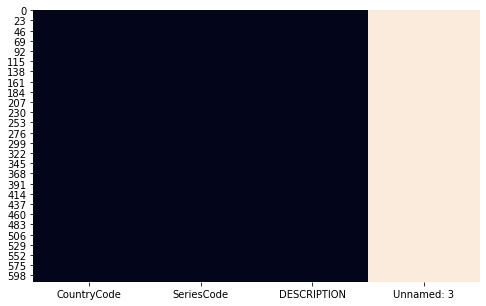

In [40]:

# Valeurs manquantes en EdStatsCountrySeries
plt.figure(figsize=(8,5))
sns.heatmap(df_EdStatsCountrySeries.isnull(), cbar=False, cmap="rocket")
plt.show()


* Les trois premières colonnes sont remplies au 100%.<br>
* La dernière colonne **Unnamed: 3** ne contient pas de données, elle devra être supprimée.


In [41]:
# Vérifier des doublons; lignes avec le même code de pays et d'indicateur
df_EdStatsCountrySeries[df_EdStatsCountrySeries.duplicated(['CountryCode', 'SeriesCode'])]


Empty DataFrame
Columns: [CountryCode, SeriesCode, DESCRIPTION, Unnamed: 3]
Index: []

In [42]:
# Pour plus de clarté, on renomme les colonnes contenant des entrées apparentées :

df_EdStatsCountrySeries.rename(columns={'CountryCode':'Country Code','SeriesCode':'Indicator Code'}, inplace=True)


In [43]:


# Codes de pays dans le fichier EdStatsCountrySeries absentes dans le fichier EdStatsData
CountCode_noData_inCountrySe = list(set(list(df_EdStatsCountrySeries["Country Code"].unique()))\
                                  .difference(list(df_EdStatsData["Country Code"].unique())))
print("Code des pays spécifiques à 'EdStatsCountrySeries' : "+ str(CountCode_noData_inCountrySe))


Code des pays spécifiques à 'EdStatsCountrySeries' : []



* Pas de doublons des pairs code de pays/ code d'indicateur
* Tous les codes de pays présents dans ce fichier sont présents dans le fichier EdStatsData
<br>

<span style='background:#e2e2e2'>*Note*</span>
Deux des colonnes contient des entrées apparantées à celles du fichier EdStatsData, mais le nom des colonnes es different. Pour plus de clarté ces colonnes ont été renommées.


<a id='Description_du_fichier_EdStatsFootNote'></a>

---
---

<span style='background:#c9e6ff'>**Description du fichier EdStatsFootNote**</span>

---

In [44]:

# EdStatsFootNote aperçu
df_EdStatsFootNote = pd.read_csv('EdStatsFootNote.csv')
df_EdStatsFootNote.head()


CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [45]:

# EdStatsFootNote description
description_df_EdStatsFootNote = compl_info(df_EdStatsFootNote).append(df_EdStatsFootNote.describe(include='all'))
description_df_EdStatsFootNote


CountryCode   SeriesCode    Year   DESCRIPTION Unnamed: 4
Type               object       object  object        object    float64
null                    0            0       0             0     643638
Percent count       100.0        100.0   100.0         100.0        0.0
count              643638       643638  643638        643638        0.0
unique                239         1558      56          9102        NaN
top                   LIC  SH.DYN.MORT  YR2004  Country Data        NaN
freq                 7320         9226   27128        191188        NaN
mean                  NaN          NaN     NaN           NaN        NaN
std                   NaN          NaN     NaN           NaN        NaN
min                   NaN          NaN     NaN           NaN        NaN
25%                   NaN          NaN     NaN           NaN        NaN
50%                   NaN          NaN     NaN           NaN        NaN
75%                   NaN          NaN     NaN           NaN        NaN
max                   NaN          NaN     NaN           NaN        NaN

  
   * Le fichier **EdStatsFootNote** comporte 643638 lignes et 5 colonnes. 
   * Ce fichier apporte des précisions sur la valeur d'un couple pays/indicateur pour certaines années.<br>

<span style='background:#e2e2e2'>*Note*</span>
La colonne "Year" contient des données type "object", si on doit l'utiliser il faudra tenir compte.
   

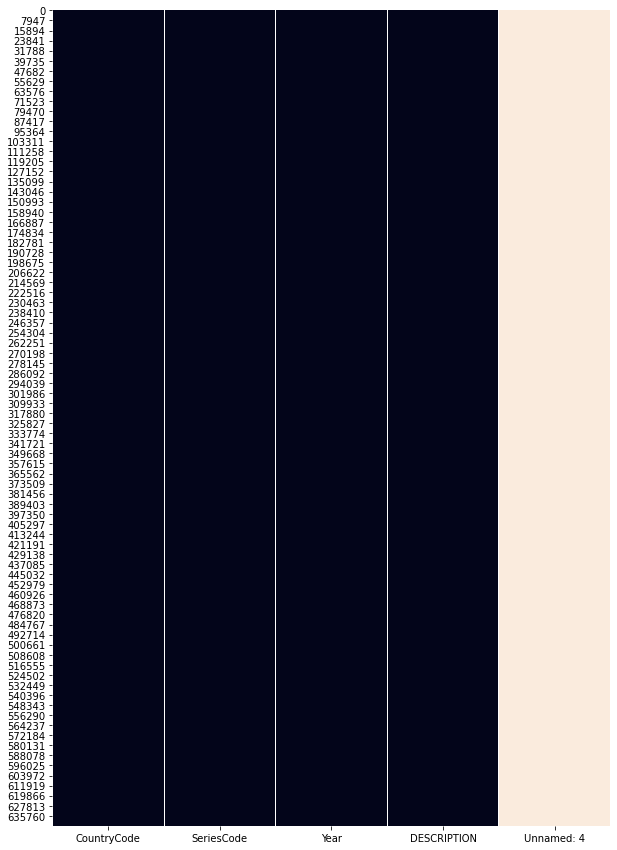

In [46]:
# Valeurs manquantes en EdStatsFootNote
plt.figure(figsize=(10,15))
sns.heatmap(df_EdStatsFootNote.isnull(), cbar=False, cmap="rocket")
plt.show()

---

Les valeurs manquantes sont représentées par des cellules beige.
La **couleur sombre** represente la **presence de données**.

---



* Les quatre premières colonnes sont remplies au 100%.<br>
* La dernière colonne **Unnamed: 4** ne contient pas de données, elle devra être supprimée.


In [47]:

# Vérifier des doublons; lignes avec le même code de pays, d'indicateur pour la même année
df_EdStatsFootNote[df_EdStatsFootNote.duplicated(['CountryCode', 'SeriesCode', 'Year'])]



Empty DataFrame
Columns: [CountryCode, SeriesCode, Year, DESCRIPTION, Unnamed: 4]
Index: []

In [48]:

# Pour plus de clarté, on renomme les colonnes contenant des entrées apparentées :
df_EdStatsFootNote.rename(columns={'CountryCode':'Country Code','SeriesCode':'Indicator Code'}, inplace=True)


In [49]:

# Codes de pays dans le fichier EdStatsFootNote absentes dans le fichier EdStatsData
CountCode_noData_inFootNote = list(set(list(df_EdStatsFootNote["Country Code"].unique()))\
                                  .difference(list(df_EdStatsData["Country Code"].unique())))
print("Code des pays spécifiques à 'EdStatsFootNote' : "+ str(CountCode_noData_inFootNote)+"\n")



# Codes d'indicateur dans le fichier EdStatsFootNote absentes dans le fichier EdStatsData
CountInCode_noData_inFootNote = list(set(list(df_EdStatsFootNote["Indicator Code"].unique()))\
                                  .difference(list(df_EdStatsData["Indicator Code"].unique())))
print("Code d'indicateur spécifiques à 'EdStatsFootNote' : "+ str(len(CountInCode_noData_inFootNote))+"\n")


Code des pays spécifiques à 'EdStatsFootNote' : []

Code d'indicateur spécifiques à 'EdStatsFootNote' : 89





* Pas de doublons des associations Code de pays/ Code d'indicateur / Année
* Tous les codes de pays présents dans ce fichier sont présents dans le fichier EdStatsData
* Il y a 89 codes d'indicateurs présents dans ce fichier qui ne sont pas informés dans le fichier EdStatsData
<br>

<span style='background:#e2e2e2'>*Note*</span>
Deux des colonnes contient des entrées apparantées à celles du fichier EdStatsData, mais le nom des colonnes es different. Pour plus de clarté ces colonnes ont été renommées.


---
---
---

In [50]:

#Dans le present notebook on travaillera sur les cinq dataframes ci-desous

# Copie pour préserver les fichiers originaus
# Élimine les colonnes fantômes "Unamed" (0 non-null count) en fin de tableau

df_EdStatsData = df_EdStatsData.drop(columns =["Unnamed: 69"]).copy() # la dernière colonne c'est 'Count Data' qu'on a crée pour cuantifier le nombre de données par ligne
df_EdStatsCountrySeries = df_EdStatsCountrySeries.copy().iloc[:, :-1]
df_EdStatsSeries = df_EdStatsSeries.copy().iloc[:, :-1]
df_EdStatsCountry = df_EdStatsCountry.copy().iloc[:, :-1]
df_EdStatsFootNote = df_EdStatsFootNote.copy().iloc[:, :-1]



---
---
---

# <span style='background:#004c6d'><span style='color:white'> **Comprendre l'information disponible**</span>


Deux informations permetent de relier les 5 fichiers disponibles:
 * Nom / Code pays
 * Nom / Code indicateur

Pour mieux comprendre le jeux de données on va d'abord comprendre ces variables.


## <span style='background:#507c9b'><span style='color:white'>Informations "Countries"</span>

Voici la liste des "Country Name" dans **EdStatsData.csv**

In [51]:
#df_EdStatsData['Country Name'].unique()

Une revision rapide de la liste revéle qu'elle ne contient que des pays mais **aussi des groupements de pays**.<br>
Dans le fichier **'EdStatsCountry.csv'** il y a trois colonnes (**Currency Unit**, **Region** and **Income Group** ) qui semblaient vides pour les groupements de pays.<br>

Le fichier **'EdStatsCountry.csv'** contient également une colonne **Country Code** qui semble equivalente de celle du fichier **EdStatsData** et que pourrait donc être utile pour intégrer les informations.<br>

Les etapes suivies pour differencier les pays des broupements de pays sont:<br>
 1. [Analyser les informations associées à "VGB" / "British Virgin Islands"](#Analyser_British_Virgin_Islands)
 2. [Combinaison des informations contenues dans les deux dataframe](#combinaison_EdStatsData_EdStatsCountry)
 3. [Vérifier pour quels pays les colonnes ajoutées contiennent des informations](#verification_distrib_information)
 4. [Création d'une nouvelle colonne intitulée "Group of countries"](#creation_group_countries)

<a id='Analyser_British_Virgin_Islands'></a>

La vérification de la correspondance des entrées uniques des colonnes apparentées réalisée précédemment a révélé l'absence d'un "Country Code" dans le fichier  EdStatsCountry.<br>
Ce code est "VGB" et correspond à British virgin Islands.<br>
Cela implique que toutes les informations relatives à ce pays seront absentes du fichier EdStatsCountry.Dans le soucis d'utilser certains des colonnes de ce tableau, on va les complèter.<br>


In [52]:

# Vérifier les valeurs prises par les trois variables qui nous intéressent dans EdStatsCountry

currency_list = list(df_EdStatsCountry['Currency Unit'].unique())
regions_list = list(df_EdStatsCountry['Region'].unique())
income_group_list = list(df_EdStatsCountry['Income Group'].unique())

#print(currency_list)
#print(regions_list)
#print(income_group_list)


La recherche des informations nécessaires révèle les données suivantes:
   * "Currency Unit" = U. S. dollar 
   * "Region" = Latin America & Caribbean
   * "Income Group" = High income: nonOECD


In [53]:

# Compléter les informations associées à "VGB" / "British Virgin Islands"

VGB_row = {"Country Code":"VGB", "Country Name":"British Virgin Islands", "Currency Unit": "U. S. dollar", "Region":"Latin America & Caribbean", "Income Group": "High income: nonOECD"} # ligne à ajouer
df_EdStatsCountry = df_EdStatsCountry.append(VGB_row, ignore_index=True) # ajout en bas de la liste
#df_EdStatsCountry.tail(1)


<a id='combinaison_EdStatsData_EdStatsCountry'></a>

In [54]:

# Merge EdStatsData.csv et EdStatsCountry.csv

df_complet = df_EdStatsData.merge(df_EdStatsCountry,how='left', on='Country Code') 
# "how = left" indique que la reference pour conserver les entrées c'est le document de gauche 
   #(si dans le document de droite il y a des country codes extra ils ne seront pas pris en compte)
df_complet.rename(columns={'Country Name_x':'Country Name'}, inplace=True)


<a id='verification_distrib_information'></a>

In [55]:

#Vérifier si les trois colonnes renseignent les mêmes lignes ou s'il y a des differences

# Trasformer les colonnes en variables boolean (1 = exist / 0 = does not exist) 
#les valeurs des variables boolean seront 1 dans les cellules contenant quelque chose 0 dans les cellules vides

df_complet['Currency Unit Exist'] = df_complet['Currency Unit'].notna().astype(int)
df_complet['Region Exist'] = df_complet['Region'].notna().astype(int)
df_complet['Group'] = df_complet['Income Group'].notna().astype(int)

df_complet['CurrencyRegionGroup']=df_complet['Currency Unit Exist'] + df_complet['Region Exist'] + df_complet['Group']

CurrencyRegionGroup = df_complet.groupby('CurrencyRegionGroup')['Country Name'].unique()
CurrencyRegionGroup

CurrencyRegionGroup
0    [Arab World, East Asia & Pacific, East Asia & ...
1                                          [Gibraltar]
3    [Afghanistan, Albania, Algeria, American Samoa...
Name: Country Name, dtype: object

In [56]:
df_EdStatsCountry.loc[df_EdStatsCountry['Short Name'] == 'Gibraltar']

Country Code Short Name Country Name  Long Name 2-alpha code  \
78          GIB  Gibraltar    Gibraltar  Gibraltar           GI   

      Currency Unit Special Notes Region Income Group WB-2 code  ...  \
78  Gibraltar pound           NaN    NaN          NaN        GI  ...   

   Government Accounting concept  IMF data dissemination standard  \
78                           NaN                              NaN   

   Latest population census Latest household survey  \
78                     2012                     NaN   

   Source of most recent Income and expenditure data  \
78                                               NaN   

   Vital registration complete Latest agricultural census  \
78                         NaN                        NaN   

   Latest industrial data Latest trade data Latest water withdrawal data  
78                    NaN               NaN                          NaN  

[1 rows x 31 columns]

- Le "1" associé à Gibraltar est du au fait qu'il a une "Currency Unit" associée, mais pas de 'Region' ou de 'Income Group'.

J'ai verifié et 
*Under its current constitution, Gibraltar has almost complete internal self-governance through a parliament elected for a term of up to four years.*

Du coup je decide de conserver Gibraltar comme un pays et en pas l'intégrer aux données du Royaume Uni.

In [57]:

# Complèter les informations pour Gibraltar dans df_EdStatsCountry
df_EdStatsCountry.loc[[78], 'Region'] = ['Europe & Central Asia']
df_EdStatsCountry.loc[[78], 'Income Group'] = ['High income: OECD']


# Complèter les informations pour Gibraltar dans df_complet
listIDGib = df_complet.index[df_complet['Country Name'] =="Gibraltar"].tolist()

df_complet.loc[listIDGib, 'Region'] = ['Europe & Central Asia']*len(listIDGib)
df_complet.loc[listIDGib, 'Income Group'] = ['High income: OECD']*len(listIDGib)


<a id='creation_group_countries'></a>

In [58]:
#Créer une colonne boolean  'Country' = FALSE, 'Group of Countries' = TRUE
df_complet["Group of countries"] = df_complet['Region'].isna()

#Supprimer les colonnes crées precedenment et inutiles maintenant.
df_complet = df_complet.drop(['Currency Unit Exist', 'Region Exist', 'Group', 'CurrencyRegionGroup'], axis=1) 

#deplacer la colonne pour mieux organiser l'information
to_move = df_complet.pop('Group of countries')
df_complet.insert(4, 'Group of countries', to_move)

df_complet.head(2)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   

                                      Indicator Name Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...   UIS.NERA.2.F   

   Group of countries  1970  1971  1972  1973  1974  ...  \
0                True   NaN   NaN   NaN   NaN   NaN  ...   
1                True   NaN   NaN   NaN   NaN   NaN  ...   

   Government Accounting concept  IMF data dissemination standard  \
0                            NaN                              NaN   
1                            NaN                              NaN   

   Latest population census  Latest household survey  \
0                       NaN                      NaN   
1                       NaN                      NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1                                                NaN   

   Vital registration complete  Latest agricultural census  \
0                          NaN                         NaN   
1                          NaN                         NaN   

   Latest industrial data  Latest trade data  Latest water withdrawal data  
0                     NaN                NaN                           NaN  
1                     NaN                NaN                           NaN  

[2 rows x 101 columns]

<br>

**Combien de pays sont présents dans le tableau**

In [59]:

nomPays = df_complet.groupby('Group of countries')["Country Name"].unique().tolist()

print("Le tableau contient des informations provenant de " + "\033[1m" + str(len(nomPays[0])) +" pays. "+"\033[0m"+" \n") 
print("Et des informations sur " + "\033[1m"+ str(len(nomPays[1])) +" groupes de pays.\n" +"\033[0m")
    

Le tableau contient des informations provenant de 216 pays.  

Et des informations sur 26 groupes de pays.



In [60]:
# Création d'une liste avec le nom des pays
nomPaysList = nomPays[0] # liste avec les noms des pays dans le dataframe
nomGroupePaysList = nomPays[1] # liste avec les noms des groupements de pays dans le dataframe


## <span style='background:#507c9b'><span style='color:white'>Distribution des informations en fonction des régions et groupes de revenus</span>
* Toutes les régions du monde sont-elles représentées ?
* Comment l'information est-elle distribuée en fonction du niveau de revenu des pays ?


<a id='Obsevations'></a>

---
---

<span style='background:#c9e6ff'>**Observations 1970-2017**</span>

---

In [61]:

#Création d'un df réduit avec exclusivement les données des observations
df_complet_observations = df_complet.drop(df_complet.loc[:,"2020":"2100"].columns, axis=1)

# Ré-calculer le nombre de données par pair pays/indicateur dans l'intevalle 1970-2017
df_complet_observations['Count Data'] = df_complet_observations.loc[:, "1970":"2017"].notna().sum(axis=1).astype(float)

#Tableau avec les indicateurs pour les quels on n'a aucune donnée
df_complet_observations_Count0 = df_complet_observations[df_complet_observations['Count Data'] ==0]

#supprimer les lignes
df_complet_observations = df_complet_observations[df_complet_observations['Count Data']  !=0]
df_complet_observations = df_complet_observations.reset_index(drop=True)


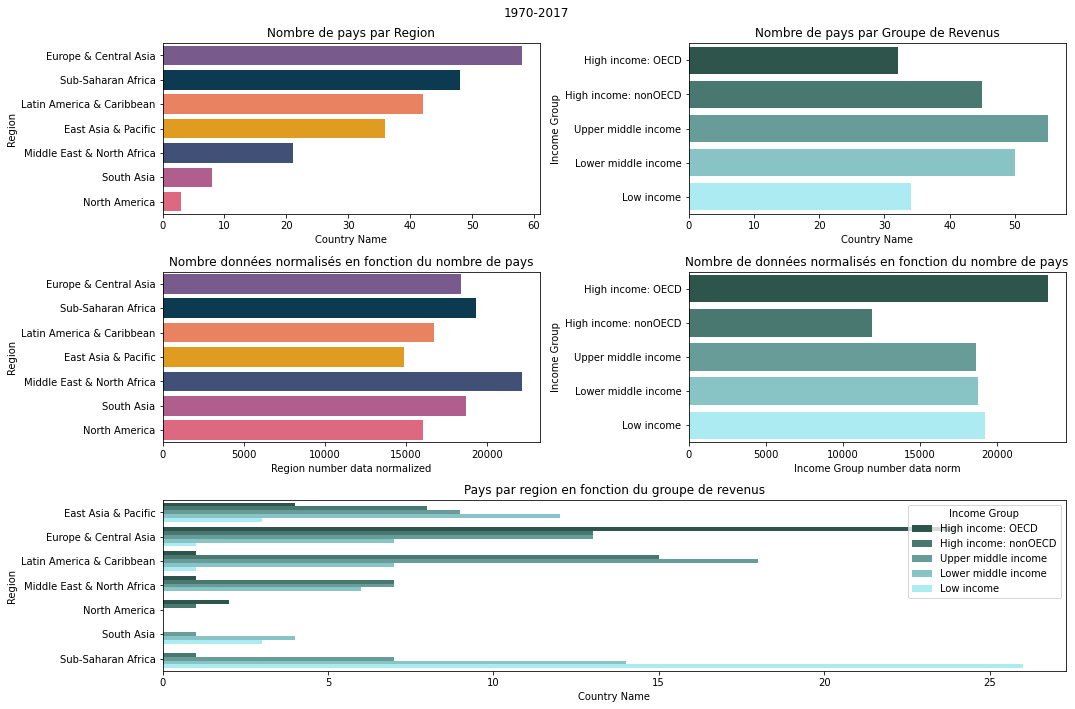

In [62]:

#------------------------
# Observations 1970-2017
#------------------------

graph_distribInfo_countries, axes = plt.subplot_mosaic([['upper left', 'upper right'],\
                                                        ['center left', 'center right'],\
                                                        ['lower', 'lower']], figsize=(15,10))
graph_distribInfo_countries.suptitle("1970-2017")


#------------------
# Palette couleurs
#------------------
colorsRegion = {"Sub-Saharan Africa": '#003f5c', "Middle East & North Africa": '#374c80', "Europe & Central Asia": '#7a5195', \
          "South Asia": '#bc5090', "North America": '#ef5675', "Latin America & Caribbean": '#ff764a', "East Asia & Pacific": '#ffa600'}
colorsIncGr = ['#265c4e','#418076','#5ea5a1','#7ecccf','#a1f4ff']


#------------------
# Data
#------------------

pays_par_Region = df_complet_observations.loc[df_complet_observations["Country Name"].isin(nomPays[0])].groupby('Region')['Country Name'].nunique().reset_index().sort_values(by=["Country Name"], ascending=False) # .nunique() count unique values
pays_par_incomeGr = df_complet_observations.loc[df_complet_observations["Country Name"].isin(nomPays[0])].groupby('Income Group')['Country Name'].nunique().reset_index()


dataRegion_normCountries = df_complet_observations.loc[df_complet_observations["Country Name"].isin(nomPays[0])].groupby('Region')["Count Data"].sum().reset_index()
dataRegion_normCountries.rename(columns={"Count Data":"Region number data"}, inplace=True)
dataRegion_normCountries["Region number data normalized"]= dataRegion_normCountries["Region number data"] / pays_par_Region["Country Name"]

dataIncGr_normCountries = df_complet_observations.loc[df_complet_observations["Country Name"].isin(nomPays[0])].groupby('Income Group')["Count Data"].sum().reset_index()
dataIncGr_normCountries.rename(columns={"Count Data":"Income Group number data"}, inplace=True)
dataIncGr_normCountries["Income Group number data norm"]= dataIncGr_normCountries["Income Group number data"] / pays_par_incomeGr["Country Name"]


pays_par_Reg_incomeGr = df_complet_observations.loc[df_complet_observations["Country Name"].isin(nomPays[0])].groupby(['Region','Income Group'])['Country Name'].nunique().reset_index()


#------------------
#Graph
#------------------
#Nombre de pays par Region
numCountr_Region = sns.barplot(ax =axes['upper left'], data=pays_par_Region, x="Country Name", y="Region", palette =  colorsRegion)
axes['upper left'].set_title("Nombre de pays par Region")

#Nombre de pays par Groupe de Revenus
numCountr_incomeGr = sns.barplot(ax =axes['upper right'], x="Country Name", y="Income Group", data=pays_par_incomeGr, order=['High income: OECD', 'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'], palette = colorsIncGr)
axes['upper right'].set_title("Nombre de pays par Groupe de Revenus")

#Données par Region normalisé en fonction du nombre de pays
NdataRegion_normCountries = sns.barplot(ax =axes['center left'], x="Region number data normalized", y="Region", data=dataRegion_normCountries, palette =  colorsRegion, order=["Europe & Central Asia", "Sub-Saharan Africa","Latin America & Caribbean","East Asia & Pacific", "Middle East & North Africa","South Asia","North America"])
axes['center left'].set_title("Nombre données normalisés en fonction du nombre de pays")

#Données par Grupe de revenus, normalisé en fonction du nombre de pays
NdataIncGr_normCountries = sns.barplot(ax =axes['center right'], x="Income Group number data norm", y="Income Group", data=dataIncGr_normCountries, order=['High income: OECD', 'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'], palette =  colorsIncGr)
axes['center right'].set_title("Nombre de données normalisés en fonction du nombre de pays")

#Pays par region en fonction du groupe de revenus
pays_par_Reg_incomeGr = sns.barplot(ax =axes['lower'], data=pays_par_Reg_incomeGr, x="Country Name", y='Region', hue='Income Group', hue_order=['High income: OECD', 'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'],palette =  colorsIncGr)
axes['lower'].set_title("Pays par region en fonction du groupe de revenus")


graph_distribInfo_countries.tight_layout()
plt.show()

<a id='Projections'></a>

---
---

<span style='background:#c9e6ff'>**Projections 2020-2100**</span>

---

In [63]:

#Création d'un df réduit avec exclusivement les données des projections
df_complet_projections = df_complet.drop(df_complet.loc[:,"1970":"2017"].columns, axis=1)

#Re-calculer le nom de données par pair pays/indicateur pour l'intervalle 2020-2100
df_complet_projections['Count Data'] = df_complet_projections.loc[:, "2020":"2100"].notna().sum(axis=1).astype(float)

#Tableau avec les indicateurs pour les quels on n'a aucune donnée
df_complet_projections_Count0 = df_complet_projections[df_complet_projections['Count Data'] ==0]

#supprimer les lignes 
df_complet_projections = df_complet_projections[df_complet_projections['Count Data']  !=0]
df_complet_projections = df_complet_projections.reset_index(drop=True)


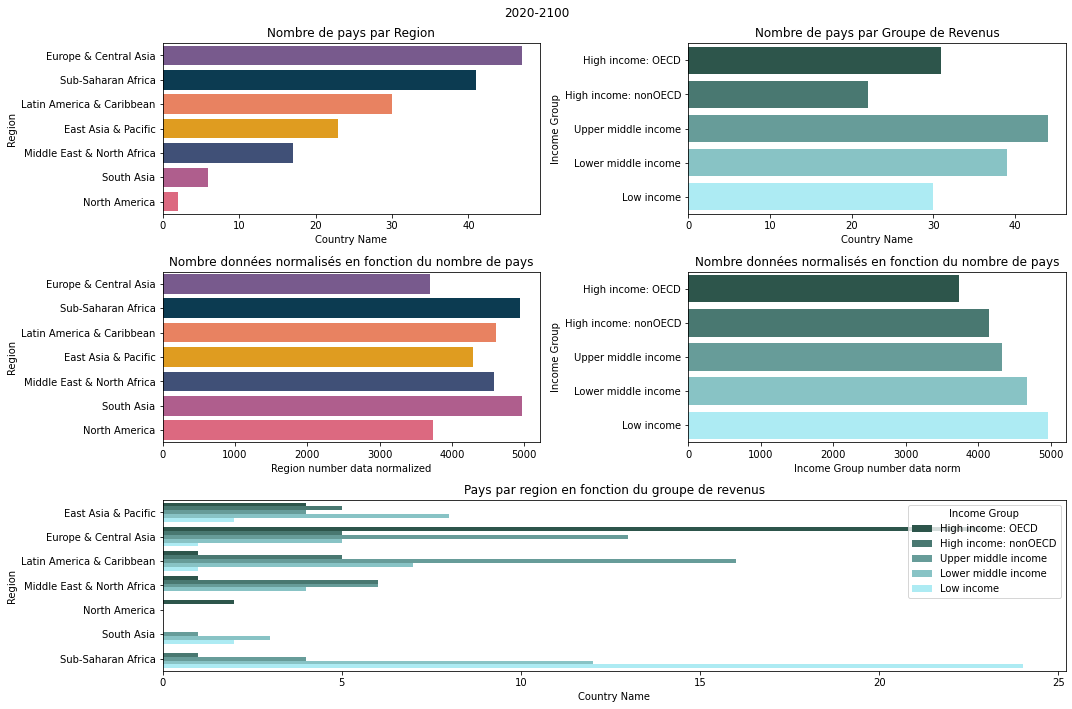

In [64]:

#------------------------
# Projections 2020-2100
#------------------------

graph_distribInfo_countries, axes = plt.subplot_mosaic([['upper left', 'upper right'],\
                                                        ['center left', 'center right'],\
                                                        ['lower', 'lower']], figsize=(15,10))
graph_distribInfo_countries.suptitle("2020-2100")


#------------------
# Data
#------------------

pays_par_Region = df_complet_projections.loc[df_complet_projections["Country Name"].isin(nomPays[0])].groupby('Region')['Country Name'].nunique().reset_index().sort_values(by=["Country Name"], ascending=False) # .nunique() count unique values
pays_par_incomeGr = df_complet_projections.loc[df_complet_projections["Country Name"].isin(nomPays[0])].groupby('Income Group')['Country Name'].nunique().reset_index()


dataRegion_normCountries = df_complet_projections.loc[df_complet_projections["Country Name"].isin(nomPays[0])].groupby('Region')["Count Data"].sum().reset_index()
dataRegion_normCountries.rename(columns={"Count Data":"Region number data"}, inplace=True)
dataRegion_normCountries["Region number data normalized"]= dataRegion_normCountries["Region number data"] / pays_par_Region["Country Name"]

dataIncGr_normCountries = df_complet_projections.loc[df_complet_projections["Country Name"].isin(nomPays[0])].groupby('Income Group')["Count Data"].sum().reset_index()
dataIncGr_normCountries.rename(columns={"Count Data":"Income Group number data"}, inplace=True)
dataIncGr_normCountries["Income Group number data norm"]= dataIncGr_normCountries["Income Group number data"] / pays_par_incomeGr["Country Name"]


pays_par_Reg_incomeGr = df_complet_projections.loc[df_complet_projections["Country Name"].isin(nomPays[0])].groupby(['Region','Income Group'])['Country Name'].nunique().reset_index()


#------------------
#Graph
#------------------
#Nombre de pays par Region
numCountr_Region = sns.barplot(ax =axes['upper left'], data=pays_par_Region, x="Country Name", y="Region", palette =  colorsRegion)
axes['upper left'].set_title("Nombre de pays par Region")

#Nombre de pays par Groupe de Revenus
numCountr_incomeGr = sns.barplot(ax =axes['upper right'], x="Country Name", y="Income Group", data=pays_par_incomeGr, order=['High income: OECD', 'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'], palette = colorsIncGr)
axes['upper right'].set_title("Nombre de pays par Groupe de Revenus")

#Données par Region normalisé en fonction du nombre de pays
NdataRegion_normCountries = sns.barplot(ax =axes['center left'], x="Region number data normalized", y="Region", data=dataRegion_normCountries, palette =  colorsRegion, order=["Europe & Central Asia", "Sub-Saharan Africa","Latin America & Caribbean","East Asia & Pacific", "Middle East & North Africa","South Asia","North America"])
axes['center left'].set_title("Nombre données normalisés en fonction du nombre de pays")

#Données par Grupe de revenus, normalisé en fonction du nombre de pays
NdataIncGr_normCountries = sns.barplot(ax =axes['center right'], x="Income Group number data norm", y="Income Group", data=dataIncGr_normCountries, order=['High income: OECD', 'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'], palette =  colorsIncGr)
axes['center right'].set_title("Nombre données normalisés en fonction du nombre de pays")

#Pays par region en fonction du groupe de revenus
pays_par_Reg_incomeGr = sns.barplot(ax =axes['lower'], data=pays_par_Reg_incomeGr, x="Country Name", y='Region', hue='Income Group', hue_order=['High income: OECD', 'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'],palette =  colorsIncGr)
axes['lower'].set_title("Pays par region en fonction du groupe de revenus")


graph_distribInfo_countries.tight_layout()
plt.show()



* En moyenne les pays inclus dans la Région "East Asia & Pacific" renseignent moins d'indicateurs
* En moyenne les pays inclus dans la Région "Middle East & North Africa" sont ceux que renseingnent le plus d'indicateurs
* En moyenne les pays dans le groupde "High income OECD" sont ceux qui renseignent le plus d'indicateurs
* En moyenne les pays dans le groupde "High income nonOECD" sont ceux qui renseignent le moins d'indicateurs



## <span style='background:#507c9b'><span style='color:white'>Distribution des informations en fonction des indicateurs</span>


<a id='Topic'></a>

---
---

<span style='background:#c9e6ff'>**Volume de données disponibles en fonction des domaines ("Topic")**</span>

---



In [65]:

# Ajout de la colonne "Topic" du fichier EdStatsSeries dans le dataframe df_complet
df_complet = pd.merge(df_complet,df_EdStatsSeries[["Indicator Code","Topic"]], on ="Indicator Code", how='left')


In [66]:

#------------------------------------------------------------------------
#Création d'un df réduit avec exclusivement les données des observations
#------------------------------------------------------------------------
df_complet_observations = df_complet.drop(df_complet.loc[:,"2020":"2100"].columns, axis=1)

# Ré-calculer le nombre de données par pair pays/indicateur dans l'intevalle 1970-2017
df_complet_observations['Count Data'] = df_complet_observations.loc[:, "1970":"2017"].notna().sum(axis=1).astype(float)

#Tableau avec les indicateurs pour les quels on n'a aucune donnée
df_complet_observations_Count0 = df_complet_observations[df_complet_observations['Count Data'] ==0]

#supprimer les lignes
df_complet_observations = df_complet_observations[df_complet_observations['Count Data']  !=0]
df_complet_observations = df_complet_observations.reset_index(drop=True)

indicPERtopic = df_complet_observations.groupby("Topic")["Indicator Name"].nunique().to_frame().reset_index().sort_values(by=["Indicator Name"], ascending=False)


In [67]:

#-----------------------------------------------------------------------
#Création d'un df réduit avec exclusivement les données des projections
#-----------------------------------------------------------------------
df_complet_projections = df_complet.drop(df_complet.loc[:,"1970":"2017"].columns, axis=1)

#Re-calculer le nom de données par pair pays/indicateur pour l'intervalle 2020-2100
df_complet_projections['Count Data'] = df_complet_projections.loc[:, "2020":"2100"].notna().sum(axis=1).astype(float)

#Tableau avec les indicateurs pour les quels on n'a aucune donnée
df_complet_projections_Count0 = df_complet_projections[df_complet_projections['Count Data'] ==0]

#supprimer les lignes 
df_complet_projections = df_complet_projections[df_complet_projections['Count Data']  !=0]
df_complet_projections = df_complet_projections.reset_index(drop=True)


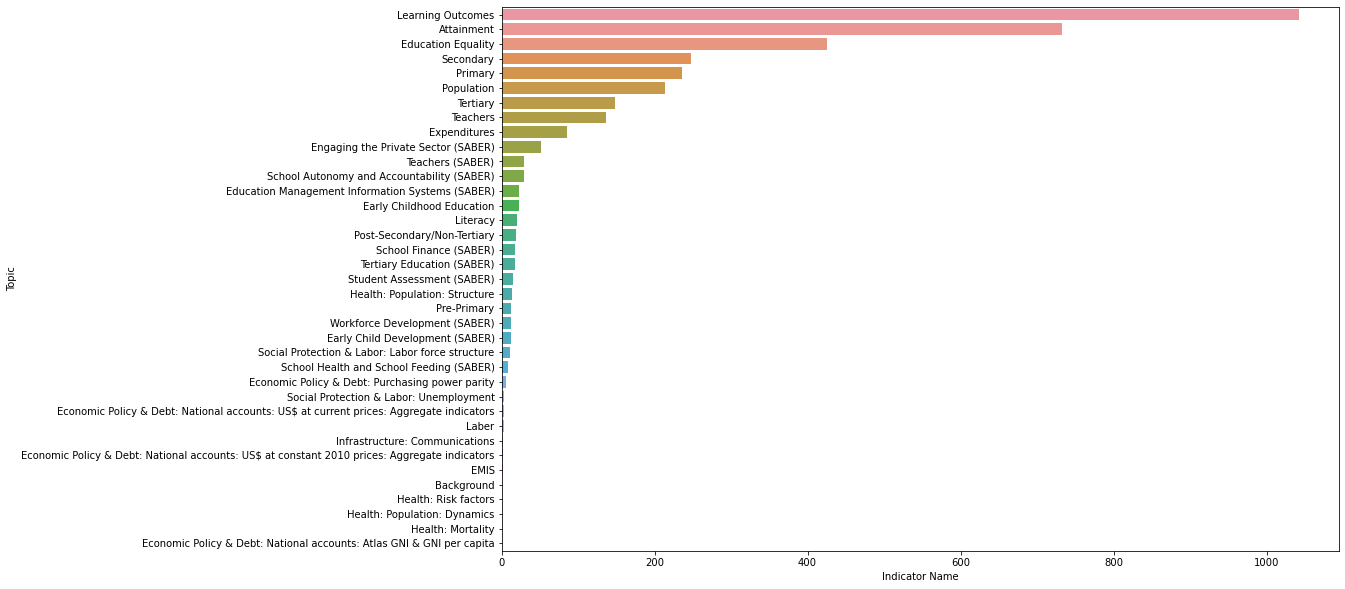

In [68]:

###
# Nombre d'indicateurs par thème

graph_distribInfo_ind = plt.subplots(figsize=(15,10))

Num_ind_par_topic = sns.barplot(data=indicPERtopic, x="Indicator Name", y="Topic")
ax.set_title("Nombre d'indicateurs par thème") 

plt.show()


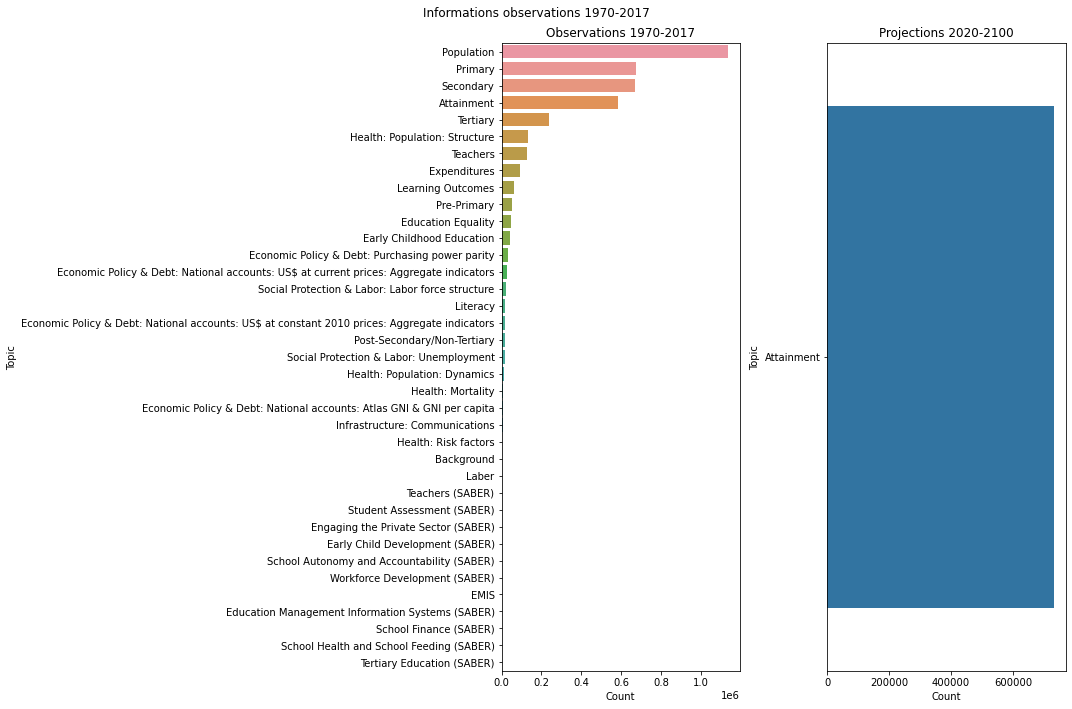

In [69]:


graph_distribInfo_ind, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
plt.suptitle("Informations observations 1970-2017")

# Data

dataTopic1970_2017 = df_complet_observations.groupby("Topic").count()
dataTopic1970_2017 = dataTopic1970_2017.loc[:,"1970":"2017"].reset_index()
dataTopic1970_2017["Count"] = dataTopic1970_2017.loc[:,"1970":"2017"].sum(axis=1)
dataTopic1970_2017 = dataTopic1970_2017.sort_values(by=["Count"], ascending=False)


dataTopic2020_2100 = df_complet_projections.groupby("Topic").count()
dataTopic2020_2100 = dataTopic2020_2100.loc[:,"2020":"2100"].reset_index()
dataTopic2020_2100["Count"] = dataTopic2020_2100.loc[:,"2020":"2100"].sum(axis=1)
dataTopic2020_2100 = dataTopic2020_2100.sort_values(by=["Count"], ascending=False)

#Graph
Num_ind_par_topic = sns.barplot(ax = ax1, data=dataTopic1970_2017, x="Count", y="Topic")
ax1.set_title("Observations 1970-2017") 

Num_ind_par_topic = sns.barplot(ax = ax2,data=dataTopic2020_2100, x="Count", y="Topic")
ax2.set_title("Projections 2020-2100")

graph_distribInfo_ind.tight_layout()
plt.show()


## <span style='background:#507c9b'><span style='color:white'>Conclusions</span>


**L'ensemble des fichiers informent sur la valeur de 3665 indicateurs pour 216 pays entre 1970 et 2017. Des projections sont faites tous les 5 années pour l'intervalle 2020-2100.**
* Les **valeurs des pairs pays/indicateurs** sont renseignés dans le fichier **EdStatData**.
* Des **informations complementaires** sur les aspects géographiques, économiques et des dates de référence pour les différents **pays** sont renseignés dans le fichier **EdStatCountry**.
* Des **informations complementaires** sur les **indicateurs** sont renseignés dans le fichier **EdStatSeries**.
* Le fichier **EdStatCountrySeries** aporte des précisions sur la **source des données des couples Pays/Indicateur**.
* Le fichier **EdStatFootNote** détaille des **informations** sur les valeurs de **couples pays/indicateur pour certaines années**.<br>
<br>

Le **taux de remplissage** des colonnes annuelles est **variable**.<br>

Il n'y a **pas de biais significatif** dans la **quantité de données** disponibles par pays en fonction de la **région géographique** à laquelle il appartient.<br>

Il n'y a **pas de biais significatif** dans la **quantité de données** disponibles par pays selon le **groupe de revenu** auquel il appartient.<br>

**L'homogénéisation du nom** des **colonnes** contenant des **informations apparantées** facilite l'intégration des informations.<br>

L'**intégration** des colonnes rapportant la **région géographique et le groupe de revenu** (EdStatCountry) des pays et celles rapportant le **domaine des indicateurs** (EdStatSeries) avec le fichier contenant les valeurs des **couples pays/indicateur** (EdStatData) permet de créer un fichier avec les informations nécessaires pour poursuivre l'étude (**df_complet**).

---
---

Pour l'**analyse des pays avec le plus de potentiel actuel**, dans un premier temps, nous nous concentrerons exclusivement sur les **données les plus récentes de l'intervalle 1970-2017 pour chaque pair pays/indicateur**.





In [70]:

#---------------------------------------------
# Suppresion des lignes sans aucune donnée 
#---------------------------------------------

#Tableau avec les indicateurs pour les quels on n'a aucune donnée
df_complet_Count0 = df_complet[df_complet['Count Data'] ==0]

#supprimer les lignes 
df_complet = df_complet[df_complet['Count Data']  !=0]
df_complet = df_complet.reset_index(drop=True)


### <span style='background:#8cafcc'> Observations: Création des colonnes "Most Recent Data" et "Date fo most recent data"</span>

In [71]:

#-------------------------------------------------------------------------------------------
#Création d'une colonne avec la valeur la plus recente pour chaque indicateur à chaque pays
#-------------------------------------------------------------------------------------------

#création d'une colonne avec la valeur not nulle la plus recente (ffill = forward fill)
df_complet_observations['Most Recent data'] = df_complet_observations.loc[:, "1970":"2017"].ffill(axis=1).iloc[:,-1] 

#deplacer la colonne 'Most Recent data' (evite problème pour chercher le nom de l'année avec la valeur la plus recente)
to_move = df_complet_observations.pop('Most Recent data')
df_complet_observations.insert(4, 'Most Recent data', to_move)


In [72]:

#----------------------------------------------------------------
#Création d'une colonne avec l'année de la valeur la plus recente
#----------------------------------------------------------------

#Remplacer les valeurs non nules des colonnes 1970-2017 par le nom des colonnes
df_FillYears = df_complet_observations.loc[:, "1970":"2017"]

df_FillYears[:] = np.where(df_FillYears.notnull(), df_FillYears.columns, df_FillYears) #[:] permets de preserver la strcuture (index et nom de colonnes)

# np.where(condition, X, Y)
          # si condition = true
          # replace with X (column labels)
          # otherwise Y (keep df values)


#création d'une colonne avec la valeur not nulle la plus recente (ffill = forward fill)
df_complet_observations['Date of most recent data'] = df_FillYears.loc[:, "1970":"2017"].ffill(axis=1).iloc[:,-1].apply(pd.to_numeric) 

#deplacer la colonne 'Most Recent data' (evite problème pour chercher le nom de l'année avec la valeur la plus recente)
to_move = df_complet_observations.pop('Date of most recent data')
df_complet_observations.insert(5, 'Date of most recent data', to_move)

#print(df_complet.shape)
df_complet_observations.head(2)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   
1   Adjusted net enrolment rate, primary, female (%)  SE.PRM.TENR.FE   

   Most Recent data  Date of most recent data  Group of countries       1970  \
0         85.320152                      2014                True  54.822121   
1         83.820831                      2014                True  43.351101   

        1971       1972  ...  IMF data dissemination standard  \
0  54.894138  56.209438  ...                              NaN   
1  43.318150  44.640701  ...                              NaN   

   Latest population census  Latest household survey  \
0                       NaN                      NaN   
1                       NaN                      NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1                                                NaN   

   Vital registration complete  Latest agricultural census  \
0                          NaN                         NaN   
1                          NaN                         NaN   

   Latest industrial data  Latest trade data  Latest water withdrawal data  \
0                     NaN                NaN                           NaN   
1                     NaN                NaN                           NaN   

     Topic  
0  Primary  
1  Primary  

[2 rows x 87 columns]

In [73]:

#-----------------------------------------------------------------------------------------------------------
# Isoler information concernant les pays (non des groupements)
#-----------------------------------------------------------------------------------------------------------

df_countries_obs = df_complet_observations.copy()

# supprime les informations provenant des groupements de pays
df_countries_obs = df_countries_obs.loc[(df_countries_obs['Group of countries'] == False)]

# supprime la colonne "Group of countries"
df_countries_obs = df_countries_obs.drop(columns = 'Group of countries')

#df_countries_obs.head(2)

In [74]:


#-----------------------------------------------------
# Isoler information concernant les données mesurées
#-----------------------------------------------------
df_countries_obs.columns.to_list()
col_drop = ['Short Name', 'Country Name_y', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'Income Group', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'Topic']
df_countries_obs = df_countries_obs.drop(columns = col_drop)
#df_countries_obs.head(2)


In [75]:

#-----------------------------------------------------------------------------------------------------------
# Isoler les "Most recent data" en fonction des années, tous les pays et indicateurs considérés
#-----------------------------------------------------------------------------------------------------------
df_MostRecent_countries = df_countries_obs.loc[:, "Country Name":"Date of most recent data"]
#df_MostRecent_countries.head(2)


In [76]:

#Création d'un tableau avec le nombre d'indicateurs avec la donée la plus recente par année 
#et el cumul d'information en remontant le temps

NperYear = df_MostRecent_countries['Date of most recent data'].value_counts()
Date = NperYear.index # NperYear est une serie, l'index de NperYear contient les années

InfoAge = pd.DataFrame(Date, columns = ['Date of most recent data']) # création du tableau à partir des années
InfoAge["n"] = NperYear.values # 'n' = nombre d'indicateurs avec la donnée la plus recente à l'année precisée
InfoAge["Percentage"] = 100 * InfoAge["n"] / len(df_MostRecent_countries) # len(df) renvoie la taille de l'échantillon

InfoAge = InfoAge.sort_values('Date of most recent data',ascending=False).reset_index(drop=True) # tri des valeurs de la variable X (décroisant)
InfoAge["Cumul Percentage"] = (InfoAge["Percentage"].cumsum()) # cumsum calcule la somme cumulée

InfoAge.head(3)

Date of most recent data       n  Percentage  Cumul Percentage
0                      2017     143    0.041703          0.041703
1                      2016   15650    4.564053          4.605756
2                      2015  110897   32.341199         36.946955

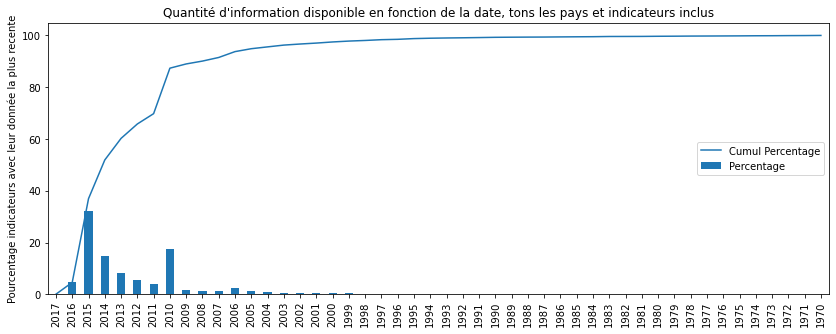

In [77]:

#--------------------------
#Visualisation des données
#--------------------------

cumulInfo = plt.subplots(figsize=(14,5))

width = 0.5

cumulInfo_cumul = InfoAge['Cumul Percentage'].plot()
cumulInfo_percent = InfoAge['Percentage'].plot(kind='bar', width = width)


ax = plt.gca()
plt.xlim([-width, len(InfoAge['Percentage'])-width])
ax.set_xticklabels(InfoAge['Date of most recent data'].tolist())

#plt.xticks(rotation = 45)
ax.set_ylabel('Pourcentage indicateurs avec leur donnée la plus recente')                          
ax.set_title("Quantité d'information disponible en fonction de la date, tons les pays et indicateurs inclus")


ax.legend(loc='center right')
plt.tight_layout

plt.show()


### <span style='background:#8cafcc'>Projections</span>

In [78]:

# df_complet_projections description
description_df_complet_projections = compl_info(df_complet_projections).append(df_complet_projections.describe(include='all'))
#description_df_complet_projections


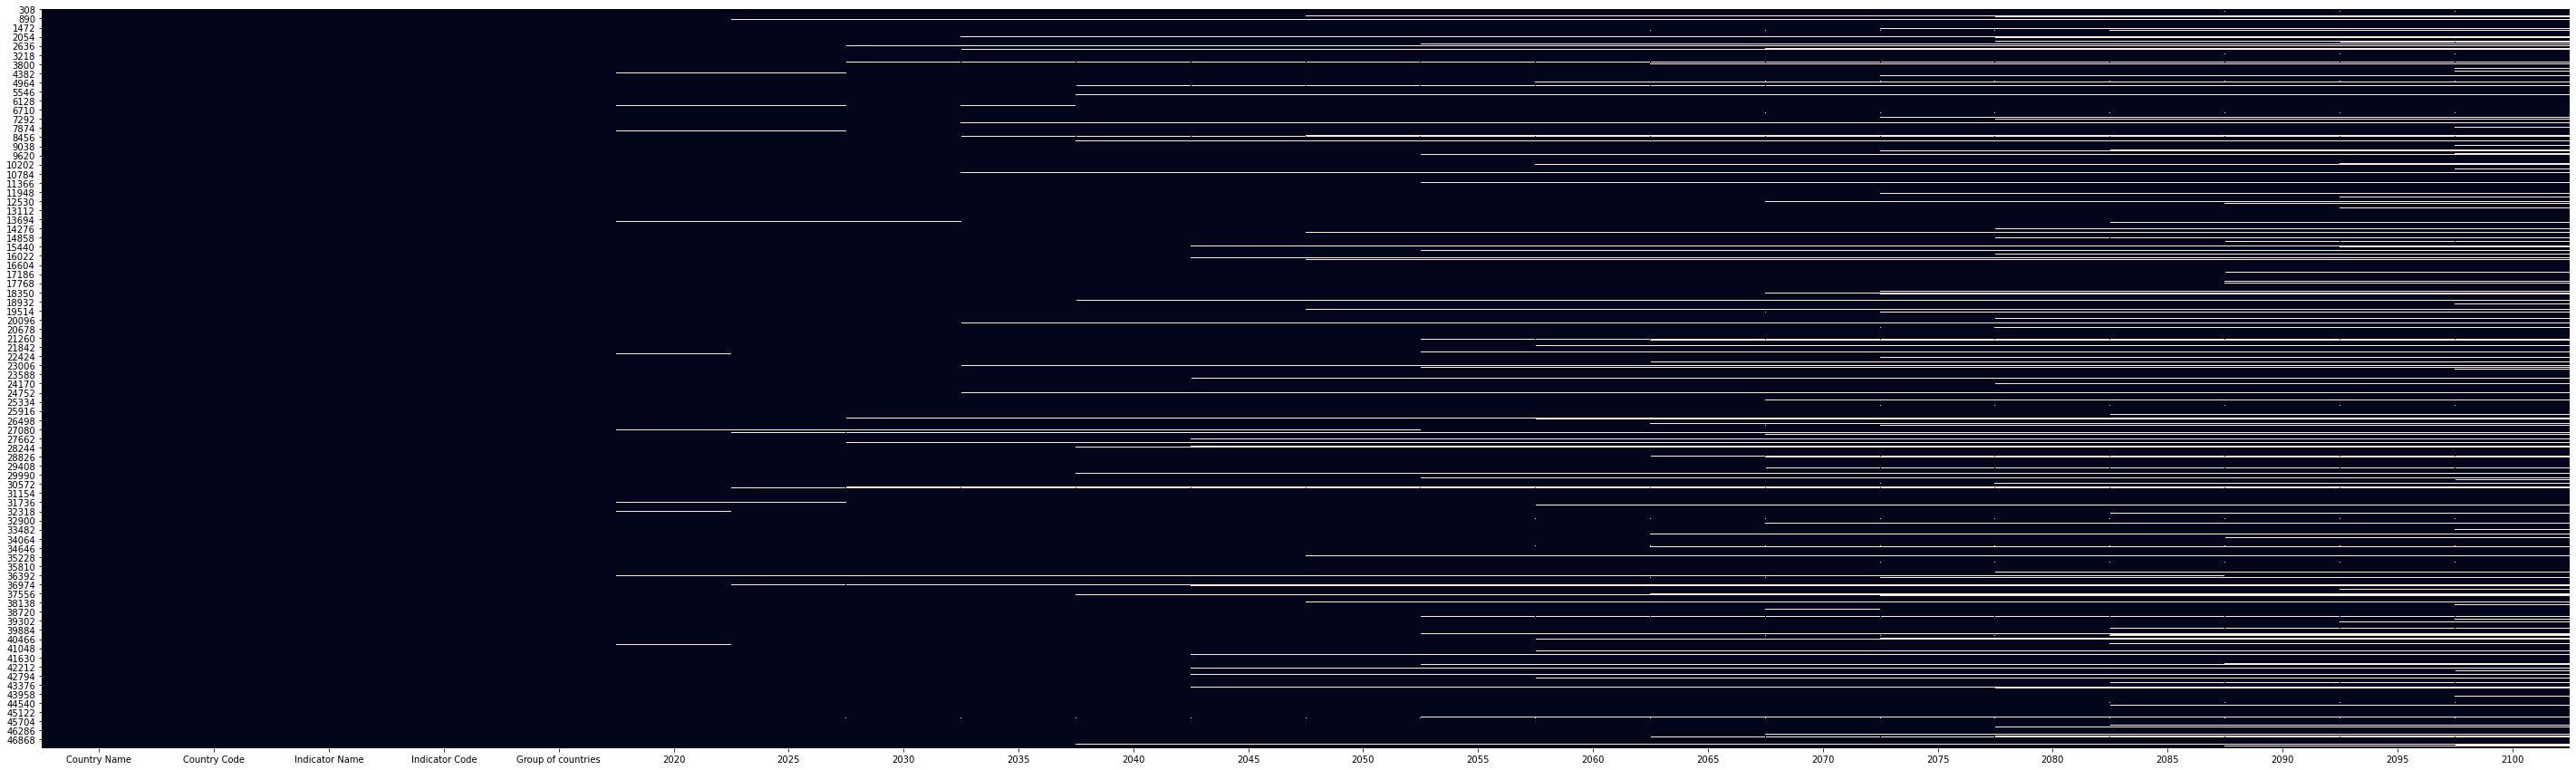

In [79]:

#-----------------------------------------------------------------------------------------------------------
# Isoler information concernant les pays (non des groupements)
#-----------------------------------------------------------------------------------------------------------
df_countries_projections = df_complet_projections.copy()

# supprime les informations provenant des groupements de pays
df_countries_projections = df_countries_projections.loc[(df_countries_projections['Group of countries'] == False)]

# Valeurs manquantes 2020-2100
plt.figure(figsize=(50,15))
sns.heatmap(df_countries_projections.loc[:, "Country Name":"2100"].isnull(), cbar=False, cmap="rocket")
plt.show()

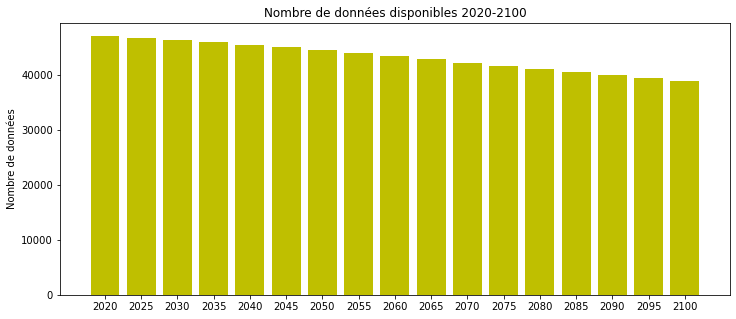

In [80]:
test=df_complet_projections.loc[:,"2020":"2100"].T.reset_index()
test['Number data'] = test.notna().sum(axis=1).astype(float)
test.rename(columns={test.columns[0]: 'Year'},inplace=True)

dataYear_projet, ax = plt.subplots(figsize=(12,5))

dataYear_projet_graph = plt.bar(test['Year'], test['Number data'], color = 'y', label="Number of countries having informed")

ax.set_ylabel('Nombre de données')                          
ax.set_title("Nombre de données disponibles 2020-2100")

plt.show()

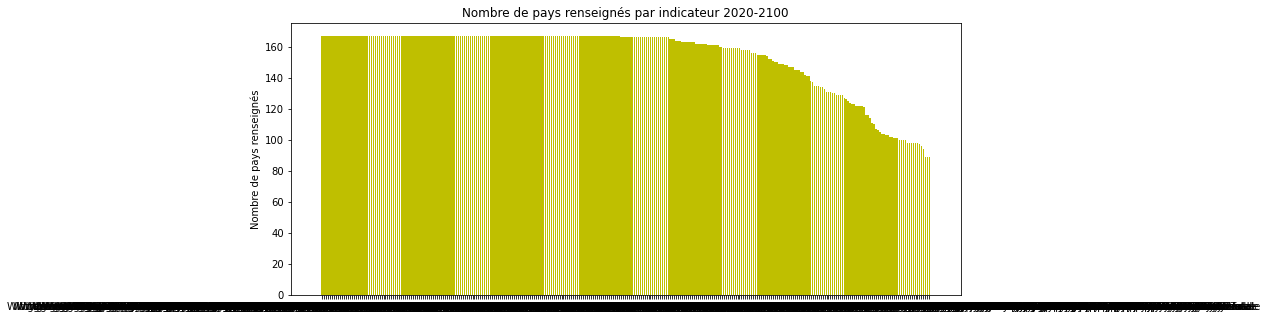

In [81]:
numCountry_ind2020_2100 = df_complet_projections["Indicator Name"].value_counts().to_frame().reset_index()

numCountry_ind2020_2100g, ax = plt.subplots(figsize=(12,5))

numCountry_ind2020_2100gr = plt.bar(numCountry_ind2020_2100['index'], numCountry_ind2020_2100['Indicator Name'], color = 'y', label="Number of countries having informed")

ax.set_ylabel('Nombre de pays renseignés')                          
ax.set_title("Nombre de pays renseignés par indicateur 2020-2100")

plt.show()

---
---
---

# <span style='background:#004c6d'><span style='color:white'> **Données 1970-2017**</span>


La quantité d'informations disponibles dépend du nombre de pays renseignant les différents indicateurs et du nombre d'indicateurs renseignés par pays. Pour mieux comprendre les données disponibles on va s'intéresser à ces deux composantes.

## <span style='background:#507c9b'><span style='color:white'>Analyse par indicateur</span>


On cherche à comprendre le nombre de données utiles par année en fonction des indicateurs (nombre d'indicateurs ayant leur dernière donnée une année précise).<br>
Pour ceci on construit un [Tableau avec les données les plus recentes par indicateur, par année et cumulé entre 1970 et 2107](#Tableau_MostRecent_ind_anne_cumul_1970_2017)


In [82]:

#--------------------------------------------------------------------------------------------------------------------------
#Création d'un tableau avec le nombre de données disponibles par année et el cumul d'information en remontant le temps
#--------------------------------------------------------------------------------------------------------------------------

#Etape1: par indicateur, nombre de "Most recent data" par année
DataperYearInd = df_MostRecent_countries.copy()
DataperYearInd['Number of countries'] = 1
DataperYearInd = DataperYearInd.groupby(["Indicator Name", "Indicator Code", 'Date of most recent data'])['Number of countries'].sum().to_frame()

#Etape2: Calcul du % de pays (sur le total dans le dataset) avec le "Most recent data" d'un indicateur la même année
DataperYearInd['Percent Countries'] = DataperYearInd['Number of countries'] *100/len(nomPaysList)

#Etape 3: Creation de deux nouvelles colonnes pour le calcul des cumulés
DataperYearInd['Cumul Num Countries'] = DataperYearInd['Number of countries']
DataperYearInd['Cumul Percent Countries'] = DataperYearInd['Percent Countries']

#Etape 4: Le cumsum() du df s'applique à toutes les colonnes, créer un duplicata du df pour mixer après les colonnes
DataperYearInd2 = DataperYearInd[::-1].groupby(level=0).cumsum() #[::-1] (all rows, all columns, from tail to head)

#Réunir les colonnes des comptages et cumulés dans un tableau
DataperYearInd['Cumul Num Countries'] = DataperYearInd2['Cumul Num Countries']
DataperYearInd['Cumul Percent Countries'] = DataperYearInd2['Percent Countries']


<a id='Tableau_MostRecent_ind_anne_cumul_1970_2017'></a>

---
---

<span style='background:#c9e6ff'>**Tableau avec les données les plus recentes par indicateur, par année et cumulé entre 1970 et 2107**</span>

---

In [83]:

#Le .groupby de la première étape à crée un df multiindex (ce qui était pratique pour le .cumsum() par indicateur)
#Pour passer toutes les information du multiindex en colonnes il faut appliquer reset_index()
DataperYearInd.reset_index(inplace=True)
DataperYearInd

Indicator Name  \
0      Adjusted net enrolment rate, lower secondary, ...   
1      Adjusted net enrolment rate, lower secondary, ...   
2      Adjusted net enrolment rate, lower secondary, ...   
3      Adjusted net enrolment rate, lower secondary, ...   
4      Adjusted net enrolment rate, lower secondary, ...   
...                                                  ...   
27087  Youth literacy rate, population 15-24 years, m...   
27088  Youth literacy rate, population 15-24 years, m...   
27089  Youth literacy rate, population 15-24 years, m...   
27090  Youth literacy rate, population 15-24 years, m...   
27091  Youth literacy rate, population 15-24 years, m...   

             Indicator Code  Date of most recent data  Number of countries  \
0                UIS.NERA.2                      1976                    2   
1                UIS.NERA.2                      1983                    1   
2                UIS.NERA.2                      1985                    1   
3                UIS.NERA.2                      1994                    2   
4                UIS.NERA.2                      1997                    1   
...                     ...                       ...                  ...   
27087  SE.ADT.1524.LT.MA.ZS                      2012                   16   
27088  SE.ADT.1524.LT.MA.ZS                      2013                    9   
27089  SE.ADT.1524.LT.MA.ZS                      2014                   18   
27090  SE.ADT.1524.LT.MA.ZS                      2015                   20   
27091  SE.ADT.1524.LT.MA.ZS                      2016                   17   

       Percent Countries  Cumul Num Countries  Cumul Percent Countries  
0               0.925926                  175                81.018519  
1               0.462963                  173                80.092593  
2               0.462963                  172                79.629630  
3               0.925926                  171                79.166667  
4               0.462963                  169                78.240741  
...                  ...                  ...                      ...  
27087           7.407407                   80                37.037037  
27088           4.166667                   64                29.629630  
27089           8.333333                   55                25.462963  
27090           9.259259                   37                17.129630  
27091           7.870370                   17                 7.870370  

[27092 rows x 7 columns]

---
---

<span style='background:#c9e6ff'>**Applications**</span>

---

In [84]:

#-----------------------------------------------------
# Indicateurs renseignant 100% des pays
#------------------------------------------------------

allcountries = DataperYearInd.loc[(DataperYearInd['Cumul Percent Countries'] == 100)].sort_values(by=["Date of most recent data"], ascending=False)
allcountries.head()



Empty DataFrame
Columns: [Indicator Name, Indicator Code, Date of most recent data, Number of countries, Percent Countries, Cumul Num Countries, Cumul Percent Countries]
Index: []

In [85]:

#--------------------------------------------------
#Acceder à l'information des indicateurs un par un 
#--------------------------------------------------

Ind1 = DataperYearInd.loc[(DataperYearInd['Indicator Code'] == 'IT.NET.USER.P2')]
Ind1


Indicator Name  Indicator Code  \
10068  Internet users (per 100 people)  IT.NET.USER.P2   
10069  Internet users (per 100 people)  IT.NET.USER.P2   
10070  Internet users (per 100 people)  IT.NET.USER.P2   
10071  Internet users (per 100 people)  IT.NET.USER.P2   

       Date of most recent data  Number of countries  Percent Countries  \
10068                      2004                    1           0.462963   
10069                      2011                    1           0.462963   
10070                      2015                    1           0.462963   
10071                      2016                  201          93.055556   

       Cumul Num Countries  Cumul Percent Countries  
10068                  204                94.444444  
10069                  203                93.981481  
10070                  202                93.518519  
10071                  201                93.055556

In [86]:

#-----------------------------------------------------------------------------
# Acceder aux indicateurs avec les plus hauts % de renseingement jusqu'en 2015
#-----------------------------------------------------------------------------

annee2015 = DataperYearInd.loc[(DataperYearInd['Date of most recent data'] >= 2015)].groupby(['Indicator Code','Indicator Name','Date of most recent data','Number of countries','Cumul Num Countries','Percent Countries'])['Cumul Percent Countries'].max().reset_index().sort_values(by=["Cumul Percent Countries"], ascending=False)
annee2015.head(15)


Indicator Code                                     Indicator Name  \
1540        SP.POP.TOTL                                  Population, total   
1539        SP.POP.GROW                       Population growth (annual %)   
1064        SE.PRM.AGES  Official entrance age to primary education (ye...   
1081        SE.PRM.DURS  Theoretical duration of primary education (years)   
1171     SE.SEC.DURS.UP  Theoretical duration of upper secondary educat...   
1167        SE.SEC.DURS  Theoretical duration of secondary education (y...   
2409        UIS.THDUR.0  Theoretical duration of pre-primary education ...   
1169     SE.SEC.DURS.LO  Theoretical duration of lower secondary educat...   
1159        SE.SEC.AGES  Official entrance age to lower secondary educa...   
2403        UIS.THAGE.0  Official entrance age to pre-primary education...   
2405  UIS.THAGE.3.A.GPV  Official entrance age to upper secondary educa...   
100      IT.NET.USER.P2                    Internet users (per 100 people)   
2404        UIS.THAGE.0  Official entrance age to pre-primary education...   
2406  UIS.THAGE.3.A.GPV  Official entrance age to upper secondary educa...   
101      IT.NET.USER.P2                    Internet users (per 100 people)   

      Date of most recent data  Number of countries  Cumul Num Countries  \
1540                      2016                  210                  210   
1539                      2016                  210                  210   
1064                      2015                   30                  207   
1081                      2015                   30                  207   
1171                      2015                   30                  204   
1167                      2015                   30                  204   
2409                      2015                   30                  204   
1169                      2015                   30                  204   
1159                      2015                   30                  204   
2403                      2015                    1                  203   
2405                      2015                    1                  203   
100                       2015                    1                  202   
2404                      2016                  202                  202   
2406                      2016                  202                  202   
101                       2016                  201                  201   

      Percent Countries  Cumul Percent Countries  
1540          97.222222                97.222222  
1539          97.222222                97.222222  
1064          13.888889                95.833333  
1081          13.888889                95.833333  
1171          13.888889                94.444444  
1167          13.888889                94.444444  
2409          13.888889                94.444444  
1169          13.888889                94.444444  
1159          13.888889                94.444444  
2403           0.462963                93.981481  
2405           0.462963                93.981481  
100            0.462963                93.518519  
2404          93.518519                93.518519  
2406          93.518519                93.518519  
101           93.055556                93.055556

In [87]:

#------------------------------------------------------------------------------------------------------------
# Identifier l'année jusqu'à laquelle il faut remonter pour trouver des indicateurs renseignant 95% des pays
#------------------------------------------------------------------------------------------------------------

DixIndic_95percentPays = DataperYearInd.loc[(DataperYearInd['Cumul Percent Countries'] >= 95)].groupby(['Indicator Code','Indicator Name'])['Date of most recent data'].max().to_frame()
DixIndic_95percentPays = DixIndic_95percentPays.sort_values(by=['Date of most recent data'], ascending=False).reset_index()
DixIndic_95percentPays.head(10)


Indicator Code                                     Indicator Name  \
0        SP.POP.TOTL                                  Population, total   
1        SP.POP.GROW                       Population growth (annual %)   
2        SE.PRM.AGES  Official entrance age to primary education (ye...   
3        SE.PRM.DURS  Theoretical duration of primary education (years)   
4     NY.GDP.MKTP.CD                 GDP at market prices (current US$)   
5     NY.GDP.PCAP.CD                       GDP per capita (current US$)   
6     SE.SEC.DURS.UP  Theoretical duration of upper secondary educat...   
7  UIS.THAGE.3.A.GPV  Official entrance age to upper secondary educa...   
8        UIS.THAGE.0  Official entrance age to pre-primary education...   
9        UIS.THDUR.0  Theoretical duration of pre-primary education ...   

   Date of most recent data  
0                      2016  
1                      2016  
2                      2015  
3                      2015  
4                      2007  
5                      2007  
6                      1999  
7                      1999  
8                      1999  
9                      1999

### <span style='background:#8cafcc'>Maximum de pays renseignés par indicateur. 1970-2017</span>

In [88]:

#----------------------------------------------------
# Nombre maximale de pays renseignés par indicateur
#----------------------------------------------------
cumulPercentMax = DataperYearInd.groupby(['Indicator Code','Indicator Name'])['Cumul Percent Countries'].max().reset_index()
cumulPercentMax


Indicator Code  \
0             BAR.NOED.1519.FE.ZS   
1                BAR.NOED.1519.ZS   
2             BAR.NOED.15UP.FE.ZS   
3                BAR.NOED.15UP.ZS   
4             BAR.NOED.2024.FE.ZS   
...                           ...   
3656    UIS.XUNIT.USCONST.3.FSGOV   
3657    UIS.XUNIT.USCONST.4.FSGOV   
3658   UIS.XUNIT.USCONST.56.FSGOV   
3659  XGDP.23.FSGOV.FDINSTADM.FFD   
3660  XGDP.56.FSGOV.FDINSTADM.FFD   

                                         Indicator Name  \
0     Barro-Lee: Percentage of female population age...   
1     Barro-Lee: Percentage of population age 15-19 ...   
2     Barro-Lee: Percentage of female population age...   
3     Barro-Lee: Percentage of population age 15+ wi...   
4     Barro-Lee: Percentage of female population age...   
...                                                 ...   
3656  Government expenditure per upper secondary stu...   
3657  Government expenditure per post-secondary non-...   
3658  Government expenditure per tertiary student (c...   
3659  Government expenditure in secondary institutio...   
3660  Government expenditure in tertiary institution...   

      Cumul Percent Countries  
0                   66.666667  
1                   66.666667  
2                   66.666667  
3                   66.666667  
4                   66.666667  
...                       ...  
3656                58.796296  
3657                38.425926  
3658                68.055556  
3659                76.851852  
3660                75.925926  

[3661 rows x 3 columns]

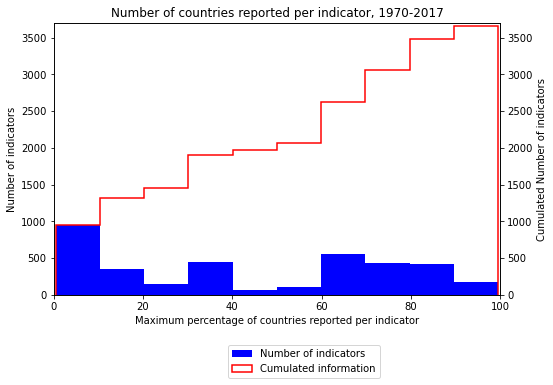

In [89]:

# Graph 1970-2017

ind_percentcountrMax, axInd = plt.subplots(figsize=(8,5))

width = 10

axIndC = axInd.twinx()

ind_percentcountrMax_line = axIndC.hist(cumulPercentMax['Cumul Percent Countries'], 10, histtype='step', cumulative = True, color = 'r',linewidth=1.5, label = 'Cumulated information')
ind_percentcountrMax_bar = axInd.hist(cumulPercentMax['Cumul Percent Countries'], 10, color = 'b', label ='Number of indicators')

axInd.set_xlim(0,100)
axInd.set_ylim(0,3700)
axInd.set_xlabel('Maximum percentage of countries reported per indicator')                            
axInd.set_ylabel('Number of indicators')
axIndC.set_ylim(0,3700)
axIndC.set_ylabel('Cumulated Number of indicators')
axInd.set_title("Number of countries reported per indicator, 1970-2017")

ind_percentcountrMax.legend(bbox_to_anchor=(0.7, -0))
plt.tight_layout

plt.show()


### <span style='background:#8cafcc'>Maximum de pays renseignés par indicateur. 2010-2017</span>

In [90]:

#Réduction du tableau aux données de 2010 et plus récents
cumulPercentMax_2010 = DataperYearInd.loc[(DataperYearInd['Date of most recent data'] >= 2010)].groupby(['Indicator Code','Indicator Name'])['Cumul Percent Countries'].max().reset_index()


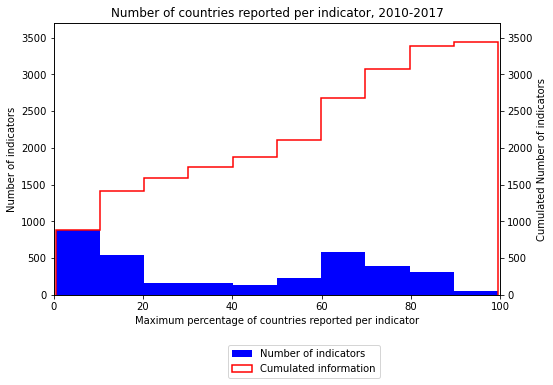

In [91]:

# Graph 2010-2017

ind_percentcountrMax2010, axInd = plt.subplots(figsize=(8,5))

width = 10

axIndC = axInd.twinx()

ind_percentcountrMax2010_line = axIndC.hist(cumulPercentMax_2010['Cumul Percent Countries'], 10, histtype='step', cumulative = True, color = 'r',linewidth=1.5, label = 'Cumulated information')
ind_percentcountrMax2010_bar = axInd.hist(cumulPercentMax_2010['Cumul Percent Countries'], 10, color = 'b', label ='Number of indicators')

axInd.set_xlim(0,100)
axInd.set_ylim(0,3700)
axInd.set_xlabel('Maximum percentage of countries reported per indicator')                            
axInd.set_ylabel('Number of indicators')
axIndC.set_ylim(0,3700)
axIndC.set_ylabel('Cumulated Number of indicators')
axInd.set_title("Number of countries reported per indicator, 2010-2017")

ind_percentcountrMax2010.legend(bbox_to_anchor=(0.7, -0))
plt.tight_layout

plt.show()


In [92]:


# Quels sont les indicateurs renseignés par moins d'un 10% des pays depuis 2010

renseig_inf10 = DataperYearInd.loc[(DataperYearInd['Date of most recent data'] >= 2010) & (DataperYearInd["Cumul Percent Countries"] <= 10)]
list_indic_renseig_inf10 = renseig_inf10['Indicator Name'].unique().tolist()
len(list_indic_renseig_inf10)



2205

## <span style='background:#507c9b'><span style='color:white'>Analyse par pays</span>


On cherche à comprendre le nombre de données utiles par année liées aux pays : nombre de "Most recent data" par pays une année précise et le long de l'intervalle 1970-2017).<br>

Pour ceci on construit un [Tableau avec, par pays, le nombre de données les plus recentes par anné et cumulé entre 1970 et 2107](#Tableau_pays_num_MostRecent_anne_cumul_1970_2017)


In [93]:

#Création d'une colonne pour faciliter le comptage de données
DataperYearCount = df_MostRecent_countries.copy()
DataperYearCount['Number of indicators'] = 1

DataperYearCount = DataperYearCount.groupby(["Country Name", 'Date of most recent data'])['Number of indicators'].count().reset_index()
#DataperYearCount

<a id='Tableau_pays_num_MostRecent_anne_cumul_1970_2017'></a>

---
---

<span style='background:#c9e6ff'>**Tableau avec, par pays, le nombre de données les plus recentes par anné et cumulé entre 1970 et 2107**</span>

---

In [94]:

DataperYearCount["f"] = DataperYearCount['Number of indicators'] / 3665 #Création d'une colonne avec la fequence relative, 3665 num total d'indicateurs dans le tableau

DataperYearCount['Percentage indicators'] = DataperYearCount['f'].copy() #Création d'une novuelle colonne pour le calcul du cumulé

DataperYearCount_1 = DataperYearCount.groupby(["Country Name", 'Date of most recent data', "Number of indicators", "f"])['Percentage indicators'].sum().to_frame()

DataperYearCount = DataperYearCount_1[::-1].groupby(level=0).cumsum()*100 #Calcul du pourcentaje cumulé

DataperYearCount = DataperYearCount.reset_index()
DataperYearCount


Country Name  Date of most recent data  Number of indicators         f  \
0        Zimbabwe                      2016                    73  0.019918   
1        Zimbabwe                      2015                   604  0.164802   
2        Zimbabwe                      2014                   135  0.036835   
3        Zimbabwe                      2013                   409  0.111596   
4        Zimbabwe                      2012                   170  0.046385   
...           ...                       ...                   ...       ...   
3327  Afghanistan                      1985                     3  0.000819   
3328  Afghanistan                      1984                     6  0.001637   
3329  Afghanistan                      1981                     6  0.001637   
3330  Afghanistan                      1979                    17  0.004638   
3331  Afghanistan                      1975                     3  0.000819   

      Percentage indicators  
0                  1.991814  
1                 18.472033  
2                 22.155525  
3                 33.315143  
4                 37.953615  
...                     ...  
3327              39.263302  
3328              39.427012  
3329              39.590723  
3330              40.054570  
3331              40.136426  

[3332 rows x 5 columns]

### <span style='background:#8cafcc'>Maximum d'indicateurs renseignés par pays. 1970-2017</span>

In [95]:

# Pourcentage maximale d'indicateurs renseignés par pays
country_cumulPercentMax = DataperYearCount.groupby(['Country Name'])['Percentage indicators'].max().reset_index()
#country_cumulPercentMax


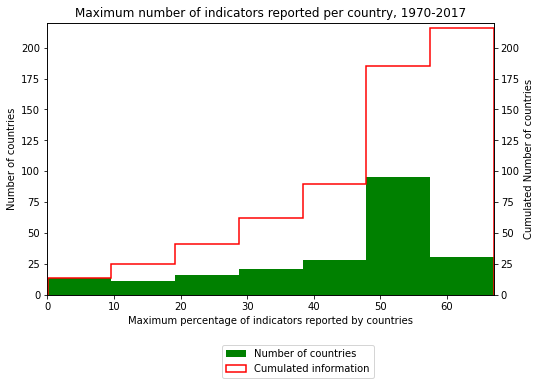

In [96]:

# Graph, 1970-2017

countr_percentIndMax, axCount = plt.subplots(sharey =True, figsize=(8,5))

width = 10

axCount_C = axCount.twinx()

countr_percentIndMax_line = axCount_C.hist(country_cumulPercentMax['Percentage indicators'], 7, histtype='step', cumulative = True, color = 'r',linewidth=1.5, label = 'Cumulated information')
countr_percentIndMax_bar = axCount.hist(country_cumulPercentMax['Percentage indicators'], 7, color = 'g', label ='Number of countries')

axCount.set_xlim(0,country_cumulPercentMax['Percentage indicators'].max())
axCount.set_ylim(0,220)
axCount.set_xlabel('Maximum percentage of indicators reported by countries')                            
axCount.set_ylabel('Number of countries')
axCount_C.set_ylabel('Cumulated Number of countries')
axCount_C.set_ylim(0,220)
axCount_C.set_title("Maximum number of indicators reported per country, 1970-2017")


countr_percentIndMax.legend(bbox_to_anchor=(0.7, -0))
plt.tight_layout


plt.show()


### <span style='background:#8cafcc'>Maximum d'indicateurs renseignés par pays. 2010-2017</span>

In [97]:

country_cumulPercentMax2010 = DataperYearCount.loc[(DataperYearCount['Date of most recent data'] >= 2010)].groupby(['Country Name'])['Percentage indicators'].max().reset_index()

#country_cumulPercentMax2010


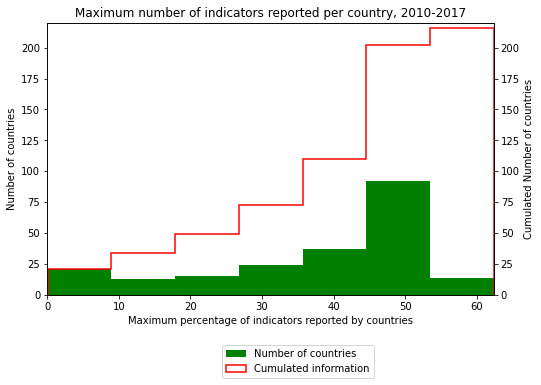

In [98]:

# Nombre de pays en fonction du % cumule maximale, 2010-2017

countr_percentIndMax2010, axCount1 = plt.subplots(figsize=(8,5))

width = 10

axCount1_C = axCount1.twinx()

countr_percentIndMax2010_line = axCount1_C.hist(country_cumulPercentMax2010['Percentage indicators'], 7, histtype='step', cumulative = True, color = 'r',linewidth=1.5, label = 'Cumulated information')
countr_percentIndMax2010_bar = axCount1.hist(country_cumulPercentMax2010['Percentage indicators'], 7, color = 'g', label ='Number of countries')

axCount1.set_xlim(0,country_cumulPercentMax2010['Percentage indicators'].max())
axCount1.set_ylim(0,220)
axCount1.set_xlabel('Maximum percentage of indicators reported by countries')                            
axCount1.set_ylabel('Number of countries')
axCount1_C.set_ylim(0,220)
axCount1_C.set_ylabel('Cumulated Number of countries')
axCount1_C.set_title("Maximum number of indicators reported per country, 2010-2017")


countr_percentIndMax2010.legend(bbox_to_anchor=(0.7, -0))
plt.tight_layout


plt.show()


In [99]:

# Pays ayant renseigné moins du 20% des indicateurs

Countr_renseig_inf20_2010 = country_cumulPercentMax2010.loc[(country_cumulPercentMax2010["Percentage indicators"] <= 20)]

list_Countr_renseig_inf20_2010 = Countr_renseig_inf20_2010['Country Name'].unique().tolist()
list_Countr_renseig_inf20_2010
len(list_Countr_renseig_inf20_2010)


37


# <span style='background:#004c6d'><span style='color:white'>**Selection indicateurs**</span>

<br>

Compte tenu du public cible de "Academy"  pour **quantifier le nombre potentiel de clients** on s'interessera à
 
 - l'accès à internet.
 - population niveau lycée (15-18 ans) et université, aujourd'hui, dans 5 ans et dans 10 ans.
 - niveau economique

 ---



*La première sélection à été effectué en consultant le 'Metadata Glossary' de The World Bank pour choisir les indicateurs d'intérêt.* (https://databank.worldbank.org/metadataglossary/all/series)
<br>

Les mot clès utilisées et les indicateurs retenus pour l'étude de la pertinence des informations et du potentiel des pays sont:

|Mot clé       | Indicateurs sélectionés pour l'étude de la pertinence des informations et du potentiel des pays|
|:-------------|:-----------------------------------------------------------------------------------------------|
|Internet      |Internet users (per 100 people), IT.NET.USER.P2                                             |
|Secondary     |Secondary education, pupils, (SE.SEC.ENRL)                                                  |
|Tertiary      |Enrolment in tertiary education, all programmes, both sexes (number), SE.TER.ENRL          |
|GDP           |GNI per capita, PPP (current international dollar), NY.GNP.PCAP.PP.CD                      |

---
---

Une deuxième liste d'indicateurs est restenue pour réaliser des verifications
|Mot clé       | Indicateur sélectionés pour vérification                                                  |
|:-------------|:------------------------------------------------------------------------------------------|
|Population    |Population, total, SP.POP.TOTL|
|Population    |Population of the official age for secondary education, both sexes (number), SP.SEC.TOTL.IN|
|Population    |Population of the official age for tertiary education, both sexes (number), SP.TER.TOTL.IN |
|Tertiary      |School enrollment, tertiary (% gross), SE.TER.ENRR          |



In [100]:

#Création d'une liste avec tous les indicateurs sélecitonnées
selec_metadata = ["IT.NET.USER.P2", "SE.SEC.ENRL",'SE.TER.ENRL',"NY.GNP.PCAP.PP.CD"]

# Description des indicateurs sélecitonnées
pd.set_option('max_colwidth', None)
df_EdStatsSeries[df_EdStatsSeries['Indicator Code'].isin(selec_metadata)][['Indicator Code','Indicator Name','Topic','Long definition']]


Indicator Code  \
611      IT.NET.USER.P2   
1669  NY.GNP.PCAP.PP.CD   
2294        SE.SEC.ENRL   
2332        SE.TER.ENRL   

                                                            Indicator Name  \
611                                        Internet users (per 100 people)   
1669                         GNI per capita, PPP (current international $)   
2294                 Enrolment in secondary education, both sexes (number)   
2332  Enrolment in tertiary education, all programmes, both sexes (number)   

                                                Topic  \
611                    Infrastructure: Communications   
1669  Economic Policy & Debt: Purchasing power parity   
2294                                        Secondary   
2332                                         Tertiary   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Long definition  
611                                                                                                                                                                                                                                                                                                                                                                             Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.  
1669  GNI per capita based on purchasing power parity (PPP). PPP GNI is gross national income (GNI) converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GNI as a U.S. dollar has in the United States. GNI is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. Data are in current international dollars based on the 2011 ICP round.  
2294                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Total number of students enrolled at public and private secondary education institutions regardless of age.  
2332                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     The total number of students enrolled at public and private tertiary education institutions.


<span style='background:#e2e2e2'>*Note*</span>
 L'indicateur **NY.GNP.PCAP.PP.CD** correspond à la valeur du produit intérieur brut par habitant en parité de pouvoir d'achat (PPA).

In [101]:

#Création d'une liste les indicateurs pour vérification
indic_verif = ["SP.POP.TOTL","SP.SEC.TOTL.IN","SP.TER.TOTL.IN", "SE.TER.ENRR"]

# Description des indicateurs sélecitonnées
pd.set_option('max_colwidth', None)
df_EdStatsSeries[df_EdStatsSeries['Indicator Code'].isin(indic_verif)][['Indicator Code','Indicator Name','Topic','Long definition']]


Indicator Code  \
2335     SE.TER.ENRR   
2590     SP.POP.TOTL   
2608  SP.SEC.TOTL.IN   
2614  SP.TER.TOTL.IN   

                                                                   Indicator Name  \
2335                              Gross enrolment ratio, tertiary, both sexes (%)   
2590                                                            Population, total   
2608  Population of the official age for secondary education, both sexes (number)   
2614   Population of the official age for tertiary education, both sexes (number)   

                              Topic  \
2335                       Tertiary   
2590  Health: Population: Structure   
2608                     Population   
2614                     Population   

                                                                                                                                                                                         Long definition  
2335  Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving.  
2590                   Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates.  
2608                                                               Population of the age-group theoretically corresponding to secondary education as indicated by theoretical entrance age and duration.  
2614                                                                Population of the age-group theoretically corresponding to tertiary education as indicated by theoretical entrance age and duration.

In [102]:

#--------------------------------
#Liste avec tous les indicateurs
#--------------------------------
joinedInd = selec_metadata+indic_verif


<a id='Tableau_indicateurs_selec'></a>

---
---

<span style='background:#c9e6ff'>**Création tableau avec l'information sur les indicateurs sélectionnés**</span>

---

In [103]:

#Reduction du tableau contenant toutes les informations des indicateurs pour tous les pays (df_MostRecent_countries) 
#à un tableau ne concernant que les informations des indicateurs sélectionnés

DataperYearInd_selec = DataperYearInd.loc[(DataperYearInd['Indicator Code'].isin(selec_metadata))]
DataperYearInd_selec.head(2)

Indicator Name Indicator Code  \
7190  Enrolment in secondary education, both sexes (number)    SE.SEC.ENRL   
7191  Enrolment in secondary education, both sexes (number)    SE.SEC.ENRL   

      Date of most recent data  Number of countries  Percent Countries  \
7190                      1971                    1           0.462963   
7191                      1986                    1           0.462963   

      Cumul Num Countries  Cumul Percent Countries  
7190                  210                97.222222  
7191                  209                96.759259

## <span style='background:#507c9b'><span style='color:white'>Description par REGION</span>

<br>

---

**Analyse du taux de remplissage par indicateur et Region**

---


In [104]:

# Nombre de donées par indicateur et pays à partir de la colonne "Count Data" (nombre de données disponibles par ligne 1970-2017)
Ndata_ind = df_countries_obs.groupby(["Indicator Name", "Indicator Code", "Country Name", "Country Code", "Region"])["Count Data"].sum().reset_index()

# Reduction du tableau aux indicateurs sélectionés
Ndata_ind_selec = Ndata_ind.copy()
Ndata_ind_selec = Ndata_ind_selec.loc[(Ndata_ind_selec['Indicator Code'].isin(selec_metadata))]

# Nouvelle colonne avec le % d'années renseignes (sur le total, 47 (1970-2017))
Ndata_ind_selec["% years informed"] = Ndata_ind_selec["Count Data"] * (100 / 47)
Ndata_ind_selec = Ndata_ind_selec.sort_values('Region',ascending=False)

Ndata_ind_selec.head(3)


Indicator Name  \
120443                        Internet users (per 100 people)   
100617          GNI per capita, PPP (current international $)   
90242   Enrolment in secondary education, both sexes (number)   

           Indicator Code Country Name Country Code              Region  \
120443     IT.NET.USER.P2     Zimbabwe          ZWE  Sub-Saharan Africa   
100617  NY.GNP.PCAP.PP.CD       Angola          AGO  Sub-Saharan Africa   
90242         SE.SEC.ENRL   Mozambique          MOZ  Sub-Saharan Africa   

        Count Data  % years informed  
120443        23.0         48.936170  
100617        27.0         57.446809  
90242         35.0         74.468085

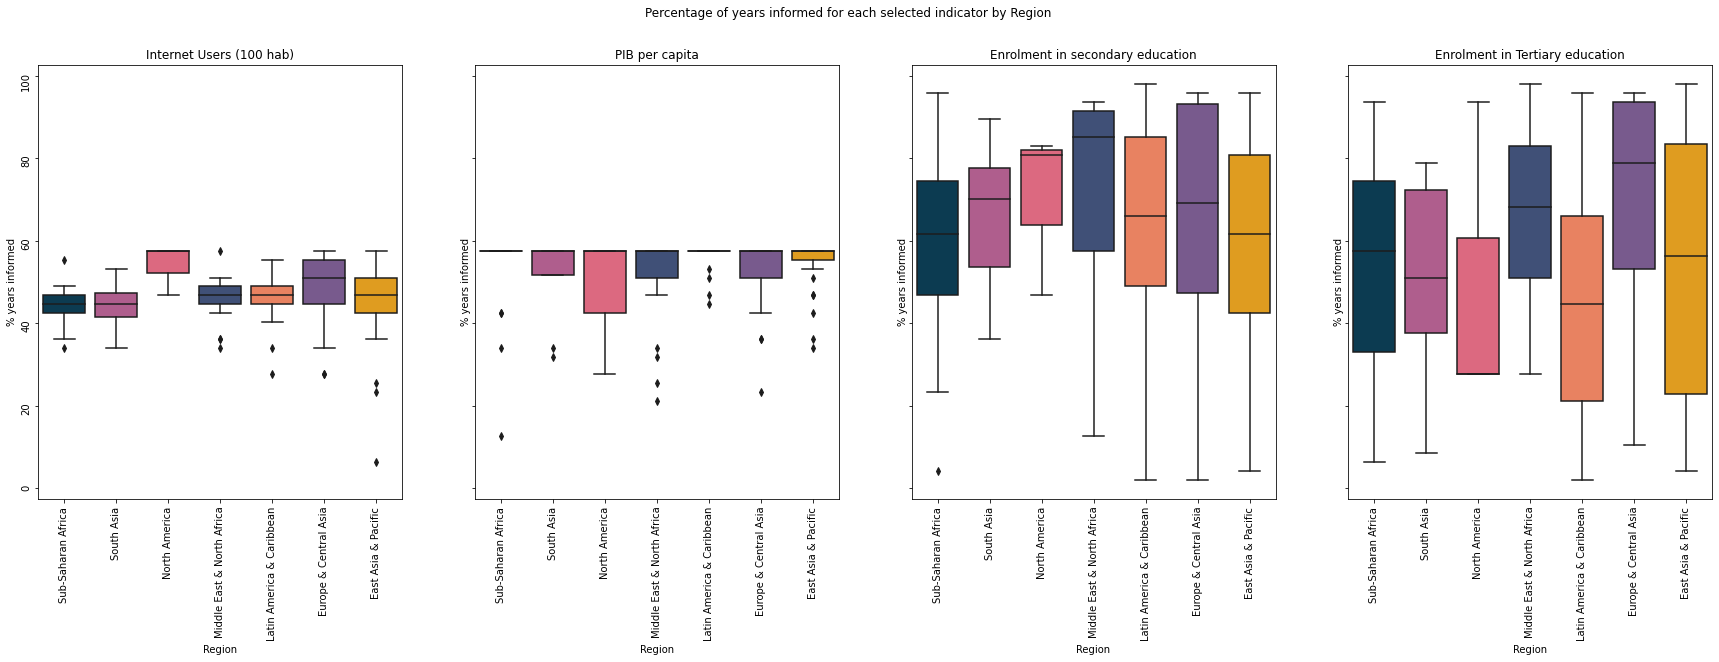

In [105]:

#-------------------------------------------------------------------------
# Boxplot par Région du taux de renseignement des indicateurs sélectionés
#-------------------------------------------------------------------------

indSelec_fillrate_Region, (ax1, ax2,ax3, ax4) = plt.subplots(1,4, sharex = True, sharey= True, figsize=(30,8))
indSelec_fillrate_Region.suptitle("Percentage of years informed for each selected indicator by Region")


# Data

Region_Ndata_ind_inter = Ndata_ind_selec.loc[Ndata_ind_selec['Indicator Code'] == "IT.NET.USER.P2"]
Region_Ndata_ind_PIB = Ndata_ind_selec.loc[Ndata_ind_selec['Indicator Code'] == "NY.GNP.PCAP.PP.CD"]

Region_Ndata_ind_sec = Ndata_ind_selec.loc[Ndata_ind_selec['Indicator Code'] == "SE.SEC.ENRL"]
Region_Ndata_ind_univ = Ndata_ind_selec.loc[Ndata_ind_selec['Indicator Code'] == "SE.TER.ENRL"]


#Graph

Region_Ndata_ind_fig1 = sns.boxplot(ax =ax1, data=Region_Ndata_ind_inter, x="Region", y="% years informed", palette =  colorsRegion)
ax1.set_title("Internet Users (100 hab)")
ax1.tick_params(labelrotation=90)

Region_Ndata_ind_fig2 = sns.boxplot(ax =ax2, data=Region_Ndata_ind_PIB, x="Region", y="% years informed", palette =  colorsRegion)
ax2.set_title("PIB per capita")
ax2.tick_params(labelrotation=90)


Region_Ndata_ind_fig3 = sns.boxplot(ax =ax3, data=Region_Ndata_ind_sec, x="Region", y="% years informed", palette =  colorsRegion)
ax3.set_title("Enrolment in secondary education")
ax3.tick_params(labelrotation=90)

Region_Ndata_ind_fig4 = sns.boxplot(ax =ax4, data=Region_Ndata_ind_univ, x="Region", y="% years informed", palette =  colorsRegion)
ax4.set_title("Enrolment in Tertiary education")
ax4.tick_params(labelrotation=90)

plt.show()



---

Description du fichier EdStatsData

---


* Pourquoi aucun paysne renseinge plus du 60% des années le PIB?<br>


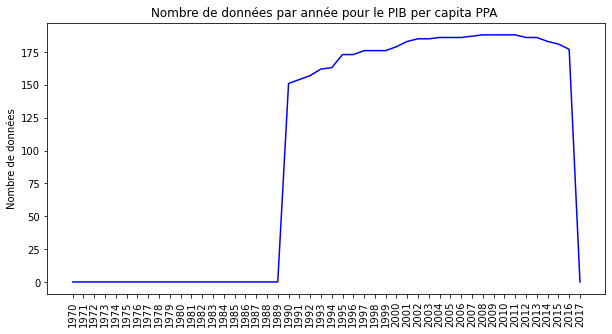

In [106]:

#---------------------------------------------
#Nombre données PIB per capita PPA par année
#---------------------------------------------
PIBppa = df_complet_observations.loc[(df_complet_observations["Indicator Code"] == "NY.GNP.PCAP.PP.CD") & (df_complet_observations["Group of countries"] == False)]
PIBppa = PIBppa.groupby("Indicator Code").count()
PIBppa =PIBppa.drop(columns = ['Country Name', 'Country Code', 'Indicator Name', 'Most Recent data','Date of most recent data', 'Group of countries', 'Short Name', 'Country Name_y', 'Long Name','2-alpha code', 'Currency Unit', 'Special Notes', 'Region','Income Group', 'WB-2 code', 'National accounts base year','National accounts reference year', 'SNA price valuation','Lending category', 'Other groups', 'System of National Accounts','Alternative conversion factor', 'PPP survey year','Balance of Payments Manual in use', 'External debt Reporting status','System of trade', 'Government Accounting concept','IMF data dissemination standard', 'Latest population census','Latest household survey','Source of most recent Income and expenditure data','Vital registration complete', 'Latest agricultural census','Latest industrial data', 'Latest trade data','Latest water withdrawal data', 'Topic', "Count Data"])
PIBppa =PIBppa.T


#-------
# Graph
#-------
PPInumData_graph, ax = plt.subplots(figsize=(10,5))

PPInumData_gr = plt.plot(PIBppa.index, PIBppa["NY.GNP.PCAP.PP.CD"], color = 'b')
ax.set_ylabel('Nombre de données')                          
ax.set_title("Nombre de données par année pour le PIB per capita PPA ")
plt.xticks(rotation = 90)
plt.tight_layout
plt.show()


<br>

---

**Analyse des "Most recent data" par indicateur et Region**

---


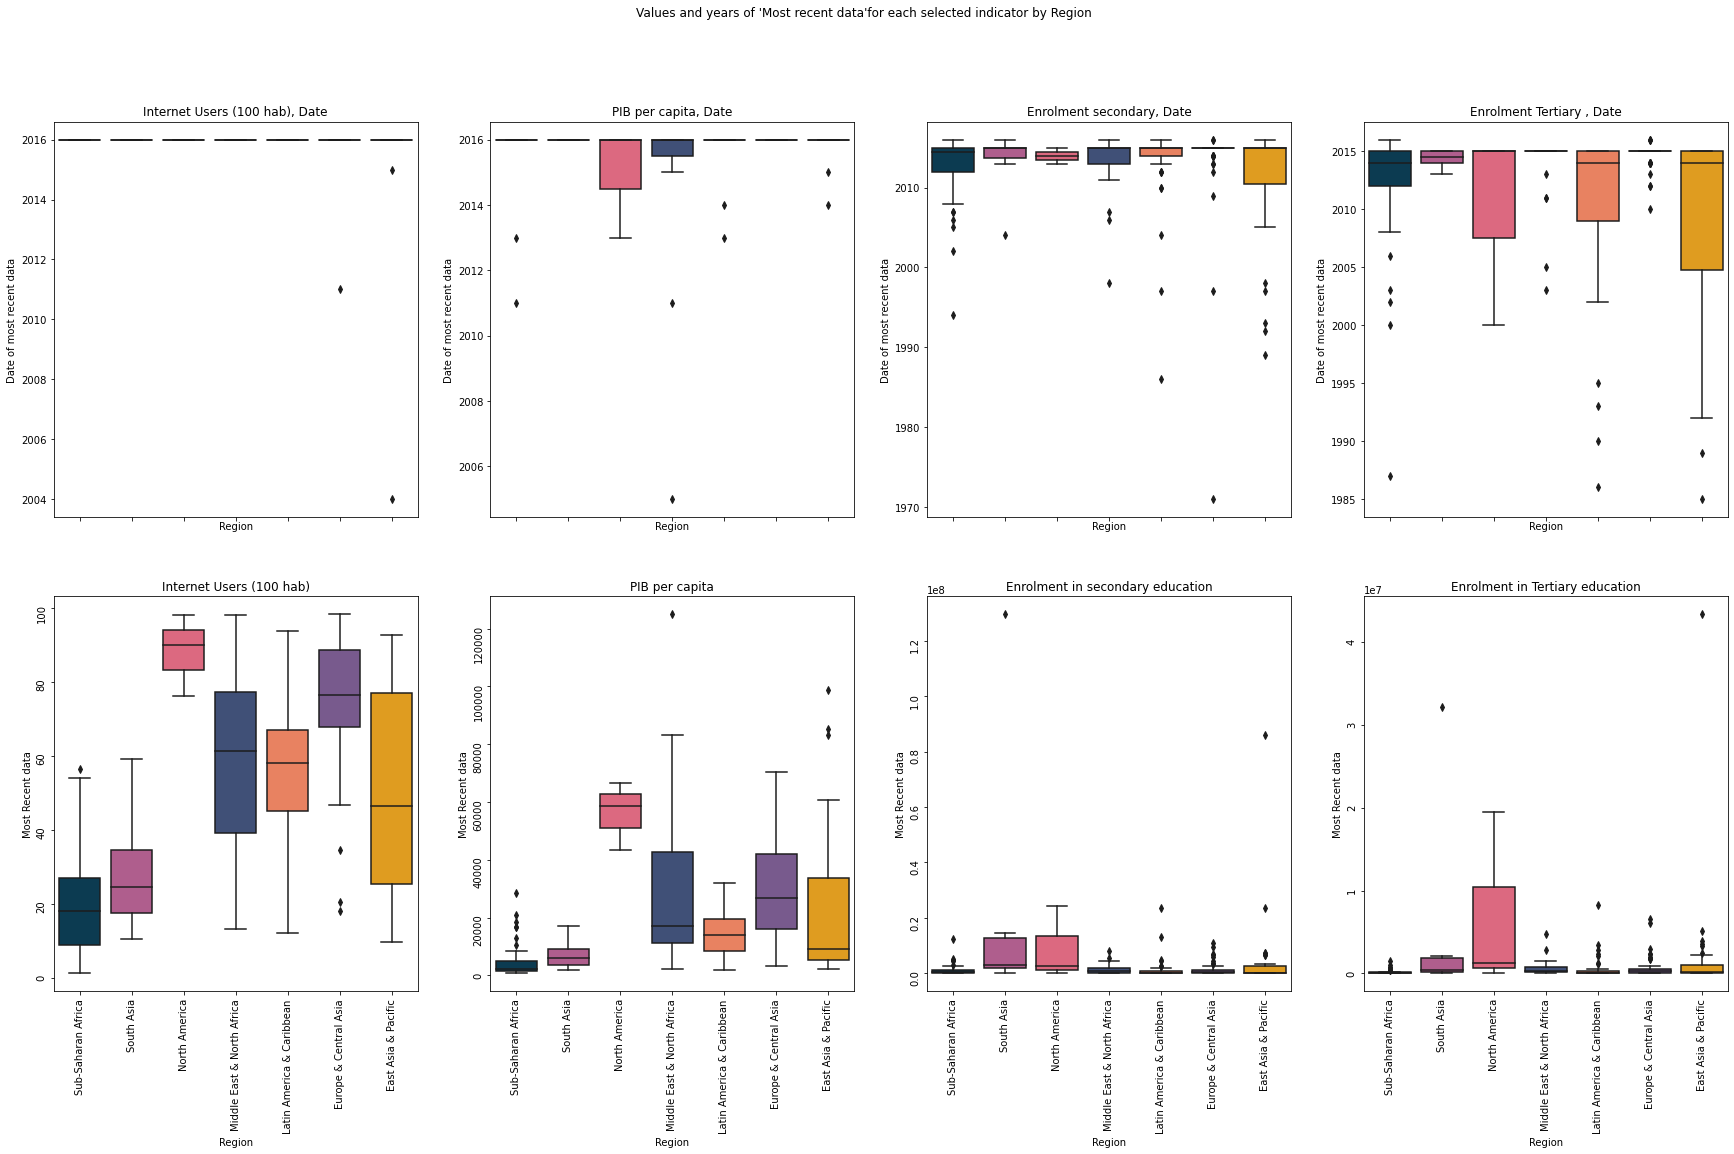

In [107]:

#-----------------------------------------------------------------------------------------
# Boxplot par Région des données les plus récentes et de leur date pour les indicateurs sélectionés
#------------------------------------------------------------------------------------------

indSelec_MostRecent_Region, axes = plt.subplots(2,4, sharex = True, figsize=(30,16))
indSelec_MostRecent_Region.suptitle("Values and years of 'Most recent data'for each selected indicator by Region")

# Data

Region_MostRec_ind_inter = df_countries_obs.loc[df_countries_obs['Indicator Code'] == "IT.NET.USER.P2"].sort_values('Region',ascending=False)
Region_MostRec_ind_PIB = df_countries_obs.loc[df_countries_obs['Indicator Code'] == "NY.GNP.PCAP.PP.CD"].sort_values('Region',ascending=False)

Region_MostRec_ind_sec = df_countries_obs.loc[df_countries_obs['Indicator Code'] == "SE.SEC.ENRL"].sort_values('Region',ascending=False)
Region_MostRec_ind_univ = df_countries_obs.loc[df_countries_obs['Indicator Code'] == "SE.TER.ENRL"].sort_values('Region',ascending=False)


#Graph

#Date
Region_MostRecD_ind_inter_fig = sns.boxplot(ax =axes[0,0], data=Region_MostRec_ind_inter, x="Region", y="Date of most recent data", palette =  colorsRegion)
axes[0,0].set_title("Internet Users (100 hab), Date")


Region_MostRecD_ind_PIB_fig = sns.boxplot(ax =axes[0,1], data=Region_MostRec_ind_PIB, x="Region", y="Date of most recent data", palette =  colorsRegion)
axes[0,1].set_title("PIB per capita, Date")


Region_MostRecD_ind_sec_fig = sns.boxplot(ax =axes[0,2], data=Region_MostRec_ind_sec, x="Region", y="Date of most recent data", palette =  colorsRegion)
axes[0,2].set_title("Enrolment secondary, Date")

Region_MostRecD_ind_univ_fig = sns.boxplot(ax =axes[0,3], data=Region_MostRec_ind_univ, x="Region", y="Date of most recent data", palette =  colorsRegion)
axes[0,3].set_title("Enrolment Tertiary , Date")

#Donnée
Region_MostRec_ind_inter_fig = sns.boxplot(ax =axes[1,0], data=Region_MostRec_ind_inter, x="Region", y="Most Recent data", palette =  colorsRegion)
axes[1,0].set_title("Internet Users (100 hab)")
axes[1,0].tick_params(labelrotation=90)


Region_MostRec_ind_PIB_fig = sns.boxplot(ax =axes[1,1], data=Region_MostRec_ind_PIB, x="Region", y="Most Recent data", palette =  colorsRegion)
axes[1,1].set_title("PIB per capita")
axes[1,1].tick_params(labelrotation=90)


Region_MostRec_ind_sec_fig = sns.boxplot(ax =axes[1,2], data=Region_MostRec_ind_sec, x="Region", y="Most Recent data", palette =  colorsRegion)
axes[1,2].set_title("Enrolment in secondary education")
axes[1,2].tick_params(labelrotation=90)

Region_MostRec_ind_univ_fig = sns.boxplot(ax =axes[1,3], data=Region_MostRec_ind_univ, x="Region", y="Most Recent data", palette =  colorsRegion)
axes[1,3].set_title("Enrolment in Tertiary education")
axes[1,3].tick_params(labelrotation=90)


plt.show()

<a id='outliers_boxplot'></a>

---
---

<span style='background:#c9e6ff'>**Indentification des outliers dans les boxplot**</span>

---


In [108]:

Regions = df_countries_obs.groupby('Region')['Country Name'] .unique()
#Regions # Regions.index = nom des régions; .values = liste avec les noms des pays


---

Taux remplissage

---

In [109]:

# Taux remplissage

data_Taux_remplissage = {"IT.NET.USER.P2":Region_Ndata_ind_inter, "NY.GNP.PCAP.PP.CD" :Region_Ndata_ind_PIB , "SE.SEC.ENRL": Region_Ndata_ind_sec, "SE.TER.ENRL":Region_Ndata_ind_univ}
country_outlier_taux = []
ind_outlier_taux = []

for data_name in data_Taux_remplissage:
    #print("\033[1m{} \033[0m".format(data_name))
    for region in Regions.index.tolist():       
        data_file = data_Taux_remplissage[data_name].loc[data_Taux_remplissage[data_name]['Region'] == region] # boxplot data considered
        q1 = np.quantile(data_file["% years informed"], 0.25) # finding the 1st quartile
        q3 = np.quantile(data_file["% years informed"], 0.75) # finding the 3rd quartile
        med = np.median(data_file["% years informed"])
            
        iqr = q3-q1 # finding the iqr region
        upper_bound = q3+(1.5*iqr) # finding upper and lower whiskers
        lower_bound = q1-(1.5*iqr)
        
            
        outliers = data_file["Country Name"].loc[(data_file["% years informed"] < lower_bound)].to_list()
        if len(outliers) ==0:
            pass
        else:
            country_outlier_taux.extend(outliers)
            outliers_ind = [data_name]*len(outliers)
            ind_outlier_taux.extend(outliers_ind)
            #print("\033[1m {} \033[0m".format(region))
            #print("   iqr = " +str(iqr), "lower_bound = "+str(lower_bound))
            #print("   the following are the outliers in the boxplot: {} \n".format(outliers))

# OUTLIERS Taux remplissage     
df_outliers_taux = pd.DataFrame({"Country Name":country_outlier_taux, "Indicator Code":ind_outlier_taux})
         

---

Date of most recent data

---

In [110]:

# Date of most recent data

data_Date_mostRecent = {"IT.NET.USER.P2": Region_MostRec_ind_inter, "NY.GNP.PCAP.PP.CD" : Region_MostRec_ind_PIB, "SE.SEC.ENRL": Region_MostRec_ind_sec, "SE.TER.ENRL":Region_MostRec_ind_univ}
country_outlier_date = []
ind_outlier_date = []

for data_name in data_Date_mostRecent:
    #print("\033[1m{} \033[0m".format(data_name))
    for region in Regions.index.tolist():       
        data_file = data_Date_mostRecent[data_name].loc[data_Date_mostRecent[data_name]['Region'] == region] # boxplot data considered
        q1 = np.nanquantile(data_file["Date of most recent data"], 0.25) # finding the 1st quartile
        q3 = np.nanquantile(data_file["Date of most recent data"], 0.75) # finding the 3rd quartile
        med = np.median(data_file["Date of most recent data"])
            
        iqr = q3-q1 # finding the iqr region
        upper_bound = q3+(1.5*iqr) # finding upper and lower whiskers
        lower_bound = q1-(1.5*iqr)
        
            
        outliers = data_file["Country Name"].loc[(data_file["Date of most recent data"] < lower_bound)].to_list()
        if len(outliers) ==0:
            pass
        else:
            country_outlier_date.extend(outliers)
            outliers_ind = [data_name]*len(outliers)
            ind_outlier_date.extend(outliers_ind)
            #print("\033[1m {} \033[0m".format(region))
            #print("   iqr = " +str(iqr), "lower_bound = "+str(lower_bound))
            #print("   the following are the outliers in the boxplot: {} \n".format(outliers))


# OUTLIERS Date of most recent data
df_outliers_date = pd.DataFrame({"Country Name":country_outlier_date, "Indicator Code":ind_outlier_date})
#df_outliers_date.loc[df_outliers_date['Indicator Code'] =="IT.NET.USER.P2"]


---

Most Recent data

---

In [111]:


# Most recent data

data_Date_mostRecent = {"IT.NET.USER.P2":Region_MostRec_ind_inter, "NY.GNP.PCAP.PP.CD" :Region_MostRec_ind_PIB, "SE.SEC.ENRL": Region_MostRec_ind_sec, "SE.TER.ENRL":Region_MostRec_ind_univ}
country_outlier_data = []
ind_outlier_data = []

for data_name in data_Date_mostRecent:
    #print("\033[1m{} \033[0m".format(data_name))
    for region in Regions.index.tolist():       
        data_file = data_Date_mostRecent[data_name].loc[data_Date_mostRecent[data_name]['Region'] == region] # boxplot data considered
        q1 = np.quantile(data_file["Most Recent data"], 0.25) # finding the 1st quartile
        q3 = np.quantile(data_file["Most Recent data"], 0.75) # finding the 3rd quartile
        med = np.median(data_file["Most Recent data"])
            
        iqr = q3-q1 # finding the iqr region
        upper_bound = q3+(1.5*iqr) # finding upper and lower whiskers
        lower_bound = q1-(1.5*iqr)
        
            
        outliers = data_file["Country Name"].loc[(data_file["Most Recent data"] < lower_bound)].to_list()
        if len(outliers) ==0:
            pass
        else:
            country_outlier_data.extend(outliers)
            outliers_ind = [data_name]*len(outliers)
            ind_outlier_data.extend(outliers_ind)
            #print("\033[1m {} \033[0m".format(region))
            #print("   iqr = " +str(iqr), "lower_bound = "+str(lower_bound))
            #print("   the following are the outliers in the boxplot: {} \n".format(outliers))


# OUTLIERS Most recent data
df_outliers_data = pd.DataFrame({"Country Name":country_outlier_data, "Indicator Code":ind_outlier_data})



## <span style='background:#507c9b'><span style='color:white'>Création d'un tableau pair pays/indicateur sélectioné: Données les plus recentes</span>
    

In [112]:
#Reduction du tableau contenant toutes les informations des indicateurs pour tous les pays (df_MostRecent_countries) 
#à un tableau ne concernant que les informations des indicateurs sélectionnés
df_MostRecent_countries_Selec = df_MostRecent_countries.loc[(df_MostRecent_countries['Indicator Code'].isin(selec_metadata))]
df_MostRecent_countries_Selec = df_MostRecent_countries_Selec.loc[:, 'Country Name':'Date of most recent data']

df_MostRecent_countries_Selec.head(2)


Country Name Country Code  \
9804  Afghanistan          AFG   
9817  Afghanistan          AFG   

                                                            Indicator Name  \
9804                 Enrolment in secondary education, both sexes (number)   
9817  Enrolment in tertiary education, all programmes, both sexes (number)   

     Indicator Code  Most Recent data  Date of most recent data  
9804    SE.SEC.ENRL         2698816.0                      2015  
9817    SE.TER.ENRL          262874.0                      2014

<br>

---

**Ajout outliers boxplot**

---

In [113]:

# Identifier l'année la plus ancienne pour un "Most Recent data"
country_YoungerMostRecentData = DataperYearCount.groupby(['Country Name'])['Date of most recent data'].max().reset_index()
country_YoungerMostRecentData = country_YoungerMostRecentData.sort_values(by=['Date of most recent data'], ascending=False).reset_index()

# Creation d'une colonne qu'indique si le pair 'Country Name' - 'Indicator Code' correspond à un outlier
df_MostRecent_countries_Selec["Outlier"] = df_MostRecent_countries_Selec[["Country Name","Indicator Code"]].apply(tuple, axis=1).isin(df_outliers_date[["Country Name","Indicator Code"]].apply(tuple, axis=1))

df_MostRecent_countries_Selec.loc[(df_MostRecent_countries_Selec["Indicator Code"] == "IT.NET.USER.P2") & (df_MostRecent_countries_Selec["Outlier"] == True)]


Country Name Country Code                   Indicator Name  \
233541  New Caledonia          NCL  Internet users (per 100 people)   
246150          Palau          PLW  Internet users (per 100 people)   
270036     San Marino          SMR  Internet users (per 100 people)   

        Indicator Code  Most Recent data  Date of most recent data  Outlier  
233541  IT.NET.USER.P2         74.001753                      2015     True  
246150  IT.NET.USER.P2         26.970333                      2004     True  
270036  IT.NET.USER.P2         49.600000                      2011     True

<a id='Statistiques_indicateurs_selec'></a>

---
---

<span style='background:#c9e6ff'>**Statistiques des indicateurs sélectionnés**</span>

---

In [114]:

#-------------------------
# Organisation des données
#-------------------------
df_MostRecent_countries_SelecD = df_MostRecent_countries_Selec.drop(columns = ["Country Code", "Indicator Name",'Date of most recent data',  "Outlier"])
df_MostRecent_countries_SelecCOL = pd.melt(frame=df_MostRecent_countries_SelecD, id_vars=["Country Name", "Indicator Code"], value_name="Value")
df_MostRecent_countries_SelecCOL = df_MostRecent_countries_SelecCOL.pivot_table(index=["Country Name"], columns=["Indicator Code"], values="Value").reset_index()
df_MostRecent_SelecCOL_descr = df_MostRecent_countries_SelecCOL.drop(columns = ["Country Name"])
df_MostRecent_SelecCOL_descr= df_MostRecent_SelecCOL_descr.rename(columns={"IT.NET.USER.P2":"Accés internet 100 hab.", 'NY.GNP.PCAP.PP.CD':"PIB per capita PPA",'SE.SEC.ENRL': "Étudiants secondaire", 'SE.TER.ENRL':"Étudiants université"})


In [115]:


description_df_MostRecent_SelecCOL_descr = compl_info(df_MostRecent_SelecCOL_descr).append(df_MostRecent_SelecCOL_descr.describe(include='all'))
description_df_MostRecent_SelecCOL_descr = description_df_MostRecent_SelecCOL_descr.append(stat_des(df_MostRecent_SelecCOL_descr))
description_df_MostRecent_SelecCOL_descr


Indicator Code Accés internet 100 hab. PIB per capita PPA  \
Type                           float64            float64   
null                                 8                 23   
Percent count                96.226415          89.150943   
count                            204.0              189.0   
mean                         51.396525       19336.984127   
std                          28.453198       21012.314092   
min                           1.177119              700.0   
25%                          25.471509             4150.0   
50%                          53.613386            11990.0   
75%                          76.234824            25870.0   
max                          98.240016           125000.0   
Median                       53.613386            11990.0   
Variance                    805.615908   439181272.915092   
Skewness                     -0.059856           1.927155   
Kurtosis                     -1.272158           4.496923   

Indicator Code   Étudiants secondaire   Étudiants université  
Type                          float64                float64  
null                                2                      9  
Percent count               99.056604              95.754717  
count                           210.0                  203.0  
mean                   2772515.764732         1045266.701201  
std                   11153604.737931         4116538.575868  
min                            1289.0                  194.0  
25%                          75147.75                12546.0  
50%                     476282.171875               158262.0  
75%                         1754349.0               444151.5  
max                       129542056.0             43367392.0  
Median                  476282.171875               158262.0  
Variance        123810503894514.59375  16862412556722.751953  
Skewness                     9.219282               8.088915  
Kurtosis                    94.695131              72.628869

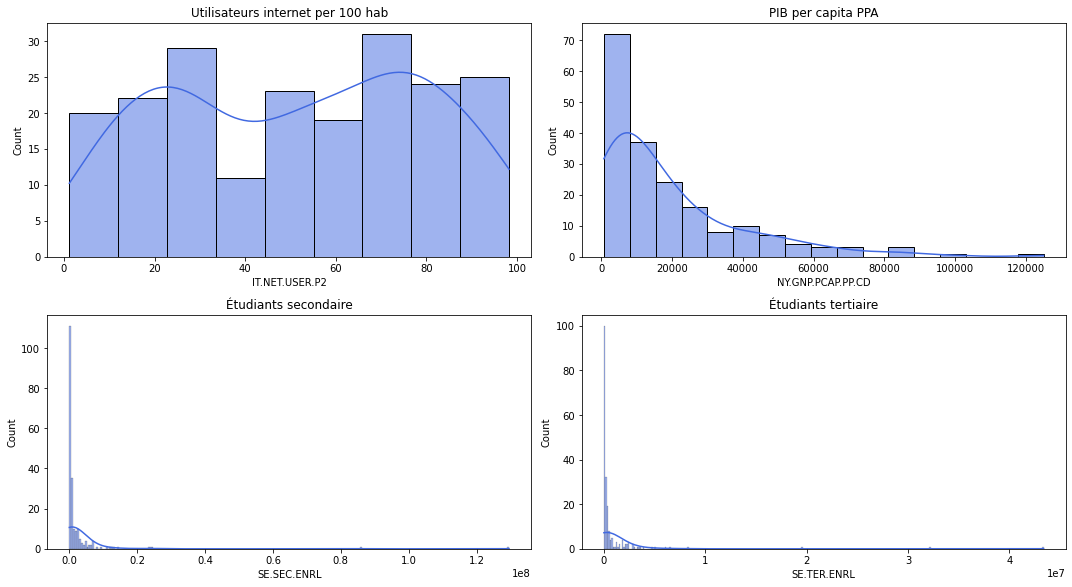

In [116]:
plt.figure(figsize = (15, 20))

# ----------------
# Accés internet
# ----------------
plt.subplot(5,2,1)
sns.histplot(df_MostRecent_SelecCOL_descr["Accés internet 100 hab."], kde = True, color='royalblue')
plt.title('Utilisateurs internet per 100 hab')
plt.xlabel('IT.NET.USER.P2')

# -------------------
# PIB per capita PPA
# -------------------
plt.subplot(5,2,2)
sns.histplot(df_MostRecent_SelecCOL_descr["PIB per capita PPA"], kde = True, color='royalblue')
plt.title('PIB per capita PPA')
plt.xlabel('NY.GNP.PCAP.PP.CD')

# ---------------------
# Étudiants secondaire
# ---------------------
plt.subplot(5,2,3)
sns.histplot(df_MostRecent_SelecCOL_descr["Étudiants secondaire"], kde = True, color='royalblue')
plt.title('Étudiants secondaire')
plt.xlabel('SE.SEC.ENRL')

# ---------------------
# Étudiants tertiaire
# ---------------------
plt.subplot(5,2,4)
sns.histplot(df_MostRecent_SelecCOL_descr["Étudiants université"], kde = True, color='royalblue')
plt.title('Étudiants tertiaire')
plt.xlabel('SE.TER.ENRL')


plt.tight_layout()
plt.show()


## <span style='background:#507c9b'><span style='color:white'>Description indicateurs sélectionnés</span>


### <span style='background:#8cafcc'>Nombre de pays n'ayant renseigné aucun des indicateurs sélectionés 1970-2017</span>


In [117]:

# Pays renseignant au moins l'un des indicateurs
MostRecent_countries_SelecCountr = df_MostRecent_countries_Selec["Country Name"].tolist()


#Pays ne renseignant aucun des indicateurs
# Pays dans liste complète des pays; absentes dans le tableau avec l'information associée aux indicateurs sélectionnés
Country_NOindic = list(set(nomPays[0]).difference(MostRecent_countries_SelecCountr)) 

#--------------------------------------------------------------------------------------
# Population des pays pour lesquels on n'a pas d'information sur au moins un indiacteur
#--------------------------------------------------------------------------------------
Country_NOindic_POP = df_MostRecent_countries.loc[(df_MostRecent_countries['Country Name'].isin(Country_NOindic)) & (df_MostRecent_countries['Indicator Code'] == "SP.POP.TOTL")].sort_values('Most Recent data',ascending=False)


#-----------------------------------------
# Ignorer pays moins de 1000000 habitants
#-----------------------------------------
Country_NOindic_POPSmall = Country_NOindic_POP.loc[Country_NOindic_POP["Most Recent data"] <=1000000]
ListCountry_NOindic_POPSmall = list(Country_NOindic_POPSmall["Country Name"].values)


In [118]:

print("Aucun des indicateurs sélectionnées n'est renseigné par "+str(Country_NOindic)+". \n Le plus peuplé de ces pays comptait 1640541 habitants en 2016.\n On considère que par leur petite taille ces pays ne presentent un grand intêret pour notre projet.\n On ignorera ces 4 pays.")
      

Aucun des indicateurs sélectionnées n'est renseigné par ['St. Martin (French part)', 'Channel Islands', 'Northern Mariana Islands', 'Isle of Man']. 
 Le plus peuplé de ces pays comptait 1640541 habitants en 2016.
 On considère que par leur petite taille ces pays ne presentent un grand intêret pour notre projet.
 On ignorera ces 4 pays.



### <span style='background:#8cafcc'>Nombre de pays ayant renseigné au moins une fois les indicateurs sélectionés</span>


In [119]:
DataperYearInd_selec.head()

Indicator Name Indicator Code  \
7190  Enrolment in secondary education, both sexes (number)    SE.SEC.ENRL   
7191  Enrolment in secondary education, both sexes (number)    SE.SEC.ENRL   
7192  Enrolment in secondary education, both sexes (number)    SE.SEC.ENRL   
7193  Enrolment in secondary education, both sexes (number)    SE.SEC.ENRL   
7194  Enrolment in secondary education, both sexes (number)    SE.SEC.ENRL   

      Date of most recent data  Number of countries  Percent Countries  \
7190                      1971                    1           0.462963   
7191                      1986                    1           0.462963   
7192                      1989                    1           0.462963   
7193                      1992                    1           0.462963   
7194                      1993                    1           0.462963   

      Cumul Num Countries  Cumul Percent Countries  
7190                  210                97.222222  
7191                  209                96.759259  
7192                  208                96.296296  
7193                  207                95.833333  
7194                  206                95.370370

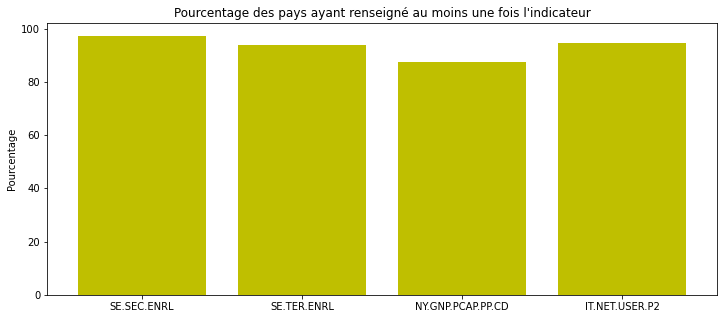

In [120]:

# Data
Ncount_ind = DataperYearInd_selec.groupby(["Indicator Name", "Indicator Code"])["Cumul Percent Countries"].max().reset_index()

# Graph

Ncount_ind_graph, ax = plt.subplots(figsize=(12,5))

Ncount_ind_graph = plt.bar(Ncount_ind['Indicator Code'], Ncount_ind['Cumul Percent Countries'], color = 'y', label="Pays ayant renseigné au moins une fois l'indicateur")
ax.set_ylabel('Pourcentage')                          
ax.set_title("Pourcentage des pays ayant renseigné au moins une fois l'indicateur")

plt.show()



### <span style='background:#8cafcc'>Evolution par indicateur du nombre de "Most recent data"</span>
    

In [121]:

#------
# Data
#------

net_users_count = DataperYearInd_selec.loc[(DataperYearInd_selec['Indicator Code'] == 'IT.NET.USER.P2')]
PIB_count = DataperYearInd_selec.loc[(DataperYearInd_selec['Indicator Code'] == 'NY.GNP.PCAP.PP.CD')]

sec_stu_count = DataperYearInd_selec.loc[(DataperYearInd_selec['Indicator Code'] == 'SE.SEC.ENRL')]
terEd_all_count = DataperYearInd_selec.loc[(DataperYearInd_selec['Indicator Code'] == 'SE.TER.ENRL')]


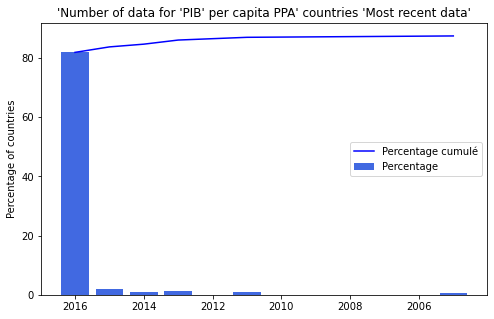

In [122]:

#Graphique PIB, GDP per capita (constant 2010 US$) NY.GDP.PCAP.KD
Pib, axPIB = plt.subplots(sharex=True, sharey= True,figsize=(8,5))
axPIB.invert_xaxis()

Pib_percent = axPIB.bar(PIB_count['Date of most recent data'], PIB_count['Percent Countries'], color = 'royalblue', label="Percentage")
Pib_cumul = axPIB.plot(PIB_count['Date of most recent data'], PIB_count['Cumul Percent Countries'], color = 'blue', label="Percentage cumulé")

axPIB.set_ylabel('Percentage of countries')                          
axPIB.set_title("'Number of data for 'PIB' per capita PPA' countries 'Most recent data'")

plt.legend(loc='center right')
plt.tight_layout
plt.show()

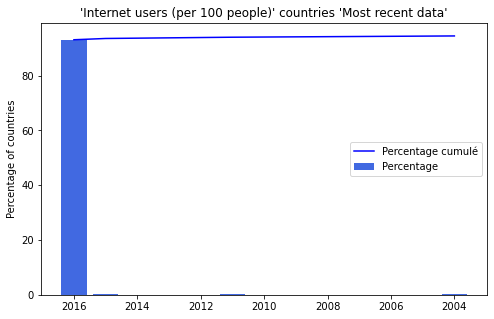

In [123]:


#Graphique 'Internet users (per 100 people)', IT.NET.USER.P2 Info
net_users, axNetUser = plt.subplots(sharex=True, sharey= True,figsize=(8,5))
axNetUser.invert_xaxis()

net_users_percent = axNetUser.bar(net_users_count['Date of most recent data'], net_users_count['Percent Countries'], color = 'royalblue', label="Percentage")
net_users_cumul = axNetUser.plot(net_users_count['Date of most recent data'], net_users_count['Cumul Percent Countries'], color = 'blue', label="Percentage cumulé")

axNetUser.set_ylabel('Percentage of countries')                          
axNetUser.set_title("'Internet users (per 100 people)' countries 'Most recent data'")

plt.legend(loc='center right')
plt.tight_layout
plt.show()

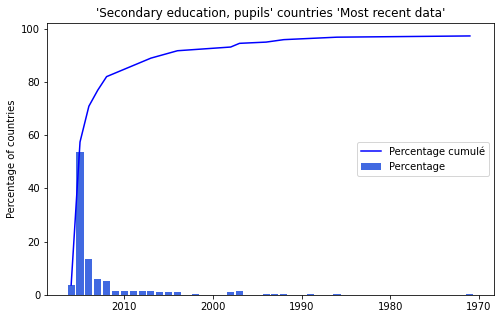

In [124]:

#Graphique Secondary education, pupils SE.SEC.ENRL
Sec_students, axSS = plt.subplots(sharex=True, sharey= True,figsize=(8,5))
axSS.invert_xaxis()
 
Sec_students_percent = axSS.bar(sec_stu_count['Date of most recent data'], sec_stu_count['Percent Countries'], color = 'royalblue', label="Percentage")
Sec_students_cumul = axSS.plot(sec_stu_count['Date of most recent data'], sec_stu_count['Cumul Percent Countries'], color = 'blue', label="Percentage cumulé")

axSS.set_ylabel('Percentage of countries')                          
axSS.set_title("'Secondary education, pupils' countries 'Most recent data'")

plt.legend(loc='center right')
plt.tight_layout
plt.show()

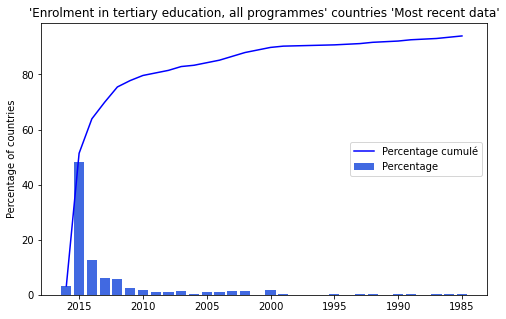

In [125]:


#Graphique Enrolment in tertiary education, all programmes, both sexes (number), SE.TER.ENRL
terEd_all, axtEA = plt.subplots(sharex=True, sharey= True,figsize=(8,5))
axtEA.invert_xaxis()

terEd_all_percent = axtEA.bar(terEd_all_count['Date of most recent data'], terEd_all_count['Percent Countries'], color = 'royalblue', label="Percentage")
terEd_all_cumul = axtEA.plot(terEd_all_count['Date of most recent data'], terEd_all_count['Cumul Percent Countries'], color = 'blue', label="Percentage cumulé")

axtEA.set_ylabel('Percentage of countries')                          
axtEA.set_title("'Enrolment in tertiary education, all programmes' countries 'Most recent data'")

plt.legend(loc='center right')
plt.tight_layout
plt.show()


### <span style='background:#8cafcc'>Analyse évolution 2010-2017</span>


In [126]:
DataperYearInd_selec.head(2)

Indicator Name Indicator Code  \
7190  Enrolment in secondary education, both sexes (number)    SE.SEC.ENRL   
7191  Enrolment in secondary education, both sexes (number)    SE.SEC.ENRL   

      Date of most recent data  Number of countries  Percent Countries  \
7190                      1971                    1           0.462963   
7191                      1986                    1           0.462963   

      Cumul Num Countries  Cumul Percent Countries  
7190                  210                97.222222  
7191                  209                96.759259

In [127]:

#Pour combien de pays on a des informations de 2015 ou plus recent
Ind_selec_2015later = DataperYearInd_selec.loc[(DataperYearInd_selec['Date of most recent data'] >=2015)].groupby(['Indicator Name', 'Indicator Code'])["Percent Countries"].sum().reset_index()
Ind_selec_2015later['Year'] = '2017-2015'

#Pour combien de pays on a des informations de 2014
Ind_selec_2014 = DataperYearInd_selec.loc[(DataperYearInd_selec['Date of most recent data'] ==2014)].groupby(['Indicator Name', 'Indicator Code'])["Percent Countries"].sum().reset_index()
Ind_selec_2014['Year'] = '2014'

#Pour combien de pays on a des informations de 2013
Ind_selec_2013 = DataperYearInd_selec.loc[(DataperYearInd_selec['Date of most recent data'] ==2013)].groupby(['Indicator Name', 'Indicator Code'])["Percent Countries"].sum().reset_index()
Ind_selec_2013['Year'] = '2013'

#Pour combien de pays on a des informations de 2012
Ind_selec_2012 = DataperYearInd_selec.loc[(DataperYearInd_selec['Date of most recent data'] ==2012)].groupby(['Indicator Name', 'Indicator Code'])["Percent Countries"].sum().reset_index()
Ind_selec_2012['Year'] = '2012'

#Pour combien de pays on a des informations de 2011
Ind_selec_2011 = DataperYearInd_selec.loc[(DataperYearInd_selec['Date of most recent data'] ==2011)].groupby(['Indicator Name', 'Indicator Code'])["Percent Countries"].sum().reset_index()
Ind_selec_2011['Year'] = '2011'

#Pour combien de pays on a des informations de 2010
Ind_selec_2010 = DataperYearInd_selec.loc[(DataperYearInd_selec['Date of most recent data'] ==2010)].groupby(['Indicator Name', 'Indicator Code'])["Percent Countries"].sum().reset_index()
Ind_selec_2010['Year'] = '2010'

#Pour combien de pays on a des informations de 2009-2008
Ind_selec_2009_08 = DataperYearInd_selec.loc[(DataperYearInd_selec['Date of most recent data'] == 2009) | (DataperYearInd_selec['Date of most recent data'] == 2008)].groupby(['Indicator Name', 'Indicator Code'])["Percent Countries"].sum().reset_index()
Ind_selec_2009_08['Year'] = '2009-2008'

#Pour combien de pays on a des informations de 2007-2005
Ind_selec_2007_05 = DataperYearInd_selec.loc[(DataperYearInd_selec['Date of most recent data'] < 2008) & (DataperYearInd_selec['Date of most recent data'] >= 2005)].groupby(['Indicator Name', 'Indicator Code'])["Percent Countries"].sum().reset_index()
Ind_selec_2007_05['Year'] = '2007-2005'

#Pour combien de pays on a des informations de 2005-2000
Ind_selec_2005_00 = DataperYearInd_selec.loc[(DataperYearInd_selec['Date of most recent data'] < 2006) & (DataperYearInd_selec['Date of most recent data'] >= 2000)].groupby(['Indicator Name', 'Indicator Code'])["Percent Countries"].sum().reset_index()
Ind_selec_2005_00['Year'] = '2005-2000'

#Pour combien de pays on a des informations antérieures à 2000
Ind_selec_2000after = DataperYearInd_selec.loc[(DataperYearInd_selec['Date of most recent data'] < 2000)].groupby(['Indicator Name', 'Indicator Code'])["Percent Countries"].sum().reset_index()
Ind_selec_2000after['Year'] = '2000avant'
Ind_selec_2000after

Indicator Name  \
0                 Enrolment in secondary education, both sexes (number)   
1  Enrolment in tertiary education, all programmes, both sexes (number)   

  Indicator Code  Percent Countries       Year  
0    SE.SEC.ENRL           5.092593  2000avant  
1    SE.TER.ENRL           4.166667  2000avant

In [128]:

#----------------
# Régrouper toutes les données dans un tableau
#---------------
Ind_selec = pd.concat([Ind_selec_2015later,Ind_selec_2014, Ind_selec_2013,Ind_selec_2012,Ind_selec_2011,Ind_selec_2010, Ind_selec_2009_08,Ind_selec_2007_05,Ind_selec_2005_00,Ind_selec_2000after])



In [129]:

tableau_barplot = Ind_selec.pivot_table(index='Year', columns='Indicator Code', values='Percent Countries').sort_values('Year',ascending=False)
new_name = ["Internet users","PIB PPA","Enrl. secondary","Enrl. Univ"]
ColNewNames = dict(zip(tableau_barplot.columns.to_list(),new_name))

tableau_barplot = tableau_barplot.rename(columns=ColNewNames)
T_tableau_barplot = tableau_barplot.T.reset_index()
T_tableau_barplot = T_tableau_barplot.set_index("Indicator Code").replace(np.nan, 0)
T_tableau_barplot


Year             2017-2015       2014      2013      2012      2011      2010  \
Indicator Code                                                                  
Internet users   93.518519   0.000000  0.000000  0.000000  0.462963  0.000000   
PIB PPA          83.796296   0.925926  1.388889  0.000000  0.925926  0.000000   
Enrl. secondary  57.407407  13.425926  6.018519  5.092593  1.388889  1.388889   
Enrl. Univ       51.388889  12.500000  6.018519  5.555556  2.314815  1.851852   

Year             2009-2008  2007-2005  2005-2000  2000avant  
Indicator Code                                               
Internet users    0.000000   0.000000   0.462963   0.000000  
PIB PPA           0.000000   0.462963   0.462963   0.000000  
Enrl. secondary   2.777778   3.240741   2.314815   5.092593  
Enrl. Univ        1.851852   2.777778   6.481481   4.166667

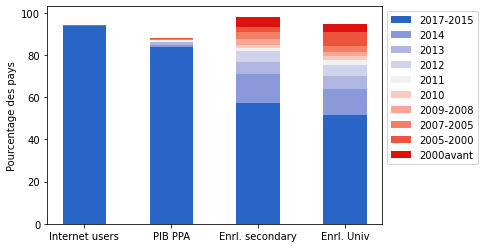

In [130]:



labels = list(T_tableau_barplot.index)
y1 = T_tableau_barplot["2017-2015"]
y2 = T_tableau_barplot["2014"]
y3 = T_tableau_barplot["2013"]
y4 = T_tableau_barplot["2012"]
y5 = T_tableau_barplot["2011"]
y6 = T_tableau_barplot["2010"]
y7 = T_tableau_barplot["2009-2008"]
y8 = T_tableau_barplot["2007-2005"]
y9 = T_tableau_barplot["2005-2000"]
y10 = T_tableau_barplot["2000avant"]
width = 0.5 

fig, ax = plt.subplots()


ax.bar(labels, y1, width, color ="#2865c7")
ax.bar(labels, y2, width, bottom = y1,  color = "#8a99d9")
ax.bar(labels, y3, width, bottom = y1+y2,  color = "#aeb6e1")
ax.bar(labels, y4, width, bottom = y1+y2+y3,  color = "#d0d3e9")
ax.bar(labels, y5, width, bottom = y1+y2+y3+y4,  color = "#f1f1f1")
ax.bar(labels, y6, width, bottom = y1+y2+y3+y4+y5,  color = "#f8cbc1")
ax.bar(labels, y7, width, bottom = y1+y2+y3+y4+y5+y6,  color = "#f9a693")
ax.bar(labels, y8, width, bottom = y1+y2+y3+y4+y5+y6+y7,  color = "#f47f67")
ax.bar(labels, y9, width, bottom = y1+y2+y3+y4+y5+y6+y7+y8,  color = "#eb553c")
ax.bar(labels, y10, width, bottom = y1+y2+y3+y4+y5+y6+y7+y8+y9,  color = "#de1010")


#plt.xticks(rotation = 45)

plt.ylabel("Pourcentage des pays")
#ax.set_title("Nombre de pays avec leur donnée la plus recente dans l'intervalle specifié")
plt.legend(list(T_tableau_barplot.columns), bbox_to_anchor=(1.0, 1.0))
plt.tight_layout
plt.show()


### <span style='background:#8cafcc'>Création d'un tableau: Données disponibles / manquantes par pays 2015</span>
    
Vérifier quels indicateurs sont resneignés pour tous les pays et lesquels manquent pour quels pays

In [131]:

#-------------------------------------
# Données disponibles en 2015 ou après
#-------------------------------------
indicCountry = df_MostRecent_countries_Selec.loc[(df_MostRecent_countries_Selec["Date of most recent data"]>= 2015)]

#regrouper le nom de tous les inidicateurs avec information disponible en 2015 ou après par pays, en une liste
indicCountry2015 = indicCountry.groupby('Country Name')['Indicator Code'].apply(list).reset_index() 

#Nouvelle colonne, nombre d'indicateurs avec information disponible en 2015 ou après par pays
indicCountry2015["Information available"] = indicCountry2015['Indicator Code'].str.len()
indicCountry2015 = indicCountry2015.sort_values('Country Name',ascending=True)


In [132]:

#-----------------------------------------------
# Pays TOUTES les données disponibles avant 2015 
#-----------------------------------------------
MostRecent_countries_SelecCountr #pays renseignant au moins l'un des indicateurs sélectionnés
indicCountry2015List = indicCountry2015["Country Name"].value_counts().index.to_list() # pays avec au moins une donnée après 2015

Country_indicOLD2015 = list(set(MostRecent_countries_SelecCountr).difference(indicCountry2015List)) 
Country_indicOLD2015

#-------------------------------------------------------------------
# Population des pays avec TOUTES les données disponibles avant 2015 
#-------------------------------------------------------------------
Country_indicOLD2015_POP = df_MostRecent_countries.loc[(df_MostRecent_countries['Country Name'].isin(Country_indicOLD2015)) & (df_MostRecent_countries['Indicator Code'] == "SP.POP.TOTL")].sort_values('Most Recent data',ascending=False)
Country_indicOLD2015_POPList = list(Country_indicOLD2015_POP["Country Name"].values)


# On prends comme seuil une population totale minimale de 1000000 habs.
#-----------------------------------------
# Ignorer pays moins de 1000000 habitants
#-----------------------------------------
Country_indicOLD2015_Smallcountry = Country_indicOLD2015_POP.loc[Country_indicOLD2015_POP["Most Recent data"] <=1000000]
Country_indicOLD2015_SmallcountryList = list(Country_indicOLD2015_Smallcountry["Country Name"].values)


In [133]:

#--------------------------------------------------------------------
# Données disponibles en 2015 ou après: Données manquantes 1970-2017
#-------------------------------------------------------------------

#Obtention information sur le nom des pays pour lesquels il n'y a pas d'information pour certains des indicateurs retenus
#et le nom des indicateurs non renseignées par pays
MissingIndicators = df_complet_Count0.loc[(df_complet_Count0["Group of countries"] == False) & (df_complet_Count0['Indicator Code'].isin(selec_metadata)) & (df_complet_Count0['Count Data'] ==0)].reset_index(drop=True)

#regrouper le nom de tous les inidicateurs pour lesquels l'information n'est pas disponible 1970-2017
MissingIndicators_Country = MissingIndicators.groupby('Country Name')['Indicator Code'].apply(list).reset_index()
MissingIndicators_Country = MissingIndicators_Country.rename(columns={"Indicator Code": "Missing Indicator"})

#Nouvelle colonne, nombre d'indicateurs manquants
MissingIndicators_Country["Information unavailable"] = MissingIndicators_Country['Missing Indicator'].str.len()


In [134]:

#Merge avec la table contenant la liste des pays et les indicateurs non renseignés
indicCountry2015 = indicCountry2015.merge(MissingIndicators_Country,how='left', on='Country Name') 


<br>

---

**Ajout colonnes avec les données les plus recentes des indicateurs sélectionnés**

---

In [135]:

#--------
# Données
#--------
pivotData_MostRecent = df_MostRecent_countries_Selec.pivot_table(index='Country Name', columns='Indicator Code', values='Most Recent data')
pivotData_MostRecent.columns =  ["Data_"+c for c in (pivotData_MostRecent.columns.to_list())] # Désambiguïsation du nom des colonnes


#------
# Date
#------
pivotDate_MostRecent = df_MostRecent_countries_Selec.pivot_table(index='Country Name', columns='Indicator Code', values='Date of most recent data')
pivotDate_MostRecent.columns =  ["Date_"+c for c in (pivotDate_MostRecent.columns.to_list())] # Désambiguïsation du nom des colonnes


In [136]:

#merge avec la table de données diponibles/manquantes
indicCountry2015 = indicCountry2015.merge(pivotData_MostRecent,how='left', on='Country Name')
indicCountry2015 = indicCountry2015.merge(pivotDate_MostRecent,how='left', on='Country Name') 
indicCountry2015.head(3)


Country Name                                                 Indicator Code  \
0  Afghanistan               [SE.SEC.ENRL, NY.GNP.PCAP.PP.CD, IT.NET.USER.P2]   
1      Albania  [SE.SEC.ENRL, SE.TER.ENRL, NY.GNP.PCAP.PP.CD, IT.NET.USER.P2]   
2      Algeria               [SE.TER.ENRL, NY.GNP.PCAP.PP.CD, IT.NET.USER.P2]   

   Information available Missing Indicator  Information unavailable  \
0                      3               NaN                      NaN   
1                      4               NaN                      NaN   
2                      3               NaN                      NaN   

   Data_IT.NET.USER.P2  Data_NY.GNP.PCAP.PP.CD  Data_SE.SEC.ENRL  \
0            10.595726                  1900.0         2698816.0   
1            66.363445                 11670.0          315079.0   
2            42.945527                 14420.0         4572513.0   

   Data_SE.TER.ENRL  Date_IT.NET.USER.P2  Date_NY.GNP.PCAP.PP.CD  \
0          262874.0               2016.0                  2016.0   
1          160527.0               2016.0                  2016.0   
2         1289474.0               2016.0                  2016.0   

   Date_SE.SEC.ENRL  Date_SE.TER.ENRL  
0            2015.0            2014.0  
1            2015.0            2015.0  
2            2011.0            2015.0

<br>

---

**Données considerés pour la suite de l'étude**

---



In [137]:

print("Il y a " + str(len(Country_NOindic)) + " pays que ne seront plus considerés parce qu'ils ne renseignent aucun des indicateurs sélectionnées et parceque leur population total est inferieure a 1.000.000 habitants. \n")

print("Pour une analyse précise, nous travaillerons autant que possible avec des données de 2015 ou plus récentes. Il y a " + str(len(Country_indicOLD2015_POPList)) + " pays dont toutes leurs données pour les indicateurs sélectionnés sont plus anciennes que 2015. Sur ceux, " + str(len(Country_indicOLD2015_SmallcountryList)) + " pays seront ignorés à cause de leur peite taille ;"+ str(Country_indicOLD2015_SmallcountryList)) 



Il y a 4 pays que ne seront plus considerés parce qu'ils ne renseignent aucun des indicateurs sélectionnées et parceque leur population total est inferieure a 1.000.000 habitants. 

Pour une analyse précise, nous travaillerons autant que possible avec des données de 2015 ou plus récentes. Il y a 3 pays dont toutes leurs données pour les indicateurs sélectionnés sont plus anciennes que 2015. Sur ceux, 3 pays seront ignorés à cause de leur peite taille ;['Curacao', 'American Samoa', 'San Marino']


## <span style='background:#507c9b'><span style='color:white'>Analyse pays</span>

In [138]:

#---------------------------------------------------------------------
# Pays renseignant TOUS les indicateurs sélectionnées en 2015 ou après
#---------------------------------------------------------------------
df_completeCountries2015 =indicCountry2015.loc[indicCountry2015['Information available']==len(selec_metadata)]
completeCountries2015 = df_completeCountries2015["Country Name"].values
allCountriesInfo = list(indicCountry2015["Country Name"].values)

#---------------------------------------------------
#Information disponible mais plus ancienne que 2015
#---------------------------------------------------
anciens = indicCountry2015.loc[(indicCountry2015['Information available']<=3) & (indicCountry2015["Missing Indicator"].isnull())]
countryolddata = anciens['Country Name'].nunique()

#------------------------------------------------------------------------------------------
# Pays pour lesquels manque au moins l'information d'au moins un indicateur entre 1970-2017
#------------------------------------------------------------------------------------------
nodata = indicCountry2015.loc[~(indicCountry2015["Missing Indicator"].isnull())].sort_values('Information unavailable',ascending=False)


#---------------------------------------------------------------
# Pays ne renseignant qu'un ou deux des indicateurs sélectionés
#---------------------------------------------------------------
only1_2indic = nodata.loc[(nodata["Information unavailable"] >=2)]
only1_2indicCountr = only1_2indic["Country Name"].tolist()

#-------------------------------------------------------------------------------------------------------------
# Population des pays pour lesquels on seuelement il y a de l'information pour 1 ou 2 des indicateurs
#-------------------------------------------------------------------------------------------------------------
only1_2indic_info = df_MostRecent_countries.loc[(df_MostRecent_countries['Country Name'].isin(only1_2indicCountr)) & (df_MostRecent_countries['Indicator Code'] == "SP.POP.TOTL")].sort_values('Most Recent data',ascending=False)
only1_2indic_info


# On prends comme seuil une population totale minimale de 1000000 habs.
#-----------------------------------------
# Ignorer pays moins de 1000000 habitants
#-----------------------------------------
only1_2indic_Smallcountry = only1_2indic_info.loc[only1_2indic_info["Most Recent data"] <=1000000]
only1_2indic_SmallCountry = only1_2indic_Smallcountry["Country Name"].tolist()

#-----------------------------------
# Mettre en reserve les autres pays 
#------------------------------------
paysReserve_1_2_indic = list(set(only1_2indicCountr).difference(only1_2indic_SmallCountry))


In [139]:

print("Sur les "+str(len(allCountriesInfo))+" pays renseingés dans le tableau " + str(len(list(completeCountries2015))) + " ont des informations sur tous les indicateurs selectionnés en 2015 ou après.\n")
print("Il y a des données disponibles, plus anciens que 2015, pour les indicateurs sélectionnées pour "+ str(countryolddata) +" pays.\n")
print("Il y a "+str(len(nodata.index))+" pays pour lesquels manque l'information de l'un des indicateurs sélectionnés.\n")

print("Il y a "+str(len(only1_2indicCountr))+" pour lesquels seulement il y a de l'information pour 1 ou 2 des indicateurs sélectionnées.\n ")


Sur les 209 pays renseingés dans le tableau 83 ont des informations sur tous les indicateurs selectionnés en 2015 ou après.

Il y a des données disponibles, plus anciens que 2015, pour les indicateurs sélectionnées pour 101 pays.

Il y a 25 pays pour lesquels manque l'information de l'un des indicateurs sélectionnés.

Il y a 10 pour lesquels seulement il y a de l'information pour 1 ou 2 des indicateurs sélectionnées.
 


# <span style='background:#004c6d'><span style='color:white'>**Sélection de données**</span>

In [140]:

#------------------
#Pays à supprimer
#------------------
RemoveCountry = Country_NOindic+Country_indicOLD2015_POPList+list(only1_2indic_SmallCountry)
print("A cet stade; "+str(len(RemoveCountry))+" pays seront ignorés par manque d'information sont "+str(RemoveCountry))


#-------------------------------------------
# 83 pays information complète 2015
#--------------------------------------------
df_completeCountries2015
completeCountries2015 = list(completeCountries2015)

#-----------------
# Pays en reserve
#-----------------
paysReserve_1_2_indic

#------------------------------------
# Tableau avec les données à réviser
#-------------------------------------
noReviser = list(RemoveCountry)+completeCountries2015
aReviser_pays = list(set(list(df_MostRecent_countries_Selec["Country Name"].values)).difference(noReviser)) 



A cet stade; 13 pays seront ignorés par manque d'information sont ['St. Martin (French part)', 'Channel Islands', 'Northern Mariana Islands', 'Isle of Man', 'Curacao', 'American Samoa', 'San Marino', 'Greenland', 'Faroe Islands', 'Sint Maarten (Dutch part)', 'Monaco', 'Turks and Caicos Islands', 'Gibraltar']


## <span style='background:#507c9b'><span style='color:white'>Données manquantes : </span>

In [141]:

#------------------------------------------------------------
#Pays sans information pour l'un des indicateurs sélectionnés
#-------------------------------------------------------------
noALLind = indicCountry2015.loc[(indicCountry2015["Country Name"].isin(aReviser_pays)) &(indicCountry2015["Data_IT.NET.USER.P2"].isna())|(indicCountry2015["Data_NY.GNP.PCAP.PP.CD"].isna())|(indicCountry2015["Data_SE.SEC.ENRL"].isna())|(indicCountry2015["Data_SE.TER.ENRL"].isna())]
noALLind_countries = noALLind["Country Name"].tolist()

#--------------------------------------------------------------------------------------
# Population des pays pour lesquels on n'a pas d'information sur au moins un indiacteur
#--------------------------------------------------------------------------------------
noALLind_countriesPOP = df_MostRecent_countries.loc[(df_MostRecent_countries['Country Name'].isin(noALLind_countries)) & (df_MostRecent_countries['Indicator Code'] == "SP.POP.TOTL")].sort_values('Most Recent data',ascending=False)
noALLind_countriesPOP


#-----------------------------------------
# Ignorer pays moins de 1000000 habitants
#-----------------------------------------
Supr_noALLind_countries = noALLind_countriesPOP.loc[noALLind_countriesPOP["Most Recent data"] <=1000000]
paysIgnorer = list(Supr_noALLind_countries["Country Name"].values)


#-----------------------------------
# Mettre en reserve les autres pays
#-----------------------------------
noALLind_countries_res = list(set(noALLind_countries).difference(paysIgnorer))



## <span style='background:#507c9b'><span style='color:white'>Données anciennes : </span>
    

 ---
  
 *  L'indicateur sélectionné pour prendre en compte les arguments économiques est la valeur du **produit intérieur brut par habitant en parité de pouvoir d'achat** (PPA), "NY.GNP.PCAP.PP.CD". <br>
 
 *  Les **comparaisons** entre pays basées sur les PPA du PIB au niveau de ses composantes de dépenses **reflètent uniquement les différences de production économique (volume)**, car **les PPA contrôlent les différences de niveau de prix entre les pays**.<br>
 
 *  L'offre d'academy fonctione en Frace. Nous utiliserons le **ratio entre le PIB français et celui des pays disposant de données plus ancienne que 2015** pour décider du bien fondé d'investir plus d'efforts dans la récupération de ces données.<br>

In [142]:

#---------------------------------------------------------------------------
# Pays avec des informations plus anciennes que 2015 pour le accès internet
#---------------------------------------------------------------------------
NET_oldData = indicCountry2015.loc[(indicCountry2015["Date_IT.NET.USER.P2"]< 2015)]
NET_oldData_Country = NET_oldData["Country Name"].tolist()

#-----------------------------------------------------
# Population données internet plus anciennes que 2015
#-----------------------------------------------------
NET_oldData_CountryPOP = df_MostRecent_countries.loc[(df_MostRecent_countries['Country Name'].isin(NET_oldData_Country)) & (df_MostRecent_countries['Indicator Code'] == "SP.POP.TOTL")]
#Pays avec plus de 1.000.000
NET_oldData_CountryPOP.loc[NET_oldData_CountryPOP["Most Recent data"] <1000000]


Country Name Country Code     Indicator Name Indicator Code  \
246538        Palau          PLW  Population, total    SP.POP.TOTL   

        Most Recent data  Date of most recent data  
246538           21503.0                      2016

In [143]:

#-----------------------------------------------------------------------------------------------
# Pays avec des informations plus anciennes que 2015 pour le PIB PPA
#-----------------------------------------------------------------------------------------------
PIB_oldData = indicCountry2015.loc[(indicCountry2015["Date_NY.GNP.PCAP.PP.CD"]< 2015)]
PIB_oldData_Country = PIB_oldData["Country Name"].tolist()


#------------------------------------------------------
# Calcul du ratio PIB PPA PIB_oldData_Country / France 
#------------------------------------------------------
df_MostRecent_countries_PIBRatio = df_MostRecent_countries.loc[df_MostRecent_countries["Indicator Code"] =="NY.GNP.PCAP.PP.CD"].copy()
PIBFrance = df_MostRecent_countries_PIBRatio.loc[df_MostRecent_countries_PIBRatio["Country Name"] =="France", "Most Recent data"].values
df_MostRecent_countries_PIBRatio["PIB Ratio Fr"] = df_MostRecent_countries['Most Recent data'] / PIBFrance
oldPIB_PIBratio = df_MostRecent_countries_PIBRatio.loc[(df_MostRecent_countries_PIBRatio['Country Name'].isin(PIB_oldData_Country))]
oldPIB_Country_PIBratio = oldPIB_PIBratio["Country Name"].tolist()

#------------------------------------------------------------------------------------
# Pays population >1.000.000 ; PIB Ratio Fr => 0.75
#------------------------------------------------------------------------------------
#Obtention de popoulation des pays la liste donnes ancienens PIB
POPoldPIB_Country_PIBratio = df_MostRecent_countries.loc[(df_MostRecent_countries['Country Name'].isin(oldPIB_Country_PIBratio)) & (df_MostRecent_countries['Indicator Code'] == "SP.POP.TOTL")]
#Pays avec plus de 1.000.000
resPOPoldPIB_Country_PIBratio = POPoldPIB_Country_PIBratio.loc[POPoldPIB_Country_PIBratio["Most Recent data"] >1000000]
resPOPoldPIB_CountryLIST_PIBratio =list(resPOPoldPIB_Country_PIBratio["Country Name"].values)
#Pays avec plus de 1.000.000 et ratio >0.75
oldPIB_PIBratio.loc[(oldPIB_PIBratio['PIB Ratio Fr']>0.75) & (oldPIB_PIBratio['Country Name'].isin(resPOPoldPIB_CountryLIST_PIBratio))]


Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, Most Recent data, Date of most recent data, PIB Ratio Fr]
Index: []


## <span style='background:#507c9b'><span style='color:white'>Pays sous reserve : </span>


In [144]:

#-------------------------
#Analyse pays sous reserve
#-------------------------
paysReserve = paysReserve_1_2_indic + noALLind_countries_res

df_paysReverve = indicCountry2015.loc[indicCountry2015["Country Name"].isin(paysReserve)]
df_paysReverve


Country Name                              Indicator Code  \
26      British Virgin Islands                  [SE.SEC.ENRL, SE.TER.ENRL]   
47                        Cuba  [SE.SEC.ENRL, SE.TER.ENRL, IT.NET.USER.P2]   
98   Korea, Dem. People’s Rep.                  [SE.SEC.ENRL, SE.TER.ENRL]   
100                     Kosovo                         [NY.GNP.PCAP.PP.CD]   
168                    Somalia                            [IT.NET.USER.P2]   
170                South Sudan                               [SE.SEC.ENRL]   
181       Syrian Arab Republic               [SE.TER.ENRL, IT.NET.USER.P2]   
205         West Bank and Gaza  [SE.SEC.ENRL, SE.TER.ENRL, IT.NET.USER.P2]   

     Information available                           Missing Indicator  \
26                       2         [NY.GNP.PCAP.PP.CD, IT.NET.USER.P2]   
47                       3                         [NY.GNP.PCAP.PP.CD]   
98                       2         [NY.GNP.PCAP.PP.CD, IT.NET.USER.P2]   
100                      1  [SE.SEC.ENRL, SE.TER.ENRL, IT.NET.USER.P2]   
168                      1                         [NY.GNP.PCAP.PP.CD]   
170                      1               [SE.TER.ENRL, IT.NET.USER.P2]   
181                      2                         [NY.GNP.PCAP.PP.CD]   
205                      3                         [NY.GNP.PCAP.PP.CD]   

     Information unavailable  Data_IT.NET.USER.P2  Data_NY.GNP.PCAP.PP.CD  \
26                       2.0                  NaN                     NaN   
47                       1.0            38.765867                     NaN   
98                       2.0                  NaN                     NaN   
100                      3.0                  NaN                 10220.0   
168                      1.0             1.880000                     NaN   
170                      2.0                  NaN                  1860.0   
181                      1.0            31.869627                     NaN   
205                      1.0            61.178385                     NaN   

     Data_SE.SEC.ENRL  Data_SE.TER.ENRL  Date_IT.NET.USER.P2  \
26             2027.0             827.0                  NaN   
47           825055.0          261413.0               2016.0   
98          2148364.0          565350.0                  NaN   
100               NaN               NaN                  NaN   
168           86929.0           15672.0               2016.0   
170          164135.0               NaN                  NaN   
181         1857140.0          772877.0               2016.0   
205          721414.0          221018.0               2016.0   

     Date_NY.GNP.PCAP.PP.CD  Date_SE.SEC.ENRL  Date_SE.TER.ENRL  
26                      NaN            2015.0            2015.0  
47                      NaN            2015.0            2015.0  
98                      NaN            2015.0            2015.0  
100                  2016.0               NaN               NaN  
168                     NaN            2007.0            1987.0  
170                  2013.0            2015.0               NaN  
181                     NaN            2013.0            2015.0  
205                     NaN            2015.0            2015.0


* Recherche des données manquantes https://data.worldbank.org/indicator/SP.POP.TOTL?locations=VG

* De par sa petite taille on ignorera cet pays "British Virgin Islands"
* De par son bas PIB per capita PPA on ignorera West Bank and Gaza, Somalia et Cuba
* De par son accès limité a internet (4 hab pour 100 en 2016 d'après le World Bank) on ignorera South Sudan
* Il n'y a pas d'autres données disponibles pour Syrian Arab Republic, Korea, Dem. People’s Rep. et Kosovo (l'information sur le nombre d'étudiants n'est pas disponible), on les ignorera par manque d'information


In [145]:

  ###################
  ##  MISE A JOUR  ##
  ###################

#------------------
#Pays à supprimer
#------------------
RemoveCountry = Country_NOindic + only1_2indic_SmallCountry + paysIgnorer + oldPIB_Country_PIBratio + paysReserve + Country_indicOLD2015_POPList
num_countriesRemove = len(set(RemoveCountry))

print("A cet stade; "+str(num_countriesRemove)+" pays seront ignorés par manque d'information. \n Ces pays sont : "+str(set(RemoveCountry))+"\n")


A cet stade; 39 pays seront ignorés par manque d'information. 
 Ces pays sont : {'Somalia', 'Turks and Caicos Islands', 'Greenland', 'Virgin Islands (U.S.)', 'Puerto Rico', 'Monaco', 'Channel Islands', 'Eritrea', 'Guam', 'Syrian Arab Republic', 'Tuvalu', 'South Sudan', 'American Samoa', 'Kosovo', 'British Virgin Islands', 'Sint Maarten (Dutch part)', 'Liechtenstein', 'Kiribati', 'Korea, Dem. People’s Rep.', 'Solomon Islands', 'Isle of Man', 'Libya', 'Curacao', 'Cuba', 'Aruba', 'Faroe Islands', 'West Bank and Gaza', 'Venezuela, RB', 'Bermuda', 'Gibraltar', 'Cayman Islands', 'New Caledonia', 'Vanuatu', 'St. Martin (French part)', 'Djibouti', 'San Marino', 'French Polynesia', 'Northern Mariana Islands', 'Andorra'}




## <span style='background:#507c9b'><span style='color:white'>Etudiants secondaire et université</span>



---
---

* Ce qui nous interese est le **nombre total d'étudiants dans le secondaire et l'université**.
* Objectif; donnée recente ou estimation pour les deux indicateurs

---
---


In [146]:

#--------------------------------------------------------------------------
# Pays avec des données plus anciennes que 2015 pour le nombre d'étudiants
#--------------------------------------------------------------------------

oldSec = indicCountry2015.loc[indicCountry2015["Date_SE.SEC.ENRL"]<2015]
oldSecCountry = oldSec["Country Name"].tolist()

oldTer = indicCountry2015.loc[indicCountry2015["Date_SE.TER.ENRL"]<2015]
oldTerCountry = oldTer["Country Name"].tolist()


In [147]:

#-------------------------------------------------------------------------------
#Pays qui génèrent des problèmes (généralement dus à un excès de cellules vides) 
# seront considérés comme des cas particuliers.
#-------------------------------------------------------------------------------
countryProblem = ["Montenegro","Grenada","Oman"]

oldTerCountry = list(set(oldTerCountry).difference(countryProblem))
completeCountries2015 = list(set(completeCountries2015).difference(countryProblem))


---
---

<br>
Pour obtenir des projections des données plus récentes, l'objectif est d'identifier le pays avec informations récentes montrant la plus haute corrélation (du nombre d'étudiants) avec le pays à compléter.
<br>

 * Pour lisser les variations dans le nombre d'étudiants liées à les variations de la population dans l'âge du secondaire et/ou tertiaire, on créa une variable "Students Ratio" = "Number Students" / "Pop Students"<br>
 
 * Pour intégrer d'autres variations dues au contexte socio-économique on cherchera le pays-modèle dans la région du pays à compléter<br>
 
 * On ne prendra en compte que les couples "Pays à reviser" / "Pays complet" avec un coefficient de corrélation supérieure à 0.9<br>
 
 * On assume que l'évolution du nombre d'étudiants dans les intervalles d'intérêt suit une fonction polynomiale de degré 1<br>
 


In [148]:

#---------------------------------------------------------------------------------------
#Préparation données "Population of the official age for education" et "Student number"
#--------------------------------------------------------------------------------------

#Sélection des indicateurs et colonnes
df_stuRev_new = df_countries_obs[(df_countries_obs["Indicator Code"] == "SP.SEC.TOTL.IN") |(df_countries_obs["Indicator Code"] == "SP.TER.TOTL.IN") | (df_countries_obs["Indicator Code"] == "SE.TER.ENRL") | (df_countries_obs["Indicator Code"] == "SE.SEC.ENRL")]
df_stuRev_new = df_stuRev_new.drop(columns = ["Country Code", "Indicator Name", "Most Recent data", "Date of most recent data" , "Region", "Count Data"])

#Préparation pour la création des nouvelles variables
df_stuRev_newcol = pd.melt(frame=df_stuRev_new, id_vars=["Country Name", "Indicator Code"], var_name = "Year", value_name="Value")
df_stuRev_newcol = df_stuRev_newcol.pivot_table(index=["Country Name", "Year"], columns=["Indicator Code"], values="Value")

#Création des nouvelles colonnes
df_stuRev_newcol["Tertiary Students Ratio"] = df_stuRev_newcol["SE.TER.ENRL"]/df_stuRev_newcol["SP.TER.TOTL.IN"]
df_stuRev_newcol["Secondary Students Ratio"] = df_stuRev_newcol["SE.SEC.ENRL"]/df_stuRev_newcol["SP.SEC.TOTL.IN"]


#Ajout colonnes Region et Groupe de revenus
df_stuRev_newcol_compl = df_stuRev_newcol.copy().reset_index()
df_stuRev_newcol_compl = pd.merge(df_stuRev_newcol_compl,df_EdStatsCountry[["Region", "Income Group","Country Name"]], on ="Country Name", how='left')



In [149]:

#---------------------------------------------------------------------------------------
#Préparation données "Population of the official age for education" et "Student number"
#--------------------------------------------------------------------------------------

#Sélection des indicateurs et colonnes
df_stuRev_new = df_countries_obs[(df_countries_obs["Indicator Code"] == "SP.SEC.TOTL.IN") |(df_countries_obs["Indicator Code"] == "SP.TER.TOTL.IN") | (df_countries_obs["Indicator Code"] == "SE.TER.ENRL") | (df_countries_obs["Indicator Code"] == "SE.SEC.ENRL")]
df_stuRev_new = df_stuRev_new.drop(columns = ["Country Code", "Indicator Name", "Most Recent data", "Date of most recent data" , "Region", "Count Data"])

#Préparation pour la création des nouvelles variables
df_stuRev_newcol = pd.melt(frame=df_stuRev_new, id_vars=["Country Name", "Indicator Code"], var_name = "Year", value_name="Value")
df_stuRev_newcol = df_stuRev_newcol.pivot_table(index=["Country Name", "Year"], columns=["Indicator Code"], values="Value")

#Création des nouvelles colonnes
df_stuRev_newcol["Tertiary Students Ratio"] = df_stuRev_newcol["SE.TER.ENRL"]/df_stuRev_newcol["SP.TER.TOTL.IN"]
df_stuRev_newcol["Secondary Students Ratio"] = df_stuRev_newcol["SE.SEC.ENRL"]/df_stuRev_newcol["SP.SEC.TOTL.IN"]


#Ajout colonnes Region et Groupe de revenus
df_stuRev_newcol_compl = df_stuRev_newcol.copy().reset_index()
df_stuRev_newcol_compl = pd.merge(df_stuRev_newcol_compl,df_EdStatsCountry[["Region", "Income Group","Country Name"]], on ="Country Name", how='left')



In [150]:

#---------------------------------------------------------------------
# Obtention des valeurs pour le nombre d'étudiants dans le sécondaire
#---------------------------------------------------------------------
modeldata_sec = pd.concat([numberSecStu ("East Asia & Pacific"), numberSecStu ("Europe & Central Asia"), numberSecStu ("Latin America & Caribbean"), numberSecStu ("Middle East & North Africa"), numberSecStu ("North America"), numberSecStu ("South Asia"), numberSecStu ("Sub-Saharan Africa")])
modeldata_ter = pd.concat([numberTerStu ("East Asia & Pacific"), numberTerStu ("Europe & Central Asia"), numberTerStu ("Latin America & Caribbean"), numberTerStu ("Middle East & North Africa"), numberTerStu ("North America"), numberTerStu ("South Asia"), numberTerStu ("Sub-Saharan Africa")])

#Integrer ces données au tableau géneral
df_stuRev_model = indicCountry2015.drop(columns = ['Indicator Code', 'Information available','Missing Indicator', 'Information unavailable', 'Data_IT.NET.USER.P2','Data_NY.GNP.PCAP.PP.CD', 'Date_IT.NET.USER.P2', 'Date_NY.GNP.PCAP.PP.CD'])
df_stuRev_model = pd.merge(df_stuRev_model,modeldata_sec, on ="Country Name", how='left')
df_stuRev_model = pd.merge(df_stuRev_model,modeldata_ter, on ="Country Name", how='left')



In [151]:

# Données pourcentage étudiants / pop total

#South Asia
Stu_SAsia_graph = df_stuRev_newcol_compl.loc[(df_stuRev_newcol_compl["Region"]=='South Asia')]
StuSec_SAsia_graph=Stu_SAsia_graph.drop(columns=['SE.SEC.ENRL', 'SE.TER.ENRL', 'SP.SEC.TOTL.IN', "Region"])

StuSec_SAsiaRev_graph = StuSec_SAsia_graph.loc[StuSec_SAsia_graph["Country Name"].isin(oldSecCountry)]
StuSec_SAsiaOK_graph = StuSec_SAsia_graph.loc[~StuSec_SAsia_graph["Country Name"].isin(oldSecCountry)]

StuSec_SAsiaRev_graph = StuSec_SAsiaRev_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
StuSec_SAsiaOK_graph = StuSec_SAsiaOK_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()


#Europe & Central Asia
Stu_Eur_graph= df_stuRev_newcol_compl.loc[(df_stuRev_newcol_compl["Region"]=='Europe & Central Asia')]
StuSec_Eur_graph=Stu_Eur_graph.drop(columns=['SE.SEC.ENRL', 'SE.TER.ENRL', 'SP.SEC.TOTL.IN', "Region"])

StuSec_EurRev_graph = StuSec_Eur_graph.loc[StuSec_Eur_graph["Country Name"].isin(oldSecCountry)]
StuSec_EurOK_graph = StuSec_Eur_graph.loc[~StuSec_Eur_graph["Country Name"].isin(oldSecCountry)]

StuSec_EurRev_graph = StuSec_EurRev_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
StuSec_EurOK_graph = StuSec_EurOK_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()


#'Middle East & North Africa'
Stu_NEAfr_graph = df_stuRev_newcol_compl.loc[(df_stuRev_newcol_compl["Region"]=='Middle East & North Africa')]
Stu_NEAfr_graph=Stu_NEAfr_graph.drop(columns=['SE.SEC.ENRL', 'SE.TER.ENRL', 'SP.SEC.TOTL.IN', "Region"])

Stu_NEAfrRev_graph = Stu_NEAfr_graph.loc[Stu_NEAfr_graph["Country Name"].isin(oldSecCountry)]
Stu_NEAfrOK_graph = Stu_NEAfr_graph.loc[~Stu_NEAfr_graph["Country Name"].isin(oldSecCountry)]

Stu_NEAfrRev_graph = Stu_NEAfrRev_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
Stu_NEAfrOK_graph = Stu_NEAfrOK_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()


#East Asia & Pacific
Stu_Paci_graph = df_stuRev_newcol_compl.loc[(df_stuRev_newcol_compl["Region"]=='East Asia & Pacific')]
Stu_Paci_graph=Stu_Paci_graph.drop(columns=['SE.SEC.ENRL', 'SE.TER.ENRL', 'SP.SEC.TOTL.IN', "Region"])

Stu_PaciRev_graph = Stu_Paci_graph.loc[Stu_Paci_graph["Country Name"].isin(oldSecCountry)]
Stu_PaciOK_graph = Stu_Paci_graph.loc[~Stu_Paci_graph["Country Name"].isin(oldSecCountry)]

Stu_PaciRev_graph = Stu_PaciRev_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
Stu_PaciOK_graph = Stu_PaciOK_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()


#Sub-Saharan Africa
Stu_SAfr_graph = df_stuRev_newcol_compl.loc[(df_stuRev_newcol_compl["Region"]=='Sub-Saharan Africa')]
Stu_SAfr_graph=Stu_SAfr_graph.drop(columns=['SE.SEC.ENRL', 'SE.TER.ENRL', 'SP.SEC.TOTL.IN', "Region"])

Stu_SAfrRev_graph = Stu_SAfr_graph.loc[Stu_SAfr_graph["Country Name"].isin(oldSecCountry)]
Stu_SAfrOk_graph = Stu_SAfr_graph.loc[~Stu_SAfr_graph["Country Name"].isin(oldSecCountry)]

Stu_SAfrRev_graph = Stu_SAfrRev_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
Stu_SAfrOk_graph = Stu_SAfrOk_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()


#Latin America & Caribbean
Stu_SAme_graph = df_stuRev_newcol_compl.loc[(df_stuRev_newcol_compl["Region"]=='Latin America & Caribbean')]
Stu_SAme_graph=Stu_SAme_graph.drop(columns=['SE.SEC.ENRL', 'SE.TER.ENRL', 'SP.SEC.TOTL.IN', "Region"])

Stu_SAmeRev_graph = Stu_SAme_graph.loc[Stu_SAme_graph["Country Name"].isin(oldSecCountry)]
Stu_SAmeOk_graph = Stu_SAme_graph.loc[~Stu_SAme_graph["Country Name"].isin(oldSecCountry)]

Stu_SAmeRev_graph = Stu_SAmeRev_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
Stu_SAmeOk_graph = Stu_SAmeOk_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()


#North America
Stu_NAme_graph = df_stuRev_newcol_compl.loc[(df_stuRev_newcol_compl["Region"]=='North America')]
Stu_NAme_graph=Stu_NAme_graph.drop(columns=['SE.SEC.ENRL', 'SE.TER.ENRL', 'SP.SEC.TOTL.IN', "Region"])

Stu_NAmeRev_graph = Stu_NAme_graph.loc[Stu_NAme_graph["Country Name"].isin(oldSecCountry)]
Stu_NAmeOk_graph = Stu_NAme_graph.loc[~Stu_NAme_graph["Country Name"].isin(oldSecCountry)]

Stu_NAmeRev_graph = Stu_NAmeRev_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
Stu_NAmeOk_graph = Stu_NAmeOk_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()


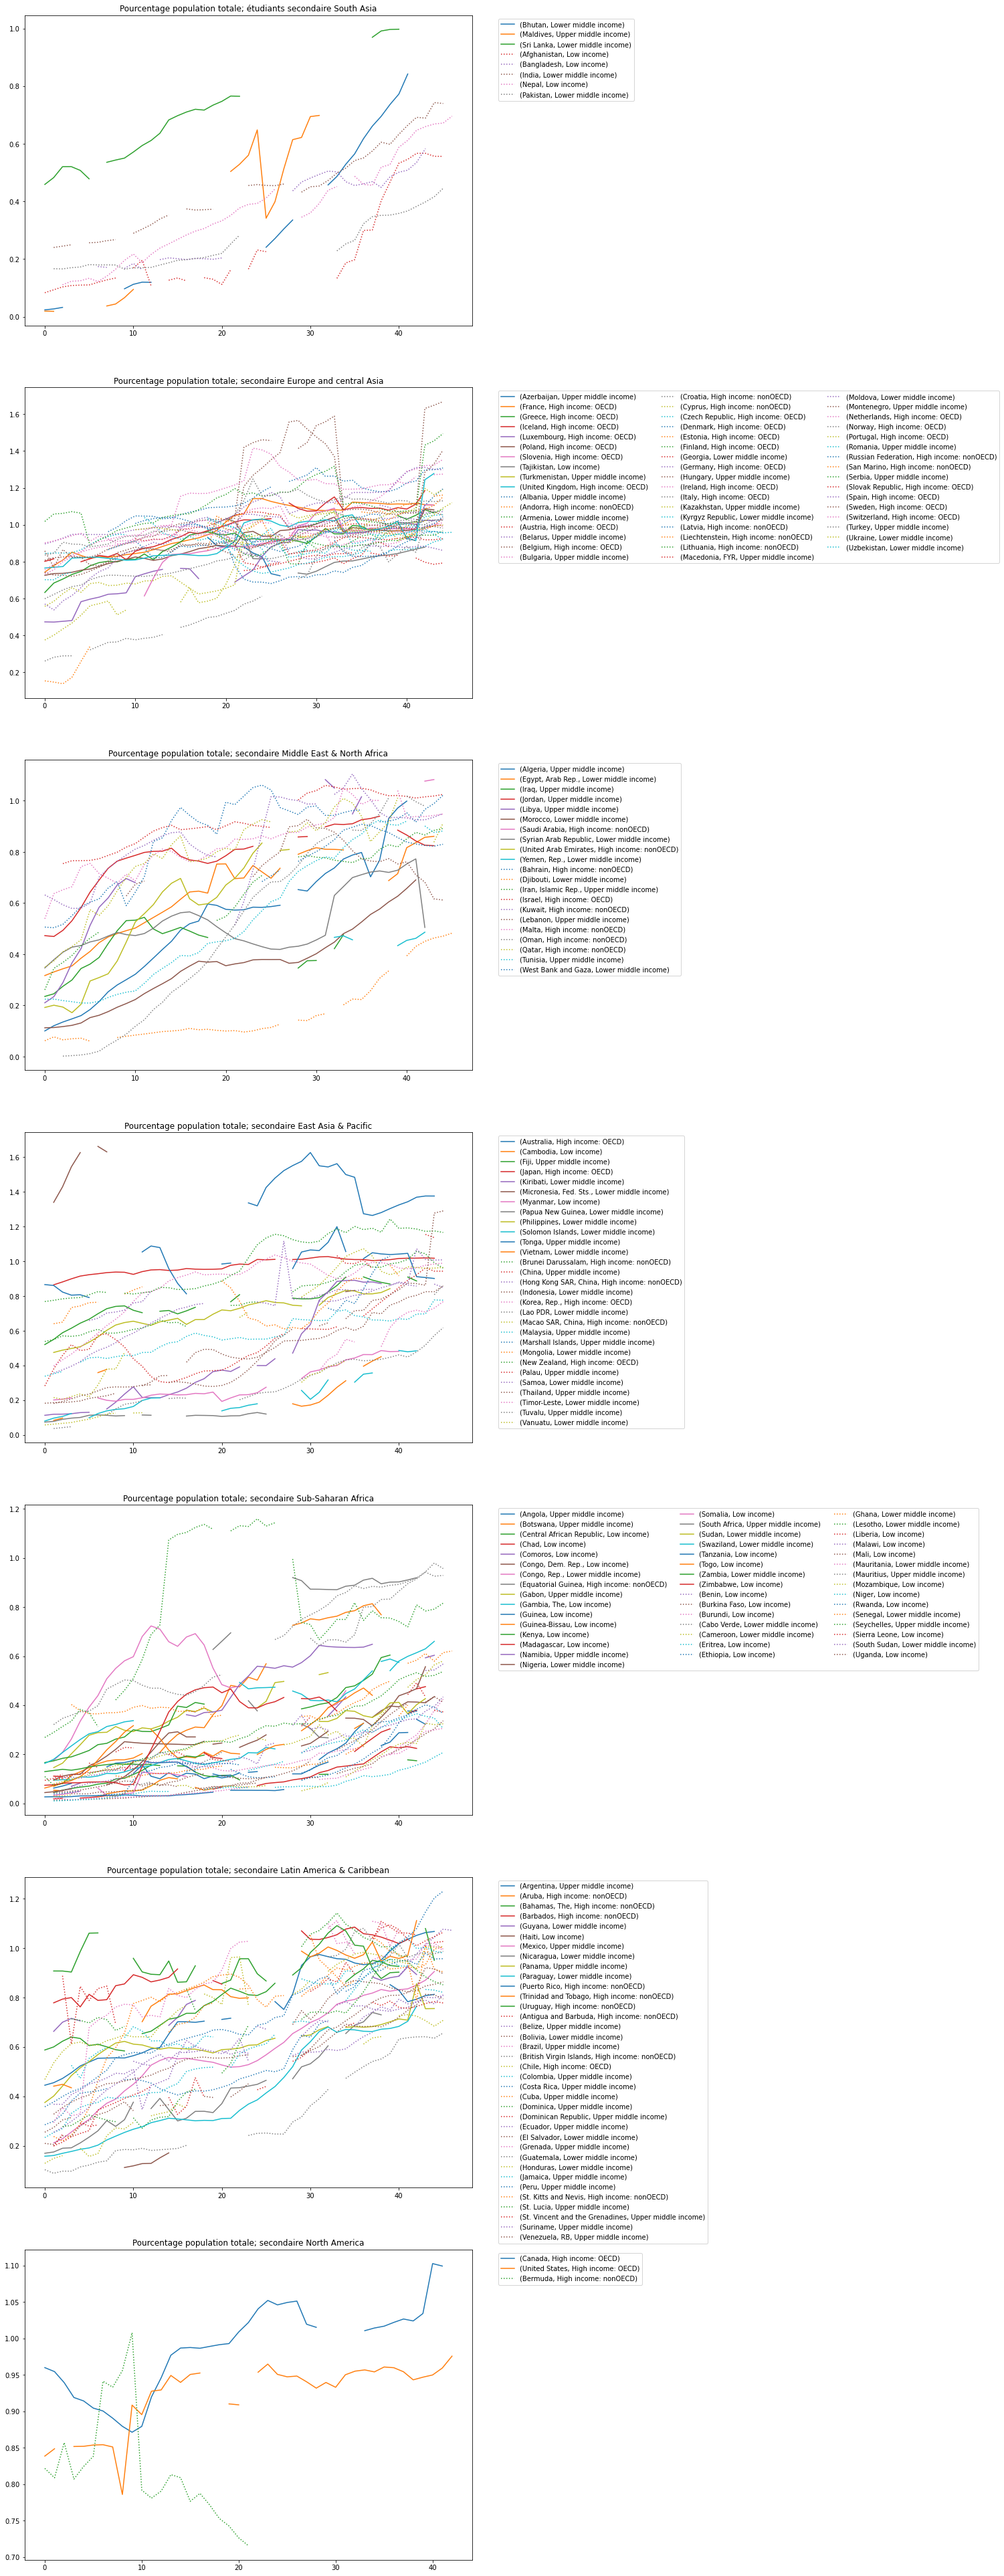

In [152]:

fig, axes = plt.subplots(7, 1, figsize=(12, 70))

StuSec_SAsiaRev_graph.plot(ax=axes[0], title="Pourcentage population totale; étudiants secondaire South Asia", legend=False)
StuSec_SAsiaOK_graph.plot(ax=axes[0], legend=False,linestyle = "dotted")
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

StuSec_EurRev_graph.plot(ax=axes[1], title="Pourcentage population totale; secondaire Europe and central Asia", legend=False)
StuSec_EurOK_graph.plot(ax=axes[1], legend=False,linestyle = "dotted")
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)

Stu_NEAfrRev_graph.plot(ax=axes[2], title="Pourcentage population totale; secondaire Middle East & North Africa", legend=False)
Stu_NEAfrOK_graph.plot(ax=axes[2], legend=False,linestyle = "dotted")
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

Stu_PaciRev_graph.plot(ax=axes[3], title="Pourcentage population totale; secondaire East Asia & Pacific", legend=False)
Stu_PaciOK_graph.plot(ax=axes[3], legend=False,linestyle = "dotted")
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

Stu_SAfrRev_graph.plot(ax=axes[4], title="Pourcentage population totale; secondaire Sub-Saharan Africa", legend=False)
Stu_SAfrOk_graph.plot(ax=axes[4], legend=False,linestyle = "dotted")
axes[4].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)


Stu_SAmeRev_graph.plot(ax=axes[5], title="Pourcentage population totale; secondaire Latin America & Caribbean", legend=False)
Stu_SAmeOk_graph.plot(ax=axes[5], legend=False,linestyle = "dotted")
axes[5].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)


Stu_NAmeRev_graph.plot(ax=axes[6], title="Pourcentage population totale; secondaire North America", legend=False)
Stu_NAmeOk_graph.plot(ax=axes[6], legend=False,linestyle = "dotted")
axes[6].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout                     
plt.show()

In [153]:

#Données pour Heatmap de correlation entre pays, pour illustrer la méthodologie pour améliorer les données du nombre d'étudiants

#South Asia
Stu_SAsia_heat = Stu_SAsia_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
Stu_SAsia_heat["Year"] = Stu_SAsia_heat["Year"].apply(pd.to_numeric)

Stu_SAsia_heat_corr = Stu_SAsia_heat.copy().droplevel(1, axis=1).drop(columns="Year")
Stu_SAsia_heat_corr = Stu_SAsia_heat_corr.corr()


#Europe & Central Asia
Stu_Eur_heat = Stu_Eur_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
Stu_Eur_heat["Year"] = Stu_Eur_heat["Year"].apply(pd.to_numeric)

Stu_Eur_heat_corr = Stu_Eur_heat.copy().droplevel(1, axis=1).drop(columns="Year")
Stu_Eur_heat_corr = Stu_Eur_heat_corr.corr()


#'Middle East & North Africa'
Stu_NEAfr_heat = Stu_NEAfr_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
Stu_NEAfr_heat["Year"] = Stu_NEAfr_heat["Year"].apply(pd.to_numeric)

Stu_NEAfr_heat_corr = Stu_NEAfr_heat.copy().droplevel(1, axis=1).drop(columns="Year")
Stu_NEAfr_heat_corr = Stu_NEAfr_heat_corr.corr()

#East Asia & Pacific
Stu_Paci_heat = Stu_Paci_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
Stu_Paci_heat["Year"] = Stu_Paci_heat["Year"].apply(pd.to_numeric)

Stu_Paci_heat_corr = Stu_Paci_heat.copy().droplevel(1, axis=1).drop(columns="Year")
Stu_Paci_heat_corr = Stu_Paci_heat_corr.corr()


#Sub-Saharan Africa
Stu_SAfr_heat = Stu_SAfr_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
Stu_SAfr_heat["Year"] = Stu_SAfr_heat["Year"].apply(pd.to_numeric)

Stu_SAfr_heat_corr = Stu_SAfr_heat.copy().droplevel(1, axis=1).drop(columns="Year")
Stu_SAfr_heat_corr = Stu_SAfr_heat_corr.corr()


#Latin America & Caribbean
Stu_SAme_heat = Stu_SAme_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
Stu_SAme_heat["Year"] = Stu_SAme_heat["Year"].apply(pd.to_numeric)

Stu_SAme_heat_corr = Stu_SAme_heat.copy().droplevel(1, axis=1).drop(columns="Year")
Stu_SAme_heat_corr = Stu_SAme_heat_corr.corr()


#North America
Stu_NAme_heat = Stu_NAme_graph.pivot_table(index=["Year"], columns=["Country Name" , "Income Group"], values="Secondary Students Ratio").reset_index()
Stu_NAme_heat["Year"] = Stu_NAme_heat["Year"].apply(pd.to_numeric)

Stu_NAme_heat_corr = Stu_NAme_heat.copy().droplevel(1, axis=1).drop(columns="Year")
Stu_NAme_heat_corr = Stu_NAme_heat_corr.corr()



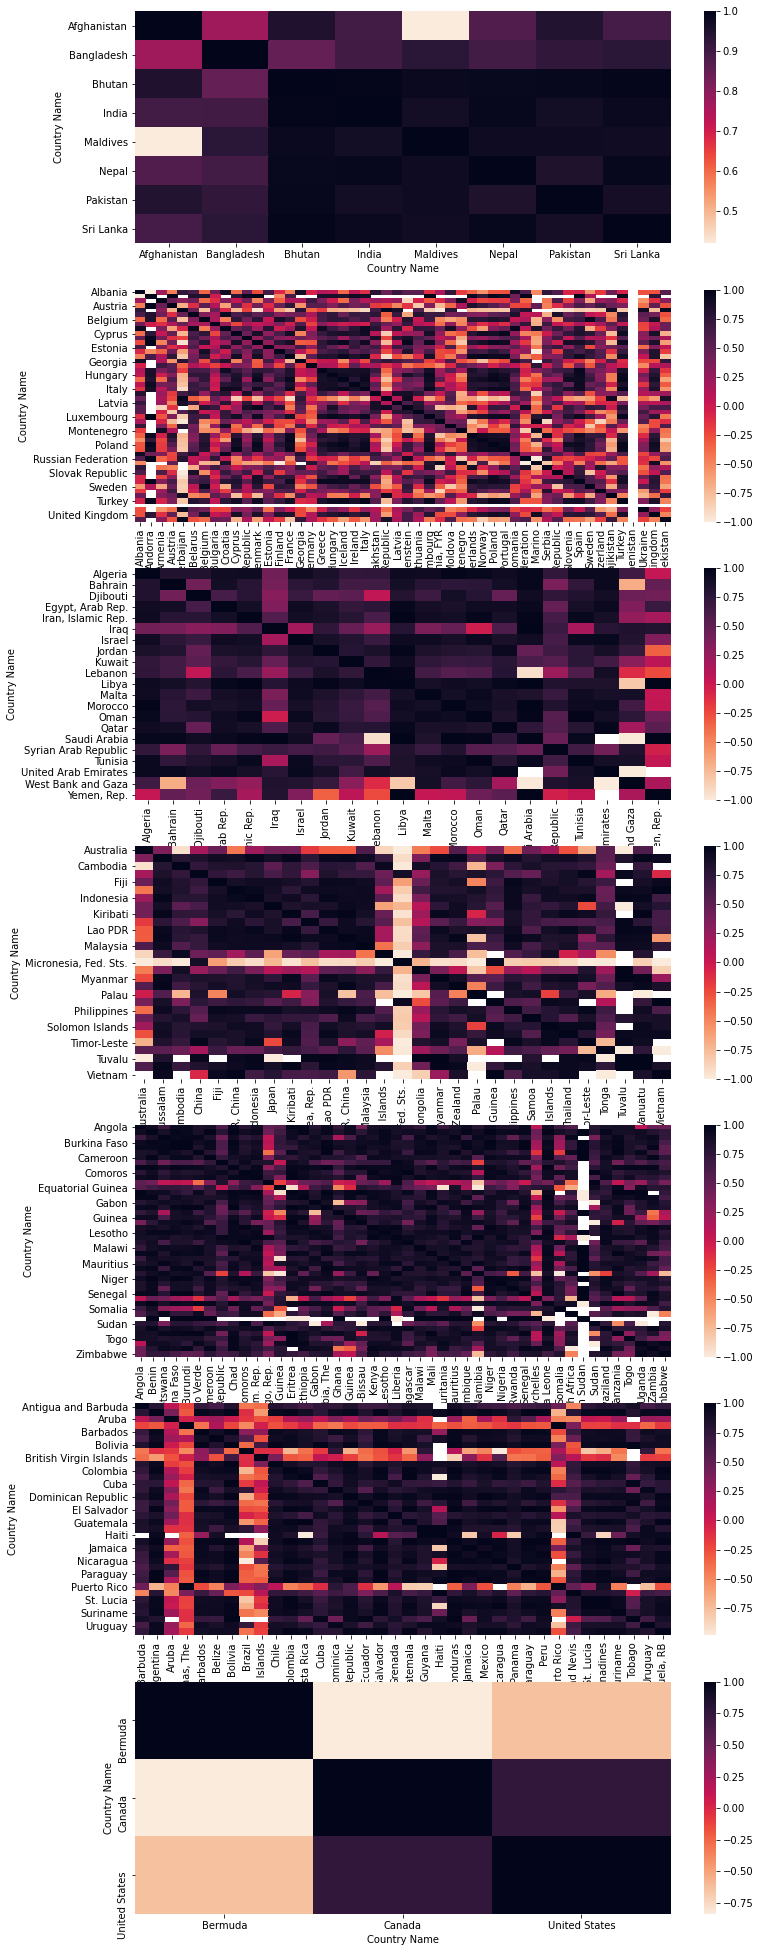

In [154]:

fig, axes = plt.subplots(7, 1, figsize=(12, 35))

sns.heatmap(Stu_SAsia_heat_corr, cmap="rocket_r", ax=axes[0])

sns.heatmap(Stu_Eur_heat_corr, cmap="rocket_r", ax=axes[1])

sns.heatmap(Stu_NEAfr_heat_corr, cmap="rocket_r", ax=axes[2])

sns.heatmap(Stu_Paci_heat_corr, cmap="rocket_r", ax=axes[3])

sns.heatmap(Stu_SAfr_heat_corr, cmap="rocket_r", ax=axes[4])

sns.heatmap(Stu_SAme_heat_corr, cmap="rocket_r", ax=axes[5])

sns.heatmap(Stu_NAme_heat_corr, cmap="rocket_r", ax=axes[6])

plt.tight_layout                     
plt.show()

In [155]:

#------------------------------------------------
#Nombre total d'étudiants (secondaire+tertiaire)
#------------------------------------------------

#Données 2015 ou plus recents
df_stuRev_model2015SEC = df_stuRev_model.copy()
df_stuRev_model2015SEC = df_stuRev_model2015SEC.loc[(df_stuRev_model2015SEC["Date_SE.SEC.ENRL"]>=2015) |(df_stuRev_model2015SEC["Model date SEC"]>=2015)]
df_stuRev_model2015TER = df_stuRev_model.copy()
df_stuRev_model2015TER = df_stuRev_model2015TER.loc[(df_stuRev_model2015TER["Date_SE.TER.ENRL"]>=2015) |(df_stuRev_model2015TER["Model date TER"]>=2015)]

#Créer des colonnes en reunisant les données
df_stuRev_model2015SEC['Secondary Data complet'] = df_stuRev_model2015SEC['Model data SEC'].fillna((df_stuRev_model2015SEC["Data_SE.SEC.ENRL"]))
df_stuRev_model2015TER['Tertiary Data complet'] = df_stuRev_model2015TER['Model data TER'].fillna((df_stuRev_model2015TER["Data_SE.TER.ENRL"]))

#Intégrer les nouvelles colonnes au tableau sans restriction d'age
df_stuRev_model = df_stuRev_model.drop(columns=['Model data SEC','Model date SEC', 'Model data TER', 'Model date TER'])
df_stuRev_model = pd.merge(df_stuRev_model,df_stuRev_model2015SEC[["Country Name",'Secondary Data complet']], on ="Country Name", how='left')
df_stuRev_model = pd.merge(df_stuRev_model,df_stuRev_model2015TER[["Country Name",'Tertiary Data complet']], on ="Country Name", how='left')

#Créer une nouvelle colonne pour la somme des étudiants dans le secondaire et dans le tertiaire
df_stuRev_modelRESUME = df_stuRev_model.copy()
df_stuRev_modelRESUME = df_stuRev_modelRESUME.replace(np.nan, 0)
df_stuRev_modelRESUME["Total Students"] = df_stuRev_modelRESUME['Secondary Data complet']+df_stuRev_modelRESUME['Tertiary Data complet']

df_stuRev_modelRESUME


Country Name  Data_SE.SEC.ENRL  Data_SE.TER.ENRL  \
0              Afghanistan         2698816.0          262874.0   
1                  Albania          315079.0          160527.0   
2                  Algeria         4572513.0         1289474.0   
3                  Andorra            4395.0             501.0   
4                   Angola          884982.0          221037.0   
..                     ...               ...               ...   
204  Virgin Islands (U.S.)           12900.0            2488.0   
205     West Bank and Gaza          721414.0          221018.0   
206            Yemen, Rep.         1768102.0          267498.0   
207                 Zambia          208640.0           56680.0   
208               Zimbabwe          957461.0          135575.0   

     Date_SE.SEC.ENRL  Date_SE.TER.ENRL  Secondary Data complet  \
0              2015.0            2014.0            2.698816e+06   
1              2015.0            2015.0            3.150790e+05   
2              2011.0            2015.0            4.409968e+06   
3              2015.0            2015.0            4.395000e+03   
4              2011.0            2015.0            1.134207e+06   
..                ...               ...                     ...   
204            1997.0            2007.0            0.000000e+00   
205            2015.0            2015.0            7.214140e+05   
206            2013.0            2011.0            0.000000e+00   
207            1994.0            2012.0            5.861397e+05   
208            2013.0            2015.0            0.000000e+00   

     Tertiary Data complet  Total Students  
0             2.718192e+05    2.970635e+06  
1             1.605270e+05    4.756060e+05  
2             1.289474e+06    5.699442e+06  
3             5.010000e+02    4.896000e+03  
4             2.210370e+05    1.355244e+06  
..                     ...             ...  
204           0.000000e+00    0.000000e+00  
205           2.210180e+05    9.424320e+05  
206           0.000000e+00    0.000000e+00  
207           1.796616e+05    7.658013e+05  
208           1.355750e+05    1.355750e+05  

[209 rows x 8 columns]

In [156]:

#-----------------------------------------------------------------------------------
#Nombre total d'étudiants (secondaire+tertiaire) pays données anciennes sans modèle
#----------------------------------------------------------------------------------
df_stuRev_modelRESUMEold=df_stuRev_modelRESUME.copy()
df_stuRev_modelRESUMEold = df_stuRev_modelRESUMEold.loc[~df_stuRev_modelRESUMEold["Country Name"].isin(RemoveCountry)]
df_stuRev_modelRESUMEold =df_stuRev_modelRESUMEold.loc[df_stuRev_modelRESUME["Total Students"]==0]
df_stuRev_modelRESUMEold["Total Students"] = df_stuRev_modelRESUME['Data_SE.SEC.ENRL']+df_stuRev_modelRESUME['Data_SE.TER.ENRL']
countryOLDstuData = df_stuRev_modelRESUMEold["Country Name"].tolist()

#----------------------------------------------------------------
#Nombre total d'étudiants (secondaire+tertiaire) pays à problèmes
#----------------------------------------------------------------
df_stuRev_modelRESUMEproblem=df_stuRev_modelRESUME.copy()
df_stuRev_modelRESUMEproblem = df_stuRev_modelRESUMEproblem.loc[~df_stuRev_modelRESUMEproblem["Country Name"].isin(RemoveCountry)]
df_stuRev_modelRESUMEproblem = df_stuRev_modelRESUMEproblem.loc[df_stuRev_modelRESUMEproblem["Country Name"].isin(countryProblem)]
df_stuRev_modelRESUMEproblem ["Total Students"] = df_stuRev_modelRESUME['Secondary Data complet']+df_stuRev_modelRESUME['Data_SE.TER.ENRL']
countryPROBLEMstuData = df_stuRev_modelRESUMEproblem["Country Name"].tolist()

#----------------------------------------
#Supprimer les lignes concernant ces pays
#----------------------------------------
df_stuRev_modelRESUME = df_stuRev_modelRESUME[~df_stuRev_modelRESUME["Country Name"].isin(countryOLDstuData+countryPROBLEMstuData)]


In [157]:

#------------------------------------------
# Réunir toutes les données total students
#------------------------------------------

df_stuRev_TOT = pd.merge(df_stuRev_modelRESUME,df_stuRev_modelRESUMEold[["Country Name",'Total Students']], on =("Country Name", "Total Students"), how='outer')
df_stuRev_TOT = pd.merge(df_stuRev_TOT,df_stuRev_modelRESUMEproblem[["Country Name",'Total Students']], on =("Country Name", "Total Students"), how='outer')




## <span style='background:#507c9b'><span style='color:white'>Tableau de synthèse: données pour le classement de pays</span>
    

In [158]:

df_synthese = indicCountry2015.copy()

#------------------------------------------
#Reduire le tableau aux données d'intêret
#------------------------------------------
df_synthese = df_synthese.drop(columns = ['Indicator Code', 'Information available','Missing Indicator', 'Information unavailable','Data_SE.SEC.ENRL', 'Data_SE.TER.ENRL','Date_IT.NET.USER.P2', 'Date_NY.GNP.PCAP.PP.CD', 'Date_SE.SEC.ENRL', 'Date_SE.TER.ENRL'])

#-----------------------------------------------------------
#Ajouter la colonne avec le nombre total d'étudiants calculé
#-----------------------------------------------------------
df_synthese = pd.merge(df_synthese,df_stuRev_TOT[["Country Name",'Total Students']], on =("Country Name"), how='left')
df_synthese = df_synthese.loc[~df_synthese["Country Name"].isin(RemoveCountry)]


df_synthese


Country Name  Data_IT.NET.USER.P2  Data_NY.GNP.PCAP.PP.CD  \
0            Afghanistan            10.595726                  1900.0   
1                Albania            66.363445                 11670.0   
2                Algeria            42.945527                 14420.0   
4                 Angola            13.000000                  6100.0   
5    Antigua and Barbuda            73.000000                 22130.0   
..                   ...                  ...                     ...   
200           Uzbekistan            46.791287                  6650.0   
203              Vietnam            46.500000                  6170.0   
206          Yemen, Rep.            24.579208                  2500.0   
207               Zambia            25.506579                  3850.0   
208             Zimbabwe            23.119989                  1810.0   

     Total Students  
0      2.970635e+06  
1      4.756060e+05  
2      5.699442e+06  
4      1.355244e+06  
5      1.022028e+04  
..              ...  
200    4.174423e+06  
203    1.342438e+07  
206    2.035600e+06  
207    7.658013e+05  
208    1.355750e+05  

[177 rows x 4 columns]

In [159]:
df_synthese.count(axis=0)


Country Name              177
Data_IT.NET.USER.P2       177
Data_NY.GNP.PCAP.PP.CD    177
Total Students            177
dtype: int64

In [160]:

#-------------------------------------------------------
#Dévenir des pays en fonction de la qualité des données
#-------------------------------------------------------

# IGNORER Pays sans aucune information pour les indicateurs sélectionnés (population moins de 1000000)
Country_NOindic

df_paysNoind = pd.DataFrame(Country_NOindic)
df_paysNoind.rename(columns={(0) : ("Country Name")}, inplace=True)
df_paysNoind["Ignorer 0 ind, peu hab."] = 1


# IGNORER Pays avec juste 1 ou 2 indicateurs et population moins de 1000000
only1_2indic_SmallCountry

df_pays1_2 = pd.DataFrame(only1_2indic_SmallCountry)
df_pays1_2.rename(columns={(0) : ("Country Name")}, inplace=True)
df_pays1_2["Ignorer seul 1-2 ind, peu hab."] = 1


# IGNORER Pays avec TOUTES les données avant 2015 et population moins de 1000000
Country_indicOLD2015_SmallcountryList

df_paysTTav2015 = pd.DataFrame(Country_indicOLD2015_SmallcountryList)
df_paysTTav2015.rename(columns={(0) : ("Country Name")}, inplace=True)
df_paysTTav2015["Ignorer toutes info. avant 2015, peu hab."] = 1


# IGNORER Pays sans information pour l'un des indicateurs et population moins de 1000000
paysIgnorer

df_pays1indpetit = pd.DataFrame(paysIgnorer)
df_pays1indpetit.rename(columns={(0) : ("Country Name")}, inplace=True)
df_pays1indpetit["Ignorer manque un indicateur, peu hab."] = 1


# IGNORER Pays avec des informations plus anciennes que 2015 pour le accès internet et population moins de 1000000
NET_oldData_Country 

df_paysNETold = pd.DataFrame(NET_oldData_Country)
df_paysNETold.rename(columns={(0) : ("Country Name")}, inplace=True)
df_paysNETold["Ignorer Net avant 2015, peu hab."] = 1


# IGNORER Pays avec des informations plus anciennes que 2015 pour le PIB PPA population <1.000.000 ; PIB Ratio Fr < 0.75
oldPIB_Country_PIBratio

df_paysoldPIB_PIBratio = pd.DataFrame(oldPIB_Country_PIBratio)
df_paysoldPIB_PIBratio.rename(columns={(0) : ("Country Name")}, inplace=True)
df_paysoldPIB_PIBratio["Ignorer PIB ancien et bas, peu hab."] = 1


# IGNORER Pays ayan suivi une étude individualisée, presentaient une problematique particuliere 
#(ne s'inscrivent pas dans les cas précedents pour ignorer mais les données touvés sur le World Bank ne les rendent pas intêressants)
paysReserve = list(set(paysReserve))

df_paysReservesup = pd.DataFrame(paysReserve)
df_paysReservesup.rename(columns={(0) : ("Country Name")}, inplace=True)
df_paysReservesup["Ignorer cas particulier"] = 1


# GARDER PAS D'ACTIONS Pays informations sur tous les indicateurs selectionnés en 2015 ou après
completeCountries2015

df_complete2015 = pd.DataFrame(completeCountries2015)
df_complete2015.rename(columns={(0) : ("Country Name")}, inplace=True)
df_complete2015["Tous données récents"] = 1


#GARDER données à completer (nombre étudiants)
oldEDcountries = list(set(oldSecCountry + oldTerCountry ))
oldEDcountriesNotinother =  list(set(oldEDcountries).difference((Country_NOindic+only1_2indic_SmallCountry+Country_indicOLD2015_SmallcountryList+paysIgnorer+NET_oldData_Country+oldPIB_Country_PIBratio+paysReserve+completeCountries2015)))

df_paysoldED = pd.DataFrame(oldEDcountriesNotinother)
df_paysoldED.rename(columns={(0) : ("Country Name")}, inplace=True)
df_paysoldED["Données edu. à compléter"] = 1



pays = pd.concat([df_paysNoind, df_pays1_2, df_paysTTav2015, df_pays1indpetit, df_paysNETold, df_paysoldPIB_PIBratio, df_paysReservesup, df_complete2015, df_paysoldED])
payscount = pays.loc[:, "Ignorer 0 ind, peu hab.":"Données edu. à compléter"].count(axis=0)


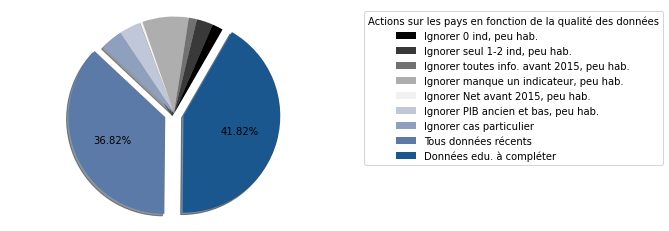

In [161]:

#Chart avec dévenir des pays

colorpie = ["#000000", "#393939", "#717171", "#aeaeae", "#f1f1f1", "#c0c7d8", "#8fa0bf","#5c7aa7","#1b578f"]
explode = (0,0, 0, 0, 0, 0, 0, 0.1, 0.1)

autopct = lambda v: f'{v:.2f}%' if v > 10 else None

fig1, ax1 = plt.subplots()
ax1.pie(payscount.values, explode=explode, colors = colorpie, autopct= autopct, shadow=True, startangle=60)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(title = "Actions sur les pays en fonction de la qualité des données", labels=payscount.index, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.show()


# <span style='background:#004c6d'><span style='color:white'>**Score attractivité**</span>


In [162]:

#Création d'une variable composite que considère les conditions économiques et technologiques du pays
#Distance euclidienne
df_synthese["Techno-economic"] = np.sqrt(df_synthese["Data_IT.NET.USER.P2"]**2 + df_synthese["Data_NY.GNP.PCAP.PP.CD"]**2)

#Classement de l'attractitivé des pays
df_synthese["Score"] = df_synthese["Techno-economic"]*df_synthese["Total Students"]
df_synthese = df_synthese.sort_values(by=["Score"], ascending=False).reset_index(drop=True)

#Eliminer les données concernant France
df_synthese_sansFR = df_synthese.drop(index = df_synthese[df_synthese["Country Name"]=="France"].index).reset_index(drop=True)
df_synthese_sansFR.head(15)


Country Name  Data_IT.NET.USER.P2  Data_NY.GNP.PCAP.PP.CD  \
0                China            53.200000                 15500.0   
1        United States            76.176737                 58700.0   
2                India            29.547163                  6500.0   
3              Germany            89.647101                 49710.0   
4               Brazil            59.682747                 14840.0   
5                Japan            92.000000                 42790.0   
6               Turkey            58.347734                 24160.0   
7   Russian Federation            76.409085                 22540.0   
8            Indonesia            25.366301                 11240.0   
9               Mexico            59.540446                 17760.0   
10        Saudi Arabia            73.750904                 55860.0   
11               Italy            61.324253                 38430.0   
12         Korea, Rep.            92.716545                 35790.0   
13  Iran, Islamic Rep.            53.226773                 20050.0   
14               Spain            80.561333                 36450.0   

    Total Students  Techno-economic         Score  
0     1.294946e+08     15500.091298  2.007178e+12  
1     1.953173e+07     58700.049428  1.146513e+12  
2     1.616495e+08      6500.067156  1.050732e+12  
3     1.009073e+07     49710.080835  5.016110e+11  
4     3.178726e+07     14840.120014  4.717267e+11  
5     1.097561e+07     42790.098901  4.696475e+11  
6     1.703206e+07     24160.070456  4.114959e+11  
7     1.597703e+07     22540.129510  3.601242e+11  
8     2.886432e+07     11240.028623  3.244357e+11  
9     1.668177e+07     17760.099804  2.962700e+11  
10    4.987725e+06     55860.048686  2.786145e+11  
11    6.432494e+06     38430.048929  2.472011e+11  
12    6.664865e+06     35790.120094  2.385363e+11  
13    1.051520e+07     20050.070650  2.108305e+11  
14    5.277051e+06     36450.089028  1.923490e+11


##  <span style='background:#507c9b'><span style='color:white'>Attractivité par région et groupe de revenus
    

In [163]:

#Création dataframe
region_income = pd.DataFrame({'Country Name' : df_EdStatsCountry['Country Name'], 'Region' : df_EdStatsCountry['Region'], 'Income Group' : df_EdStatsCountry['Income Group']})
df_synthese_sansFR_Region_Income = pd.merge(region_income, df_synthese_sansFR[["Country Name", "Score", "Total Students", "Techno-economic"]], on='Country Name', how='outer')


In [164]:

#Données par région
df_synthese_sansFR_Region = df_synthese_sansFR_Region_Income.groupby("Region")[["Score", "Total Students", "Techno-economic"]].sum().sort_values(by='Score',ascending=False).reset_index()
df_synthese_sansFR_Region = df_synthese_sansFR_Region.set_index('Region')
df_synthese_sansFR_Region


Score  Total Students  Techno-economic
Region                                                                   
East Asia & Pacific         3.671828e+12    2.207113e+08     6.542821e+05
Europe & Central Asia       2.945131e+12    1.008772e+08     1.385115e+06
North America               1.316272e+12    2.344140e+07     1.021201e+05
Latin America & Caribbean   1.268612e+12    8.385557e+07     4.344034e+05
South Asia                  1.244584e+12    2.021432e+08     5.760049e+04
Middle East & North Africa  9.249597e+11    4.490866e+07     6.031516e+05
Sub-Saharan Africa          2.685277e+11    6.293296e+07     2.197627e+05

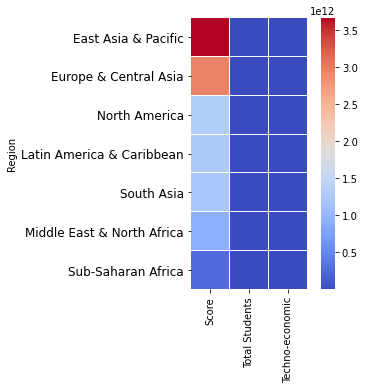

In [165]:

#Graph Région
fig = plt.figure(1, figsize=(5, 5))
res = sns.heatmap(df_synthese_sansFR_Region, square=True, linewidths=0.1, cmap='coolwarm')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 10)
plt.show()


In [166]:

#Données par groupe revenus
df_synthese_sansFR_Income = df_synthese_sansFR_Region_Income.groupby("Income Group")[["Score", "Total Students", "Techno-economic"]].sum().sort_values(by='Score',ascending=False).reset_index()
df_synthese_sansFR_Income = df_synthese_sansFR_Income.set_index('Income Group')
df_synthese_sansFR_Income


Score  Total Students  Techno-economic
Income Group                                                       
Upper middle income   4.484753e+12    2.729581e+08     7.633854e+05
High income: OECD     4.070095e+12    9.095910e+07     1.297533e+06
Lower middle income   2.036578e+12    2.855841e+08     2.591043e+05
High income: nonOECD  8.764277e+11    2.560286e+07     1.075862e+06
Low income            1.720621e+11    6.376621e+07     6.055166e+04

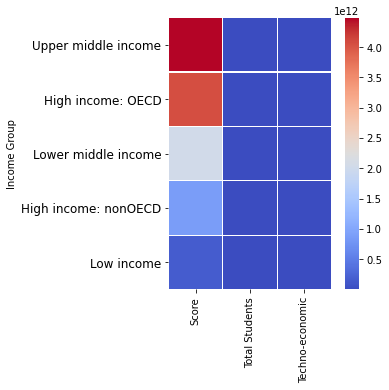

In [167]:


#Graph par groupe revenus
fig = plt.figure(1, figsize=(5, 5))
res = sns.heatmap(df_synthese_sansFR_Income, square=True, linewidths=0.1, cmap='coolwarm')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 10)
plt.show()



# <span style='background:#004c6d'><span style='color:white'>**Projections : Evaluation de l'évolution du score d'attractitivé**</span>



In [168]:
#----------------------------------------------------------------------------------------------------------------
# Les indicateurs sélectionnés pour l'étude à partir des observations sont-ils disponibles pour les projections?
#----------------------------------------------------------------------------------------------------------------
df_countries_projections.loc[df_countries_projections["Indicator Code"].isin(selec_metadata)]

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, Group of countries, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, Count Data, Short Name, Country Name_y, Long Name, 2-alpha code, Currency Unit, Special Notes, Region, Income Group, WB-2 code, National accounts base year, National accounts reference year, SNA price valuation, Lending category, Other groups, System of National Accounts, Alternative conversion factor, PPP survey year, Balance of Payments Manual in use, External debt Reporting status, System of trade, Government Accounting concept, IMF data dissemination standard, Latest population census, Latest household survey, Source of most recent Income and expenditure data, Vital registration complete, Latest agricultural census, Latest industrial data, Latest trade data, Latest water withdrawal data, Topic]
Index: []

[0 rows x 54 columns]

In [169]:
#----------------------------------------------------------------------------------------------------------------
# Les indicateurs secondaires sont-ils disponibles pour les projections?
#----------------------------------------------------------------------------------------------------------------
df_countries_projections.loc[df_countries_projections["Indicator Code"].isin(indic_verif)]

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, Group of countries, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, Count Data, Short Name, Country Name_y, Long Name, 2-alpha code, Currency Unit, Special Notes, Region, Income Group, WB-2 code, National accounts base year, National accounts reference year, SNA price valuation, Lending category, Other groups, System of National Accounts, Alternative conversion factor, PPP survey year, Balance of Payments Manual in use, External debt Reporting status, System of trade, Government Accounting concept, IMF data dissemination standard, Latest population census, Latest household survey, Source of most recent Income and expenditure data, Vital registration complete, Latest agricultural census, Latest industrial data, Latest trade data, Latest water withdrawal data, Topic]
Index: []

[0 rows x 54 columns]


##  <span style='background:#507c9b'><span style='color:white'>Sélection d'indicateurs pour l'analyse</span>



Dans cette étude préliminaire des projections, nous nous concentrerons sur la période 2020-2045.

In [170]:

#------------------------------------------------------------------------------------
# Créer une verision reduite de df_EdStatsSeries pour faire une recherche par mot clé
#------------------------------------------------------------------------------------
liste_ind_proj = list(df_countries_projections["Indicator Code"].unique())
df_EdStatsSeries_proj = df_EdStatsSeries.loc[df_EdStatsSeries["Indicator Code"].isin(liste_ind_proj)]
#df_EdStatsSeries_proj

In [171]:

#-----------------
# Accès: Internet
#-----------------
# mot clés testés; internet, Internet, on-line, computer, Computer, electricity, Electricity

cle_NET=[row for row in df_EdStatsSeries_proj['Long definition'] if ('Electricity') in row]
df_EdStatsSeries_proj[df_EdStatsSeries_proj['Long definition'].isin(cle_NET)][['Indicator Code','Indicator Name','Topic','Long definition']]

Empty DataFrame
Columns: [Indicator Code, Indicator Name, Topic, Long definition]
Index: []

In [172]:

#-----
# PIB
#-----
# mot clés testés; GDP, income, capita

cle_PIB=[row for row in df_EdStatsSeries_proj['Long definition'] if ('income') in row]
df_EdStatsSeries_proj[df_EdStatsSeries_proj['Long definition'].isin(cle_PIB)][['Indicator Code','Indicator Name','Long definition']]

Empty DataFrame
Columns: [Indicator Code, Indicator Name, Long definition]
Index: []

In [173]:

#----------
# Secondary
#----------

cle_SEC=[row for row in df_EdStatsSeries_proj['Indicator Name'] if ('Secondary') in row]
#df_EdStatsSeries_proj[df_EdStatsSeries_proj['Indicator Name'].isin(cle_SEC)][['Indicator Code','Indicator Name','Long definition']]


In [174]:

#----------
# Tertiary
#----------
cle_TER=[row for row in df_EdStatsSeries_proj['Long definition'] if ('tertiary') in row]
#df_EdStatsSeries_proj[df_EdStatsSeries_proj['Long definition'].isin(cle_TER)][['Indicator Code','Indicator Name','Long definition']]



Le tableau df_EdStatsSeries a été interrogé sur les indicateurs liés aux quatre axes considérés dans l'étude du potentiel actuel (accès à Internet, PIB PPA, nombre d'étudiants dans l'enseignement secondaire et nombre d'étudiants à l'université).<br>

Des informations n'ont été obtenues que pour deux d'entre elles, étudiants dans l'enseignement secondaire et nombre d'étudiants à l'université.<br>

L'indicateur retenu est: **Projection: Population in thousands by highest level of educational attainment. Post Secondary. PRJ.POP.ALL.4.MF**. Il renseigne sur "Total population in thousands that has completed post-secondary or tertiary education as the highest level of educational attainment."

In [175]:

#----------------------------------------------------------------------------------------------------------
#Visualisation données projection nombre étudiants ayant complété des études post-secondaire ou université
#----------------------------------------------------------------------------------------------------------

##
# Data
df_countries_projec = df_countries_projections.drop(columns = ['Country Code', 'Indicator Name', 'Group of countries', 'Count Data', 'Short Name', 'Country Name_y','Long Name', '2-alpha code', 'Currency Unit', 'Special Notes','WB-2 code', 'National accounts base year','National accounts reference year', 'SNA price valuation','Lending category', 'Other groups', 'System of National Accounts','Alternative conversion factor', 'PPP survey year','Balance of Payments Manual in use', 'External debt Reporting status','System of trade', 'Government Accounting concept','IMF data dissemination standard', 'Latest population census','Latest household survey','Source of most recent Income and expenditure data','Vital registration complete', 'Latest agricultural census','Latest industrial data', 'Latest trade data','Latest water withdrawal data'])

#On va explorer les 20 pays mieux classés
paysMieuxClasses20 = pd.Series(df_synthese_sansFR["Country Name"][:20])
df_countries_projec20classes = df_countries_projec.loc[(df_countries_projec["Country Name"].isin(paysMieuxClasses20.values))]


##
# Préparation données graphs

#South Asia
popTER_proj_SAsia = df_countries_projec20classes.loc[(df_countries_projec20classes["Indicator Code"] == "PRJ.POP.ALL.4.MF") & (df_countries_projec["Region"]=='South Asia')]
popTER_proj_SAsia=popTER_proj_SAsia.drop(columns=["Indicator Code", "Region", "Income Group", "Topic"]).T.reset_index()
popTER_proj_SAsia.columns = popTER_proj_SAsia.iloc[0]
popTER_proj_SAsia=popTER_proj_SAsia.drop(popTER_proj_SAsia.index[0]).set_index("Country Name")

#Europe & Central Asia
popTER_proj_Eur = df_countries_projec20classes.loc[(df_countries_projec20classes["Indicator Code"] == "PRJ.POP.ALL.4.MF") & (df_countries_projec["Region"]=='Europe & Central Asia')]
popTER_proj_Eur=popTER_proj_Eur.drop(columns=["Indicator Code", "Region", "Income Group", "Topic"]).T.reset_index()
popTER_proj_Eur.columns = popTER_proj_Eur.iloc[0]
popTER_proj_Eur=popTER_proj_Eur.drop(popTER_proj_Eur.index[0]).set_index("Country Name")

#'Middle East & North Africa'
popTER_proj_NEAfr = df_countries_projec20classes.loc[(df_countries_projec20classes["Indicator Code"] == "PRJ.POP.ALL.4.MF") & (df_countries_projec["Region"]=='Middle East & North Africa')]
popTER_proj_NEAfr=popTER_proj_NEAfr.drop(columns=["Indicator Code", "Region", "Income Group", "Topic"]).T.reset_index()
popTER_proj_NEAfr.columns = popTER_proj_NEAfr.iloc[0]
popTER_proj_NEAfr=popTER_proj_NEAfr.drop(popTER_proj_NEAfr.index[0]).set_index("Country Name")

#East Asia & Pacific
popTER_proj_Paci = df_countries_projec20classes.loc[(df_countries_projec20classes["Indicator Code"] == "PRJ.POP.ALL.4.MF") & (df_countries_projec["Region"]=='East Asia & Pacific')]
popTER_proj_Paci=popTER_proj_Paci.drop(columns=["Indicator Code", "Region", "Income Group", "Topic"]).T.reset_index()
popTER_proj_Paci.columns = popTER_proj_Paci.iloc[0]
popTER_proj_Paci=popTER_proj_Paci.drop(popTER_proj_Paci.index[0]).set_index("Country Name")

#Latin America & Caribbean
popTER_proj_SAme = df_countries_projec20classes.loc[(df_countries_projec20classes["Indicator Code"] == "PRJ.POP.ALL.4.MF") & (df_countries_projec["Region"]=='Latin America & Caribbean')]
popTER_proj_SAme=popTER_proj_SAme.drop(columns=["Indicator Code", "Region", "Income Group", "Topic"]).T.reset_index()
popTER_proj_SAme.columns = popTER_proj_SAme.iloc[0]
popTER_proj_SAme=popTER_proj_SAme.drop(popTER_proj_SAme.index[0]).set_index("Country Name")

#North America
popTER_proj_NAme = df_countries_projec20classes.loc[(df_countries_projec20classes["Indicator Code"] == "PRJ.POP.ALL.4.MF") & (df_countries_projec["Region"]=='North America')]
popTER_proj_NAme=popTER_proj_NAme.drop(columns=["Indicator Code", "Region", "Income Group", "Topic"]).T.reset_index()
popTER_proj_NAme.columns = popTER_proj_NAme.iloc[0]
popTER_proj_NAme=popTER_proj_NAme.drop(popTER_proj_NAme.index[0]).set_index("Country Name")


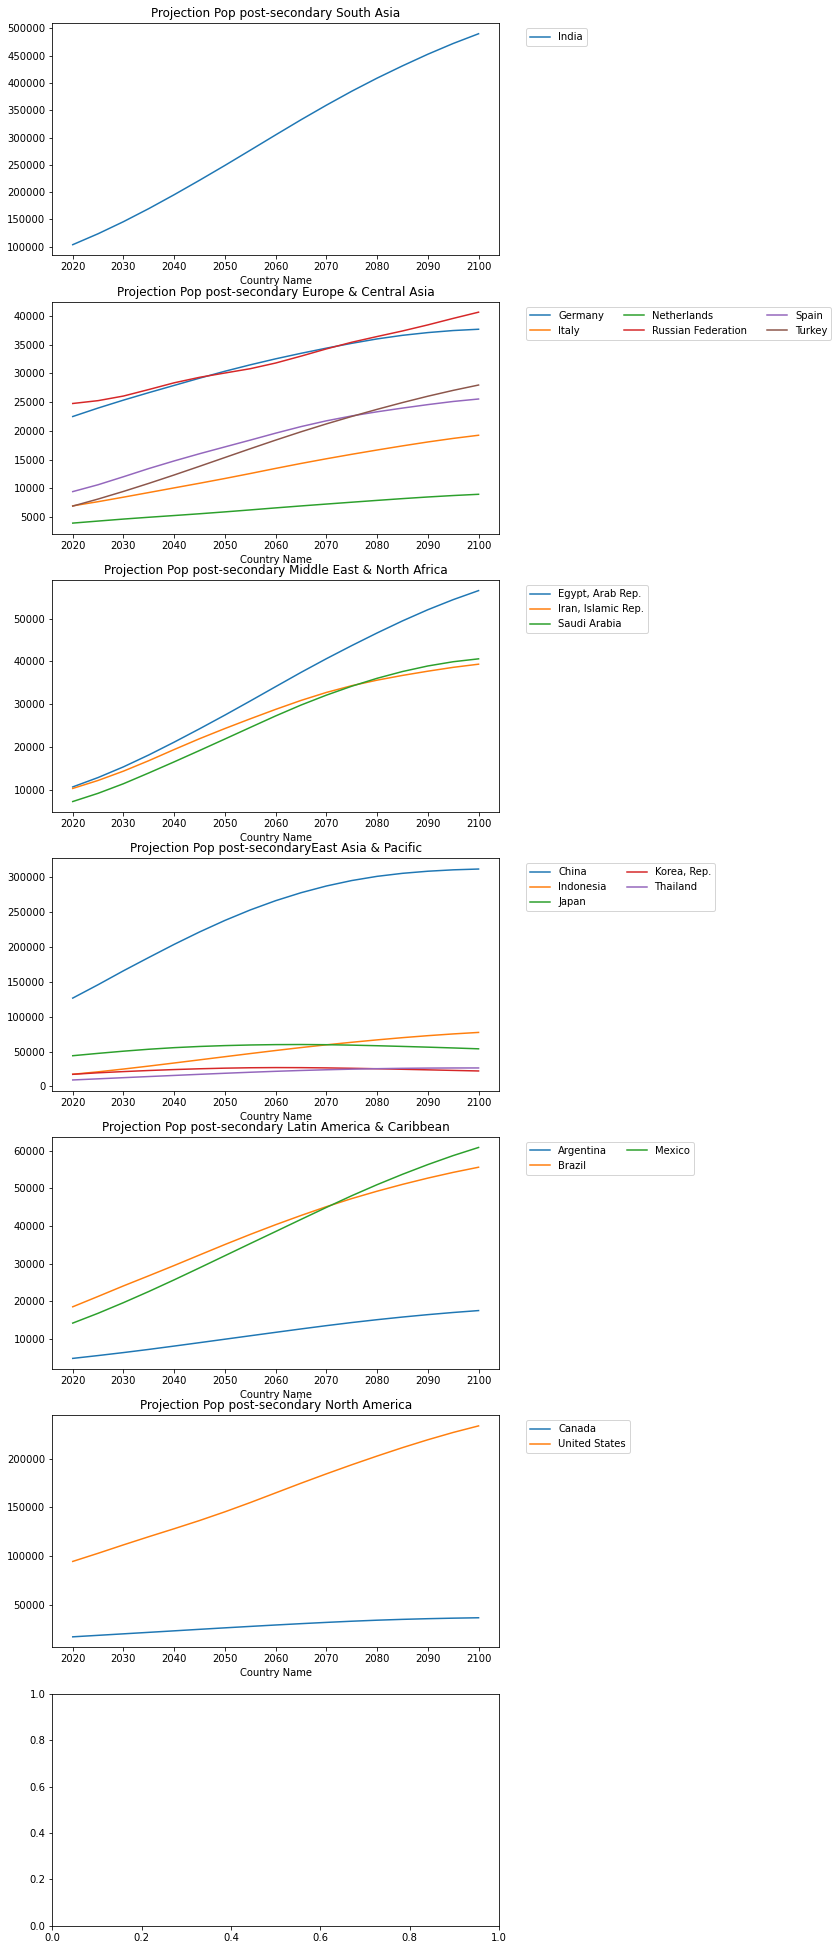

In [176]:

##
#Graph

fig, axes = plt.subplots(7, 1, figsize=(8,35))

popTER_proj_SAsia.plot(ax=axes[0], title="Projection Pop post-secondary South Asia", legend=False)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

popTER_proj_Eur.plot(ax=axes[1], title="Projection Pop post-secondary Europe & Central Asia", legend=False)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)

popTER_proj_NEAfr.plot(ax=axes[2], title="Projection Pop post-secondary Middle East & North Africa", legend=False)
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

popTER_proj_Paci.plot(ax=axes[3], title="Projection Pop post-secondaryEast Asia & Pacific", legend=False)
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

popTER_proj_SAme.plot(ax=axes[4], title="Projection Pop post-secondary Latin America & Caribbean", legend=False)
axes[4].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

popTER_proj_NAme.plot(ax=axes[5], title="Projection Pop post-secondary North America", legend=False)
axes[5].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)


plt.show()


##  <span style='background:#507c9b'><span style='color:white'>Estimation de l'évolution de l'attractitivé</span>



<br>
    
* On se concentrera sur les **20 pays les mieux classés**
* On va **reproduire le ranking** calculé pour le **classement** des pays en fonction de leur attractivité
* Pour l'indicateur disponible dans l'intervalle 2020-2100: *Evaluation tendence données projection nombre étudiants ayant complété des études post-secondaire ou université*  on se concentrera sur l'intervalle *2020-2040*
* Pour l'indicateur *accès internet et PIB*, données disponibles seulement entre *1970 et 2017*, on va étudier le tendence dans les derniers années, 2010-2016

<br>
    


In [177]:

#-------------------------------------------------------------------------------------
# df obsevations, seulement colonnes pays, Région, Income group, indicators, 1970-2017
#-------------------------------------------------------------------------------------
df_test_proj = df_countries_obs.copy()

cols_drop = ['Most Recent data', 'Date of most recent data', 'Count Data']
df_test_proj = df_test_proj.drop(columns = cols_drop)

# Ajout de la colonne "Income Group" du fichier EdStatsSeries dans le dataframe df_complet
df_test_proj = pd.merge(df_test_proj,df_EdStatsCountry[["Income Group","Country Code"]], on ="Country Code", how='left')


In [178]:

#On va explorer les 20 pays mieux classés
paysMieuxClasses20 = pd.Series(df_synthese_sansFR["Country Name"][:20])

df_test_proj20classes = df_test_proj.loc[(df_test_proj["Country Name"].isin(paysMieuxClasses20.values))]



In [179]:


# Tendences données accéss internet des 20 pays mieux classés ; par region

#South Asia
net_SAsia_graph = df_test_proj20classes.loc[(df_test_proj20classes["Indicator Code"] == "IT.NET.USER.P2") & (df_test_proj20classes["Region"]=='South Asia')]
net_SAsia_graph=net_SAsia_graph.drop(columns=["Country Code","Indicator Name","Indicator Code","Region","Income Group"]).T.reset_index()
net_SAsia_graph.columns = net_SAsia_graph.iloc[0]
net_SAsia_graph=net_SAsia_graph.drop(net_SAsia_graph.index[0]).set_index("Country Name")

#Europe & Central Asia
net_Eur_graph = df_test_proj20classes.loc[(df_test_proj20classes["Indicator Code"] == "IT.NET.USER.P2") & (df_test_proj20classes["Region"]=='Europe & Central Asia')]
net_Eur_graph=net_Eur_graph.drop(columns=["Country Code","Indicator Name","Indicator Code","Region","Income Group"]).T.reset_index()
net_Eur_graph.columns = net_Eur_graph.iloc[0]
net_Eur_graph=net_Eur_graph.drop(net_Eur_graph.index[0]).set_index("Country Name")

#'Middle East & North Africa'
net_NEAfr_graph = df_test_proj20classes.loc[(df_test_proj20classes["Indicator Code"] == "IT.NET.USER.P2") & (df_test_proj20classes["Region"]=='Middle East & North Africa')]
net_NEAfr_graph=net_NEAfr_graph.drop(columns=["Country Code","Indicator Name","Indicator Code","Region","Income Group"]).T.reset_index()
net_NEAfr_graph.columns = net_NEAfr_graph.iloc[0]
net_NEAfr_graph=net_NEAfr_graph.drop(net_NEAfr_graph.index[0]).set_index("Country Name")

#East Asia & Pacific
net_Paci_graph = df_test_proj20classes.loc[(df_test_proj20classes["Indicator Code"] == "IT.NET.USER.P2") & (df_test_proj20classes["Region"]=='East Asia & Pacific')]
net_Paci_graph=net_Paci_graph.drop(columns=["Country Code","Indicator Name","Indicator Code","Region","Income Group"]).T.reset_index()
net_Paci_graph.columns = net_Paci_graph.iloc[0]
net_Paci_graph=net_Paci_graph.drop(net_Paci_graph.index[0]).set_index("Country Name")

#Latin America & Caribbean
net_SAme_graph = df_test_proj20classes.loc[(df_test_proj20classes["Indicator Code"] == "IT.NET.USER.P2") & (df_test_proj20classes["Region"]=='Latin America & Caribbean')]
net_SAme_graph=net_SAme_graph.drop(columns=["Country Code","Indicator Name","Indicator Code","Region","Income Group"]).T.reset_index()
net_SAme_graph.columns = net_SAme_graph.iloc[0]
net_SAme_graph=net_SAme_graph.drop(net_SAme_graph.index[0]).set_index("Country Name")

#North America
net_NAme_graph = df_test_proj20classes.loc[(df_test_proj20classes["Indicator Code"] == "IT.NET.USER.P2") & (df_test_proj20classes["Region"]=='North America')]
net_NAme_graph=net_NAme_graph.drop(columns=["Country Code","Indicator Name","Indicator Code","Region","Income Group"]).T.reset_index()
net_NAme_graph.columns = net_NAme_graph.iloc[0]
net_NAme_graph=net_NAme_graph.drop(net_NAme_graph.index[0]).set_index("Country Name")


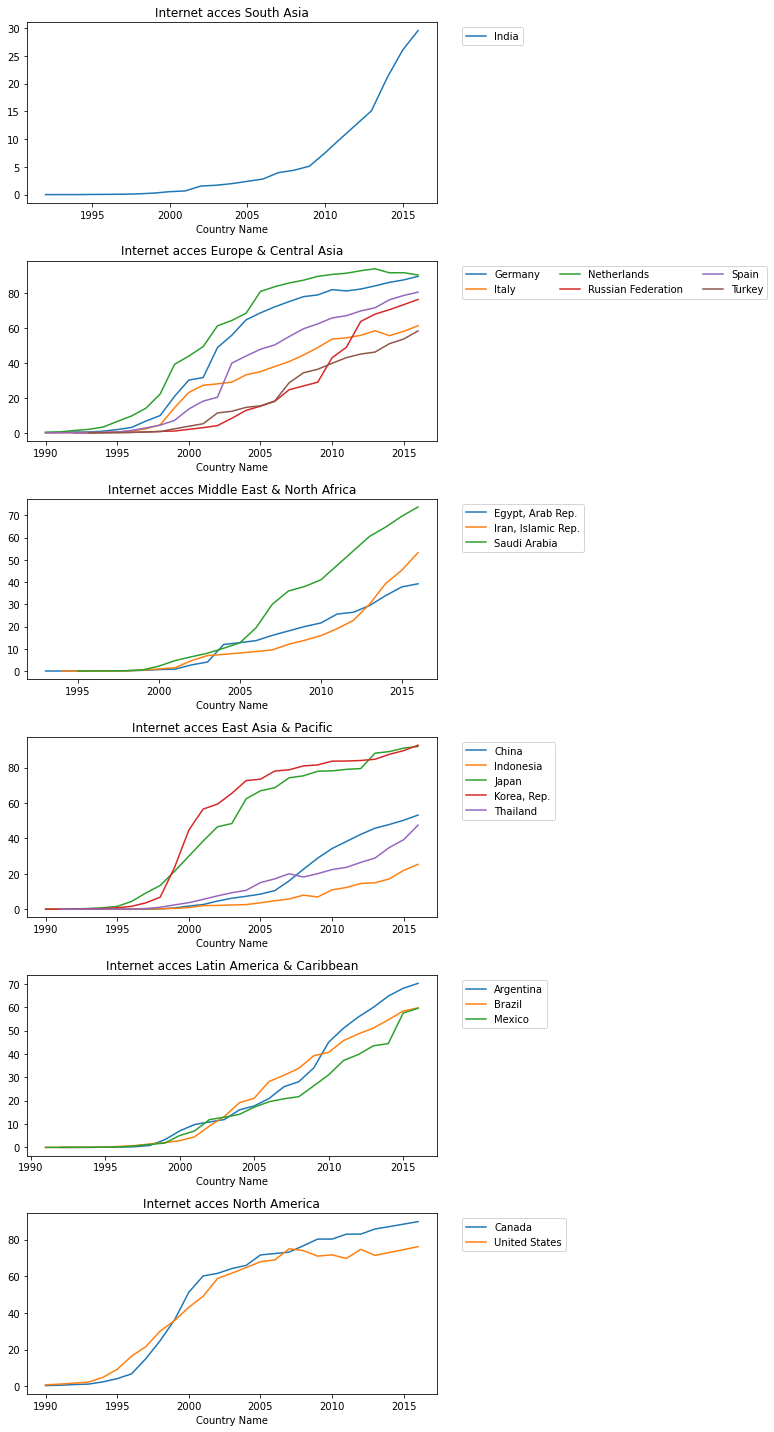

In [180]:

fig, axes = plt.subplots(6, 1, figsize=(11,20))

net_SAsia_graph.plot(ax=axes[0], title="Internet acces South Asia", legend=False)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

net_Eur_graph.plot(ax=axes[1], title="Internet acces Europe & Central Asia", legend=False)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)

net_NEAfr_graph.plot(ax=axes[2], title="Internet acces Middle East & North Africa", legend=False)
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

net_Paci_graph.plot(ax=axes[3], title="Internet acces East Asia & Pacific", legend=False)
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

net_SAme_graph.plot(ax=axes[4], title="Internet acces Latin America & Caribbean", legend=False)
axes[4].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

net_NAme_graph.plot(ax=axes[5], title="Internet acces North America", legend=False)
axes[5].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

plt.tight_layout()
plt.show()

In [181]:

#---
# Données disponibles PIB PPA par region

#South Asia
PIB_SAsia_graph = df_test_proj20classes.loc[(df_test_proj20classes["Indicator Code"] == "NY.GNP.PCAP.PP.CD") & (df_test_proj20classes["Region"]=='South Asia')]
PIB_SAsia_graph=PIB_SAsia_graph.drop(columns=["Country Code","Indicator Name","Indicator Code","Region","Income Group"]).T.reset_index()
PIB_SAsia_graph.columns = PIB_SAsia_graph.iloc[0]
PIB_SAsia_graph=PIB_SAsia_graph.drop(PIB_SAsia_graph.index[0]).set_index("Country Name")

#Europe & Central Asia
PIB_Eur_graph = df_test_proj20classes.loc[(df_test_proj20classes["Indicator Code"] == "NY.GNP.PCAP.PP.CD") & (df_test_proj20classes["Region"]=='Europe & Central Asia')]
PIB_Eur_graph=PIB_Eur_graph.drop(columns=["Country Code","Indicator Name","Indicator Code","Region","Income Group"]).T.reset_index()
PIB_Eur_graph.columns = PIB_Eur_graph.iloc[0]
PIB_Eur_graph=PIB_Eur_graph.drop(PIB_Eur_graph.index[0]).set_index("Country Name")

#'Middle East & North Africa'
PIB_NEAfr_graph = df_test_proj20classes.loc[(df_test_proj20classes["Indicator Code"] == "NY.GNP.PCAP.PP.CD") & (df_test_proj20classes["Region"]=='Middle East & North Africa')]
PIB_NEAfr_graph=PIB_NEAfr_graph.drop(columns=["Country Code","Indicator Name","Indicator Code","Region","Income Group"]).T.reset_index()
PIB_NEAfr_graph.columns = PIB_NEAfr_graph.iloc[0]
PIB_NEAfr_graph=PIB_NEAfr_graph.drop(PIB_NEAfr_graph.index[0]).set_index("Country Name")

#East Asia & Pacific
PIB_Paci_graph = df_test_proj20classes.loc[(df_test_proj20classes["Indicator Code"] == "NY.GNP.PCAP.PP.CD") & (df_test_proj20classes["Region"]=='East Asia & Pacific')]
PIB_Paci_graph=PIB_Paci_graph.drop(columns=["Country Code","Indicator Name","Indicator Code","Region","Income Group"]).T.reset_index()
PIB_Paci_graph.columns = PIB_Paci_graph.iloc[0]
PIB_Paci_graph=PIB_Paci_graph.drop(PIB_Paci_graph.index[0]).set_index("Country Name")

#Sub-Saharan Africa
PIB_SAfr_graph = df_test_proj20classes.loc[(df_test_proj20classes["Indicator Code"] == "NY.GNP.PCAP.PP.CD") & (df_test_proj20classes["Region"]=='Sub-Saharan Africa')]
PIB_SAfr_graph=PIB_SAfr_graph.drop(columns=["Country Code","Indicator Name","Indicator Code","Region","Income Group"]).T.reset_index()
PIB_SAfr_graph.columns = PIB_SAfr_graph.iloc[0]
PIB_SAfr_graph=PIB_SAfr_graph.drop(PIB_SAfr_graph.index[0]).set_index("Country Name")

#Latin America & Caribbean
PIB_SAme_graph = df_test_proj20classes.loc[(df_test_proj20classes["Indicator Code"] == "NY.GNP.PCAP.PP.CD") & (df_test_proj20classes["Region"]=='Latin America & Caribbean')]
PIB_SAme_graph=PIB_SAme_graph.drop(columns=["Country Code","Indicator Name","Indicator Code","Region","Income Group"]).T.reset_index()
PIB_SAme_graph.columns = PIB_SAme_graph.iloc[0]
PIB_SAme_graph=PIB_SAme_graph.drop(PIB_SAme_graph.index[0]).set_index("Country Name")

#North America
PIB_NAme_graph = df_test_proj20classes.loc[(df_test_proj20classes["Indicator Code"] == "NY.GNP.PCAP.PP.CD") & (df_test_proj20classes["Region"]=='North America')]
PIB_NAme_graph=PIB_NAme_graph.drop(columns=["Country Code","Indicator Name","Indicator Code","Region","Income Group"]).T.reset_index()
PIB_NAme_graph.columns = PIB_NAme_graph.iloc[0]
PIB_NAme_graph=PIB_NAme_graph.drop(PIB_NAme_graph.index[0]).set_index("Country Name")


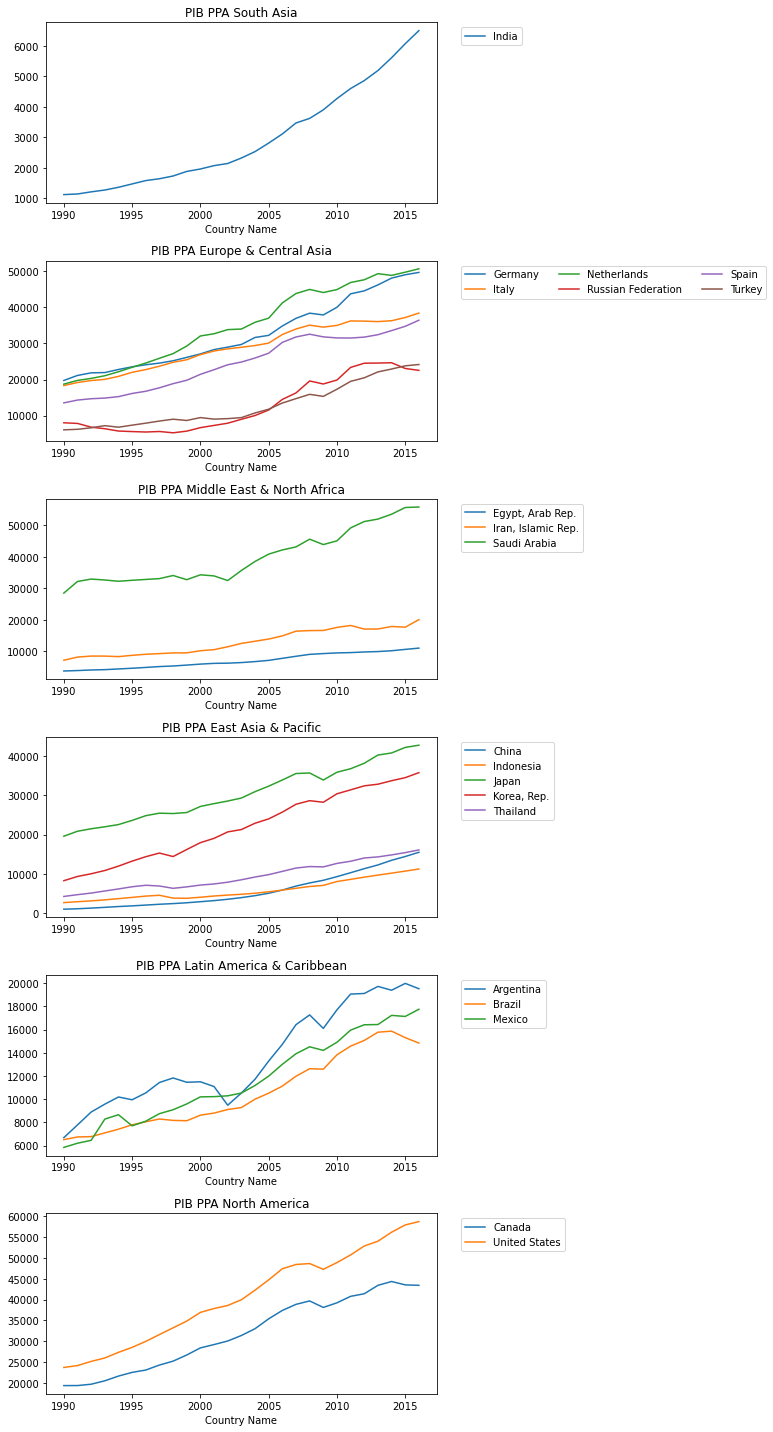

In [182]:

fig, axes = plt.subplots(6, 1, figsize=(11, 20))

PIB_SAsia_graph.plot(ax=axes[0], title="PIB PPA South Asia", legend=False)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

PIB_Eur_graph.plot(ax=axes[1], title="PIB PPA Europe & Central Asia", legend=False)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)

PIB_NEAfr_graph.plot(ax=axes[2], title="PIB PPA Middle East & North Africa", legend=False)
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

PIB_Paci_graph.plot(ax=axes[3], title="PIB PPA East Asia & Pacific", legend=False)
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

PIB_SAme_graph.plot(ax=axes[4], title="PIB PPA Latin America & Caribbean", legend=False)
axes[4].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

PIB_NAme_graph.plot(ax=axes[5], title="PIB PPA North America", legend=False)
axes[5].legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

plt.tight_layout()
plt.show()

In [183]:

#---------------------------------------------------------------------------------------------------------------
#Évaluation tendance donnée projection nombre étudiants ayant complété des études postsecondaires ou université
#----------------------------------------------------------------------------------------------------------------
#On se concentrera dans l'intervalle 2020-2040

df_proj20classes = df_countries_projec.loc[(df_countries_projec["Country Name"].isin(paysMieuxClasses20.values))]

df_projEd = df_proj20classes.copy()
df_projEd = df_projEd.loc[(df_projEd["Indicator Code"] == "PRJ.POP.ALL.4.MF")]

df_projEd["Data 2020-2040"] = df_projEd.loc[:,"2020":"2040"].count(axis=1)

df_projEdUTILE = df_projEd.loc[df_projEd["Data 2020-2040"]>=5]
df_projEdUTILE = df_projEdUTILE.drop(columns = ['Region', 'Income Group', 'Topic','Data 2020-2040'])
df_projEdUTILECOL = pd.melt(frame=df_projEdUTILE, id_vars=["Country Name", "Indicator Code"], var_name = "Year", value_name="Value")
df_projEdUTILECOL = df_projEdUTILECOL.pivot_table(index=["Year"], columns=["Country Name"], values="Value").reset_index()
df_projEdUTILECOL = df_projEdUTILECOL.set_index("Year")

netEvol =[]
country = []
for pays in paysMieuxClasses20:
    table = df_projEdUTILECOL[pays].to_frame()
    coefficients, residuals, _, _, _ = np.polyfit(range(len(table.index)),table,1,full=True) #degint=1 Degree of the fitting polynomial 
    pente = coefficients[0].item()
    netEvol.append(pente)
    country.append(pays)
EvolED = pd.DataFrame(country, columns = ["Country Name"])
EvolED["Evol. post-sec POP"] =pd.Series(netEvol)



In [184]:

#--------------------------------------------
#Évaluation tendance évolution accés internet
#--------------------------------------------
df_netAccess = df_test_proj20classes.copy()
df_netAccess = df_netAccess.loc[(df_test_proj20classes["Indicator Code"] == "IT.NET.USER.P2")]

df_netAccess["Data 2010-2016"] = df_netAccess.loc[:,"2010":"2016"].count(axis=1)
df_netAccessUTILE = df_netAccess.loc[df_netAccess["Data 2010-2016"]>=5]

df_netAccessUTILE = df_netAccessUTILE.drop(columns = ["Country Code", "Indicator Name",'1970', '1971', '1972', '1973','1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982','1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2017','Region', 'Income Group', 'Data 2010-2016'])
df_netAccessUTILECOL = pd.melt(frame=df_netAccessUTILE, id_vars=["Country Name", "Indicator Code"], var_name = "Year", value_name="Value")
df_netAccessUTILECOL = df_netAccessUTILECOL.pivot_table(index=["Year"], columns=["Country Name"], values="Value").reset_index()
df_netAccessUTILECOL=df_netAccessUTILECOL.set_index("Year")

netEvol =[]
country = []
for pays in paysMieuxClasses20:
    table = df_netAccessUTILECOL[pays].to_frame()
    coefficients, residuals, _, _, _ = np.polyfit(range(len(table.index)),table,1,full=True) #degint=1 Degree of the fitting polynomial 
    pente = coefficients[0].item()
    netEvol.append(pente)
    country.append(pays)
EvolNet = pd.DataFrame(country, columns = ["Country Name"])
EvolNet["Evol. internet"] =pd.Series(netEvol)



In [185]:

#------------------------------------------------
#Évaluation tendence évolution PIB per capita PPA
#------------------------------------------------

df_piB = df_test_proj20classes.copy()
df_piB = df_piB.loc[(df_test_proj20classes["Indicator Code"] == "NY.GNP.PCAP.PP.CD")]

df_piB["Data 2010-2016"] = df_piB.loc[:,"2010":"2016"].count(axis=1)
df_piBUTILE = df_piB.loc[df_piB["Data 2010-2016"]>=5]

df_piBUTILE = df_piBUTILE.drop(columns = ["Country Code", "Indicator Name",'1970', '1971', '1972', '1973','1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982','1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2017','Region', 'Income Group', 'Data 2010-2016'])
df_piBUTILECOL = pd.melt(frame=df_piBUTILE, id_vars=["Country Name", "Indicator Code"], var_name = "Year", value_name="Value")
df_piBUTILECOL = df_piBUTILECOL.pivot_table(index=["Year"], columns=["Country Name"], values="Value").reset_index()
df_piBUTILECOL=df_piBUTILECOL.set_index("Year")

netEvol =[]
country = []
for pays in paysMieuxClasses20:
    table = df_piBUTILECOL[pays].to_frame()
    coefficients, residuals, _, _, _ = np.polyfit(range(len(table.index)),table,1,full=True) #degint=1 Degree of the fitting polynomial 
    pente = coefficients[0].item()
    netEvol.append(pente)
    country.append(pays)
EvolPIB = pd.DataFrame(country, columns = ["Country Name"])
EvolPIB["Evol. PIB"] =pd.Series(netEvol)



In [186]:

#-------------------------------------------------------
# Création d'un tableau avec l'ensemble des informations
#-------------------------------------------------------
df_Evolution = EvolED.merge(EvolNet,how='left', on='Country Name') 
df_Evolution = df_Evolution.merge(EvolPIB,how='left', on='Country Name') 
df_Evolution

#Reproduction du scoring utilissé pour le classement de l'attractivité des pays

#Variable composite que considère les conditions économiques et technologiques du pays
#Distance euclidienne
df_Evolution["Techno-economic Evol"] = np.sqrt(df_Evolution["Evol. internet"]**2 + df_Evolution["Evol. PIB"]**2)

#Classement des pays
df_Evolution["Score Proj"] = df_Evolution["Techno-economic Evol"]*df_Evolution["Evol. post-sec POP"]
df_Evolution = df_Evolution.sort_values(by=["Score Proj"], ascending=False).reset_index(drop=True)


#Tableau avec toutes les infos sur l'évolution de l'attractivité
df_EvolutionPotentiel = pd.merge(df_Evolution,df_synthese_sansFR[["Score","Country Name"]], on ="Country Name", how='left')
df_EvolutionPotentiel["Future Score"] = df_EvolutionPotentiel["Score Proj"] * df_EvolutionPotentiel["Score"]
df_EvolutionPotentiel = df_EvolutionPotentiel.sort_values(by='Future Score',ascending=False).reset_index(drop=True)


In [187]:

#------------------------------------------
#Tableau synthèse évolution attractivité
#------------------------------------------

PositionpaysMieuxClasses20 = pd.Series(paysMieuxClasses20).reset_index()
PositionpaysMieuxClasses20 = PositionpaysMieuxClasses20.rename(columns={"index": "Classement actuel"})
PositionpaysMieuxClasses20["Classement actuel"] = PositionpaysMieuxClasses20["Classement actuel"]+1

df_EvolutionPosition =df_EvolutionPotentiel["Country Name"].to_frame()
df_EvolutionPosition = pd.Series(df_EvolutionPosition["Country Name"]).reset_index()
df_EvolutionPosition = df_EvolutionPosition.rename(columns={"index": "Evolution classement"})
df_EvolutionPosition["Evolution classement"] = df_EvolutionPosition["Evolution classement"]+1

df_changesClassement = pd.merge(PositionpaysMieuxClasses20,df_EvolutionPosition, on ="Country Name", how='left') 
df_changesClassement = df_changesClassement[["Country Name","Classement actuel", "Evolution classement"]]
df_changesClassement



Country Name  Classement actuel  Evolution classement
0                China                  1                     1
1        United States                  2                     2
2                India                  3                     3
3              Germany                  4                     5
4               Brazil                  5                    10
5                Japan                  6                     9
6               Turkey                  7                     7
7   Russian Federation                  8                    14
8            Indonesia                  9                     6
9               Mexico                 10                     8
10        Saudi Arabia                 11                     4
11               Italy                 12                    17
12         Korea, Rep.                 13                    18
13  Iran, Islamic Rep.                 14                    13
14               Spain                 15                    11
15              Canada                 16                    12
16            Thailand                 17                    16
17           Argentina                 18                    20
18         Netherlands                 19                    19
19    Egypt, Arab Rep.                 20                    15

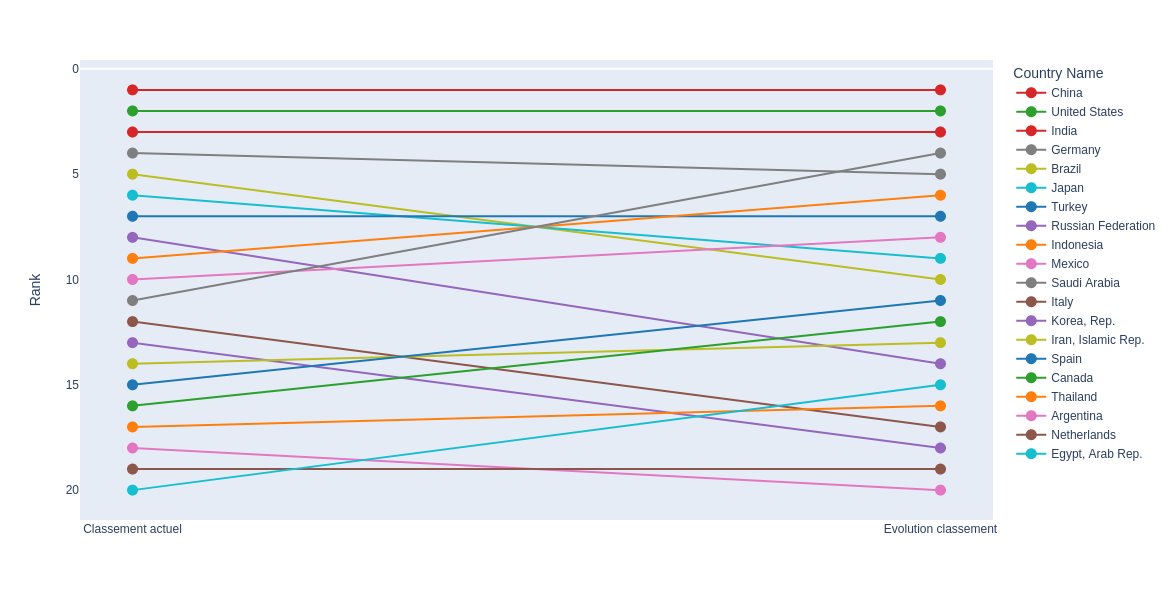

In [188]:

#----------------------------------------------
#Visualisation de l'évolution de l'attractivité
#----------------------------------------------


##
#Data
##
df_changesClassement_graph = pd.melt(frame = df_changesClassement, id_vars=["Country Name"], value_vars = (["Classement actuel", "Evolution classement"]), var_name="Classement", value_name="Position")  
df_changesClassement_graph.head()

##
#Graph
##

#extract color palette, the palette can be changed
list_pays = list(set(df_changesClassement_graph['Country Name']))
pal = list(sns.color_palette(n_colors=len(list_pays)).as_hex())
dict_color = dict(zip(list_pays, pal))

fig = px.line(df_changesClassement_graph, x = 'Classement', y = 'Position',color = 'Country Name', color_discrete_map= dict_color, markers=True, width=400, height=600)
fig.update_traces(marker=dict(size=11))
fig.update_yaxes(autorange='reversed', title='Rank',visible=True, showticklabels=True)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.update_layout(xaxis=dict(showgrid=False),yaxis=dict(showgrid=False) )

fig.show()



###  <span style='background:#507c9b'><span style='color:white'>Evolution attractivité par région et groupe de revenus
    

In [189]:

#Création dataframe
region_income = pd.DataFrame({'Country Name' : df_EdStatsCountry['Country Name'], 'Region' : df_EdStatsCountry['Region'], 'Income Group' : df_EdStatsCountry['Income Group']})
region_incomeClasses20 = region_income.loc[region_income["Country Name"].isin(paysMieuxClasses20)]
df_EvolutionPotentiel_Region_Income = pd.merge(region_incomeClasses20, df_EvolutionPotentiel[["Country Name", "Future Score"]], on='Country Name', how='outer')



In [190]:

#Données par région
df_EvolutionPotentiel_Region = df_EvolutionPotentiel_Region_Income.groupby("Region")[["Future Score"]].sum().sort_values(by='Future Score',ascending=False).reset_index()
df_EvolutionPotentiel_Region = df_EvolutionPotentiel_Region.set_index('Region')
df_EvolutionPotentiel_Region


Future Score
Region                                  
East Asia & Pacific         2.567608e+19
North America               1.740585e+19
South Asia                  9.837673e+18
Europe & Central Asia       1.767834e+18
Middle East & North Africa  1.254291e+18
Latin America & Caribbean   6.189216e+17

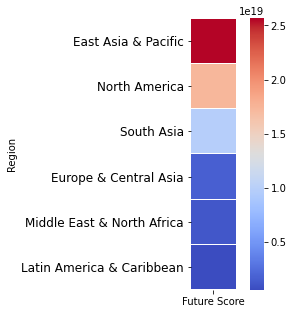

In [191]:

#20 pays mieux classés à partir des observations
#Graph Région
fig = plt.figure(1, figsize=(5, 5))
res = sns.heatmap(df_EvolutionPotentiel_Region, square=True, linewidths=0.1, cmap='coolwarm')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 10)
plt.show()


In [192]:

#Données par groupe revenus
df_EvolutionPotentiel_Income = df_EvolutionPotentiel_Region_Income.groupby("Income Group")[["Future Score"]].sum().sort_values(by='Future Score',ascending=False).reset_index()
df_EvolutionPotentiel_Income = df_EvolutionPotentiel_Income.set_index('Income Group')
df_EvolutionPotentiel_Income


Future Score
Income Group                      
Upper middle income   2.601929e+19
High income: OECD     1.877971e+19
Lower middle income   1.060358e+19
High income: nonOECD  1.158059e+18

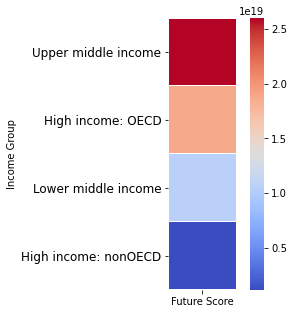

In [193]:

#20 pays mieux classés à partir des observations
#Graph par groupe revenus
fig = plt.figure(1, figsize=(5, 5))
res = sns.heatmap(df_EvolutionPotentiel_Income, square=True, linewidths=0.1, cmap='coolwarm')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 10)
plt.show()
